# Previsão da Progressão dos Casos Confirmados de COVID19 por Estado no Brasil

### 

## Uma breve apresentação do projeto realizado:
### E aí suave!? Meu nome é Pedro Garcia e além de ser discente do 6º período de Estatística na UFU também sou estudante de Data Science há quase três meses. Durante esse período busquei conhecimento em diversas plataformas gratuitas e livros sobre o assunto, tanto na parte técnica quanto na mercadológica.
### Entretanto, um grande desafio pra mim foi aplicar tudo que vi tanto no curso de Estatística quanto nos estudos em Data Science, Machine Learning (ML) e afins em um projeto prático. Confesso que a construção do projeto não foi fácil, pois inicialmente eu não tinha muita noção de como manipular dados, criar visualizações básicas e aplicar metodologias de Machine Learning utilizando Python.
### Contudo, a motivação de entregar algum valor com o que aprendi até o momento, principalmente em uma situação onde o mundo todo está sofrendo com o COVID19, foi de fato muito maior do que qualquer barreira de conhecimento. Assim sendo, durante todo o processo realizado, desde o tratamento e transformação dos dados até a criação das últimas visualizações das previsões, foi uma trilha de muito aprendizado. Quero destacar que no tratamento de dados comprovei a afirmação de que o Cientista de Dados fica 99,9% do tempo nesse rolê e no período que sobra ele fica tentando melhorar a performance do modelo em 0,01% hahaha! DRAMATIZAÇÃO ON! 
### Porém, apesar desses 'perrengues', aprendi bastante com todo esse processo que se repete bastante (atualiza dados, corrige erros, visualiza, corrige erros, retira insights, corrige erros, cria variáveis, corrige erros, modela, corrige erros, analisa, corrige erros...), até atingir um bom resultado inicial e a partir daí progredir sob demanda. Mencionei bastante a parte de 'corrige erros' pois o que eu errei durante essas etapas não tá escrito, tá cofificado hahaha! É claro que essa situação fortalece ainda mais a curva de aprendizagem, uma vez que assimilamos mais com os erros do que com os acertos. Logo, com todo o trabalho realizado estou bem mais capacidado a enfrentar novos desafios e a evoluir ainda mais com a experiência adquirida.
### Sobre o desenvolvimento do estudo, sinta-se a vontade para criticar as metodologias adotadas, as visualizações utilizadas, os erros que passaram despercebidos, as decisões tomadas e entre outros detalhes. No entanto, não apenas critique mas também sugira melhorias que possam ser feitas, com finalidade de agregar ainda mais no projeto e no meu conhecimento. Desde já agradeço pela atenção e deixarei meus contatos a seguir caso tenha alguma dúvida, crítica ou sugestão. Para aqueles que desejam explorar uma parte específica do estudo, o projeto está dividido em:
### Processamento dos Dados
### Visualização dos Dados
### Feature Engineering / Criação de Variáveis
### Modelagem e Análise da Performance
### Forecast / Previsões
### Extra - Previsões para os Municípios
### Considerações Finais
### Cada tópico possui descrições e interpretações dos procedimentos realizados.
### 
### Whatsapp : (34) 99248-9512 
### e-mail : pedroaugustogarciasantos@hotmail.com
### LinkedIn : https://www.linkedin.com/in/pedro-garcia-823224151/

# 

### Os dados do COVID19 utilizados no projeto vão até o dia 15/04, fique atento pois estarei publicando uma nova versão com os dados mais atualizados.

## 

# Importando Módulos

In [2]:
#Data Wrangling
from datetime import datetime as dt
import os
import pandas as pd
import numpy as np

#View
import matplotlib.pyplot as plt
import seaborn as sns

#Data Transform
from geopy.geocoders import Nominatim
from category_encoders import OneHotEncoder
import geopy.distance

#Web Scraping
from tabulate import tabulate
import urllib.request
from bs4 import BeautifulSoup
import requests

#Machine Learning - Algorithms
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#Machine Learning - Tunning
from skopt import dummy_minimize
from skopt import gp_minimize
from skopt.plots import plot_convergence

#Machine Learning - Save
from sklearn.externals import joblib

#Ocult Warnings
import warnings
warnings.filterwarnings("ignore")

# Data Processing

In [3]:
#Carregando Dados
df = pd.read_csv("C:/Users/KÁTIA/Desktop/EVOLUTION 2020/COVID/UPDATE/brazil_covid19.csv",sep=',')
df

date        region               state  cases  deaths
0     2020-01-30  Centro-Oeste    Distrito Federal      0       0
1     2020-01-30  Centro-Oeste               Goiás      0       0
2     2020-01-30  Centro-Oeste         Mato Grosso      0       0
3     2020-01-30  Centro-Oeste  Mato Grosso do Sul      0       0
4     2020-01-30      Nordeste             Alagoas      0       0
...          ...           ...                 ...    ...     ...
2074  2020-04-15       Sudeste      Rio de Janeiro   3743     265
2075  2020-04-15       Sudeste           São Paulo  11043     778
2076  2020-04-15           Sul              Paraná    803      38
2077  2020-04-15           Sul   Rio Grande do Sul    747      19
2078  2020-04-15           Sul      Santa Catarina    853      28

[2079 rows x 5 columns]

In [4]:
#Removendo coluna 'region'
df=df.drop(columns='region')

#Convertendo 'date' de string para datetime
df.date=pd.to_datetime(df.date)

#Ordenando dartagrame por estado e data
df=df.sort_values(by=['state','date'])

df

date      state  cases  deaths
13   2020-01-30       Acre      0       0
40   2020-01-31       Acre      0       0
67   2020-02-01       Acre      0       0
94   2020-02-02       Acre      0       0
121  2020-02-03       Acre      0       0
...         ...        ...    ...     ...
1963 2020-04-11  Tocantins     23       0
1990 2020-04-12  Tocantins     25       0
2017 2020-04-13  Tocantins     26       0
2044 2020-04-14  Tocantins     26       0
2071 2020-04-15  Tocantins     26       1

[2079 rows x 4 columns]

## Adicionando Geolocalização por Estado
### Para inferir se a proximidade de estados com grandes volumes de casos tem impacto na disseminação do vírus em outros estados

In [5]:
#Criando subset com apenas os estados
df_state = df.groupby("state").last().drop(columns=['date'])
df_state.head()

cases  deaths
state                  
Acre        101       3
Alagoas      82       5
Amapá       334       7
Amazonas   1554     106
Bahia       807      27

In [6]:
#Criando funções que adicionam a geocalização por estado
geolocator = Nominatim(user_agent="Corona")
def getLat(row):
  location = geolocator.geocode(f"{row.name}, Brazil")
  return location.latitude

def getLong(row):
  location = geolocator.geocode(f"{row.name}, Brazil")
  return location.longitude

#Adicionando variáveis de latitude e longitude
df_state['Latitude'] = df_state.apply(getLat, axis='columns')
df_state['Longitude'] = df_state.apply(getLong, axis='columns')
df_state.head()

cases  deaths   Latitude  Longitude
state                                        
Acre        101       3  -9.047868 -70.526498
Alagoas      82       5  -9.661166 -36.650243
Amapá       334       7   1.354544 -51.916198
Amazonas   1554     106  -4.479925 -63.518540
Bahia       807      27 -12.285251 -41.929478

In [7]:
#Juntando os dados
df = df.merge(df_state[['Latitude','Longitude']], how="left", on="state")
df.head(1)

date state  cases  deaths  Latitude  Longitude
0 2020-01-30  Acre      0       0 -9.047868 -70.526498

## Incrementando a densidade demográfica (hab/km²) e a área (km) de cada estado com com Web Scraping
### Com finalidade de captar algum relacionamento com o volume de casos

In [8]:
#Retirando os dados da web
res=requests.get('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_densidade_demogr%C3%A1fica')
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0]

#Criando dataframe
densidade = pd.read_html(str(table))
densidade = pd.DataFrame(densidade)
densidade = densidade[0][0]
densidade.tail(5)

Posição Unidade federativa    Área (km²) População(censo 2010)  \
22       23          Tocantins    277.720404             1.383.445   
23       24               Acre    164.123738               733.559   
24       25        Mato Grosso    903.206997             3.035.122   
25       27            Roraima    224.273831               450.479   
26       26           Amazonas  1.559.168117             3.483.985   

    Densidadedemográfica (censo 2010) População (projeção 2019)  \
22                                498                 1.572.866   
23                                447                   881.935   
24                                336                 3.484.466   
25                                201                   605.761   
26                                223                 4.144.597   

    Densidade demográfica (projeção 2019)  
22                                    566  
23                                    537  
24                                    386  
25                                    270  
26                                    266

In [9]:
#Ajustando e juntando os datasets
densidade.columns=['p','state','area_state','População2010','Densidade2010','Pop_2019','Densidade']
densidade=densidade.set_index(densidade.state)
df=df.merge(densidade[['Densidade','area_state']], how="left", on="state")

#Ajustando a densidade
df.Densidade=df.Densidade/100

#Ajustando coluna de string para float
df.area_state = df.area_state.replace("1.245.759305","1245.759305")
df.area_state = df.area_state.replace("1.559.168117","1559.168117")
df.area_state = df.area_state.astype(float)
df.area_state = df.area_state*1000
df.head()

date state  cases  deaths  Latitude  Longitude  Densidade  area_state
0 2020-01-30  Acre      0       0 -9.047868 -70.526498       5.37  164123.738
1 2020-01-31  Acre      0       0 -9.047868 -70.526498       5.37  164123.738
2 2020-02-01  Acre      0       0 -9.047868 -70.526498       5.37  164123.738
3 2020-02-02  Acre      0       0 -9.047868 -70.526498       5.37  164123.738
4 2020-02-03  Acre      0       0 -9.047868 -70.526498       5.37  164123.738

## Incluindo a UF e região de cada estado

In [10]:
#Retirando dados da web
res=requests.get('https://www.estadosecapitaisdobrasil.com/')
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0]

#Criando dataframe
uf_reg = pd.read_html(str(table))
uf_reg=pd.DataFrame(uf_reg)
uf_reg=uf_reg[0][0]
uf_reg.head(2)

Bandeira  Curtir   Estado Sigla     Capital    Região
0       NaN     NaN     Acre    AC  Rio Branco     Norte
1       NaN     NaN  Alagoas    AL      Maceió  Nordeste

In [11]:
#Renomeando e definindo com índice a coluna chave do dataframe
uf_reg=uf_reg.rename(columns={'Estado':'state','Sigla':'UF'})
uf_reg=uf_reg.set_index(uf_reg.state)
uf_reg.head(1)

Bandeira  Curtir state  UF     Capital Região
state                                               
Acre        NaN     NaN  Acre  AC  Rio Branco  Norte

In [12]:
#Juntando os datasets
df=df.merge(uf_reg[['Região','UF']],how="left",on='state')
df

date      state  cases  deaths   Latitude  Longitude  Densidade  \
0    2020-01-30       Acre      0       0  -9.047868 -70.526498       5.37   
1    2020-01-31       Acre      0       0  -9.047868 -70.526498       5.37   
2    2020-02-01       Acre      0       0  -9.047868 -70.526498       5.37   
3    2020-02-02       Acre      0       0  -9.047868 -70.526498       5.37   
4    2020-02-03       Acre      0       0  -9.047868 -70.526498       5.37   
...         ...        ...    ...     ...        ...        ...        ...   
2074 2020-04-11  Tocantins     23       0 -10.885513 -48.371691       5.66   
2075 2020-04-12  Tocantins     25       0 -10.885513 -48.371691       5.66   
2076 2020-04-13  Tocantins     26       0 -10.885513 -48.371691       5.66   
2077 2020-04-14  Tocantins     26       0 -10.885513 -48.371691       5.66   
2078 2020-04-15  Tocantins     26       1 -10.885513 -48.371691       5.66   

      area_state Região  UF  
0     164123.738  Norte  AC  
1     164123.738  Norte  AC  
2     164123.738  Norte  AC  
3     164123.738  Norte  AC  
4     164123.738  Norte  AC  
...          ...    ...  ..  
2074  277720.404  Norte  TO  
2075  277720.404  Norte  TO  
2076  277720.404  Norte  TO  
2077  277720.404  Norte  TO  
2078  277720.404  Norte  TO  

[2079 rows x 10 columns]

## Adicionando a população estimada dos estados de 2019

In [13]:
#Carregando o dataset
pop=pd.read_csv('C:/Users/KÁTIA/Desktop/EVOLUTION 2020/COVID/UPDATE/populacao-estimada-estados-2019.csv',sep=';')
pop=pop.set_index(pop.UF)
pop.tail(5)

UF                City  Population_2019
UF                                         
RS  RS   Rio Grande do Sul         11377239
MS  MS  Mato Grosso do Sul          2778986
MT  MT         Mato Grosso          3484466
GO  GO               Goiás          7018354
DF  DF    Distrito Federal          3015268

In [14]:
#Agregando ao dataset base
df = df.merge(pop[['Population_2019']],how='left',on='UF')
df.tail(1)

date      state  cases  deaths   Latitude  Longitude  Densidade  \
2078 2020-04-15  Tocantins     26       1 -10.885513 -48.371691       5.66   

      area_state Região  UF  Population_2019  
2078  277720.404  Norte  TO          1572866

## Criando variável 'Day'
### Para contabilizar o número de dias após o primeiro caso suspeito

In [15]:
#Datas únicas de forma ordenada
df.date.unique()

#Criando dataframe
start=pd.DataFrame(np.arange(1,len(df.date.unique())+1),index=df.date.unique(),columns=['Day'])
start.index.name='date'
start.Day.values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77])

In [16]:
#Juntando os dataframes
df=df.merge(start['Day'], how='left', on='date')
df

date      state  cases  deaths   Latitude  Longitude  Densidade  \
0    2020-01-30       Acre      0       0  -9.047868 -70.526498       5.37   
1    2020-01-31       Acre      0       0  -9.047868 -70.526498       5.37   
2    2020-02-01       Acre      0       0  -9.047868 -70.526498       5.37   
3    2020-02-02       Acre      0       0  -9.047868 -70.526498       5.37   
4    2020-02-03       Acre      0       0  -9.047868 -70.526498       5.37   
...         ...        ...    ...     ...        ...        ...        ...   
2074 2020-04-11  Tocantins     23       0 -10.885513 -48.371691       5.66   
2075 2020-04-12  Tocantins     25       0 -10.885513 -48.371691       5.66   
2076 2020-04-13  Tocantins     26       0 -10.885513 -48.371691       5.66   
2077 2020-04-14  Tocantins     26       0 -10.885513 -48.371691       5.66   
2078 2020-04-15  Tocantins     26       1 -10.885513 -48.371691       5.66   

      area_state Região  UF  Population_2019  Day  
0     164123.738  Norte  AC           881935    1  
1     164123.738  Norte  AC           881935    2  
2     164123.738  Norte  AC           881935    3  
3     164123.738  Norte  AC           881935    4  
4     164123.738  Norte  AC           881935    5  
...          ...    ...  ..              ...  ...  
2074  277720.404  Norte  TO          1572866   73  
2075  277720.404  Norte  TO          1572866   74  
2076  277720.404  Norte  TO          1572866   75  
2077  277720.404  Norte  TO          1572866   76  
2078  277720.404  Norte  TO          1572866   77  

[2079 rows x 12 columns]

## Criando outras variáveis derivadas
### Criando as variáveis de novos casos confirmados e de óbitos ao decorrer dos dias, uma vez que o dataset mostra a soma dos casos acumulados

In [17]:
df['new_cases']=df.groupby('state').cases.diff()
df['new_deaths']=df.groupby('state').deaths.diff()
df[df['state']=='São Paulo'].tail(10)

date      state  cases  deaths   Latitude  Longitude  Densidade  \
1992 2020-04-06  São Paulo   4866     304 -23.550651 -46.633382     184.99   
1993 2020-04-07  São Paulo   5682     371 -23.550651 -46.633382     184.99   
1994 2020-04-08  São Paulo   6708     428 -23.550651 -46.633382     184.99   
1995 2020-04-09  São Paulo   7480     496 -23.550651 -46.633382     184.99   
1996 2020-04-10  São Paulo   8216     540 -23.550651 -46.633382     184.99   
1997 2020-04-11  São Paulo   8419     560 -23.550651 -46.633382     184.99   
1998 2020-04-12  São Paulo   8755     588 -23.550651 -46.633382     184.99   
1999 2020-04-13  São Paulo   8895     608 -23.550651 -46.633382     184.99   
2000 2020-04-14  São Paulo   9371     695 -23.550651 -46.633382     184.99   
2001 2020-04-15  São Paulo  11043     778 -23.550651 -46.633382     184.99   

      area_state   Região  UF  Population_2019  Day  new_cases  new_deaths  
1992  248219.481  Sudeste  SP         45919049   68      246.0        29.0  
1993  248219.481  Sudeste  SP         45919049   69      816.0        67.0  
1994  248219.481  Sudeste  SP         45919049   70     1026.0        57.0  
1995  248219.481  Sudeste  SP         45919049   71      772.0        68.0  
1996  248219.481  Sudeste  SP         45919049   72      736.0        44.0  
1997  248219.481  Sudeste  SP         45919049   73      203.0        20.0  
1998  248219.481  Sudeste  SP         45919049   74      336.0        28.0  
1999  248219.481  Sudeste  SP         45919049   75      140.0        20.0  
2000  248219.481  Sudeste  SP         45919049   76      476.0        87.0  
2001  248219.481  Sudeste  SP         45919049   77     1672.0        83.0

## Criando variáveis sazonais
### Com objetivo de captar alguma mudança ao longo do tempo

In [18]:
#Criando variáveis que transformem a data no dia, dia da semana, mês e dia do ano em formato numérico
df['Semana_do_Ano']=df.date.dt.weekofyear
df['Dia_do_Ano']=df.date.dt.dayofyear
df['Mes']=df.date.dt.month
df['Dia']=df.date.dt.day
df

date      state  cases  deaths   Latitude  Longitude  Densidade  \
0    2020-01-30       Acre      0       0  -9.047868 -70.526498       5.37   
1    2020-01-31       Acre      0       0  -9.047868 -70.526498       5.37   
2    2020-02-01       Acre      0       0  -9.047868 -70.526498       5.37   
3    2020-02-02       Acre      0       0  -9.047868 -70.526498       5.37   
4    2020-02-03       Acre      0       0  -9.047868 -70.526498       5.37   
...         ...        ...    ...     ...        ...        ...        ...   
2074 2020-04-11  Tocantins     23       0 -10.885513 -48.371691       5.66   
2075 2020-04-12  Tocantins     25       0 -10.885513 -48.371691       5.66   
2076 2020-04-13  Tocantins     26       0 -10.885513 -48.371691       5.66   
2077 2020-04-14  Tocantins     26       0 -10.885513 -48.371691       5.66   
2078 2020-04-15  Tocantins     26       1 -10.885513 -48.371691       5.66   

      area_state Região  UF  Population_2019  Day  new_cases  new_deaths  \
0     164123.738  Norte  AC           881935    1        NaN         NaN   
1     164123.738  Norte  AC           881935    2        0.0         0.0   
2     164123.738  Norte  AC           881935    3        0.0         0.0   
3     164123.738  Norte  AC           881935    4        0.0         0.0   
4     164123.738  Norte  AC           881935    5        0.0         0.0   
...          ...    ...  ..              ...  ...        ...         ...   
2074  277720.404  Norte  TO          1572866   73        0.0         0.0   
2075  277720.404  Norte  TO          1572866   74        2.0         0.0   
2076  277720.404  Norte  TO          1572866   75        1.0         0.0   
2077  277720.404  Norte  TO          1572866   76        0.0         0.0   
2078  277720.404  Norte  TO          1572866   77        0.0         1.0   

      Semana_do_Ano  Dia_do_Ano  Mes  Dia  
0                 5          30    1   30  
1                 5          31    1   31  
2                 5          32    2    1  
3                 5          33    2    2  
4                 6          34    2    3  
...             ...         ...  ...  ...  
2074             15         102    4   11  
2075             15         103    4   12  
2076             16         104    4   13  
2077             16         105    4   14  
2078             16         106    4   15  

[2079 rows x 18 columns]

## Variável sazonal que marca as medidas tomadas contra o surto
### Identificar e diferenciar dias onde o governo tomou alguma medida seja de isolamento, vacina ou algo relacionado

In [19]:
#Declaração de Quarentena: 2020-03-18
#Criando variáveis diferenciando os dias com e sem quarentena em formato binário e de contagem
#Variável Binária: Dias anteriores sem quarentena serão atribuidos como zero e os posteriores como 1
#Variável Inteira de Contagem: Contagem dos dias após a decalaração de isolamento social

#Criando colunas com essas variáveis no dataframe original com valores nulos para serem atribuidos posteriormente
df['Isolamento']=np.nan
df['Dias_de_Isolamento']=np.nan

#Separando dados entre os dias sem e com quarentena
antes=df[df['date']<'2020-03-18'].copy()
depois=df[df['date']>='2020-03-18'].copy()

#Atribuindo os valores para o antes
antes['Isolamento']=0
antes['Dias_de_Isolamento']=0

#Atribuindo os valores para o depois
depois['Isolamento']=1

#Datas únicas dos dias de isolamento de forma ordenada
depois.date.unique()

#Criando dataframe para contabilizar os dias de isolamento
start=pd.DataFrame(np.arange(1,len(depois.date.unique())+1),index=depois.date.unique(),columns=['Dias_de_Isolamento'])
start.index.name='date'
start.Dias_de_Isolamento.values

#Juntando os dataframes
depois=depois.drop('Dias_de_Isolamento',axis=1)
depois=depois.merge(start['Dias_de_Isolamento'], how='left', on='date')

#Outra opção para a variável binária de forma simplificada
#df['Isolamento']=df.date.map(lambda x: 0 if < '2020-03-18' else 1)

#Dataframame final com a concatenação das duas partes
df=pd.concat([antes,depois]).reset_index(level=0,drop=True)
df

date      state  cases  deaths   Latitude  Longitude  Densidade  \
0    2020-01-30       Acre      0       0  -9.047868 -70.526498       5.37   
1    2020-01-31       Acre      0       0  -9.047868 -70.526498       5.37   
2    2020-02-01       Acre      0       0  -9.047868 -70.526498       5.37   
3    2020-02-02       Acre      0       0  -9.047868 -70.526498       5.37   
4    2020-02-03       Acre      0       0  -9.047868 -70.526498       5.37   
...         ...        ...    ...     ...        ...        ...        ...   
2074 2020-04-11  Tocantins     23       0 -10.885513 -48.371691       5.66   
2075 2020-04-12  Tocantins     25       0 -10.885513 -48.371691       5.66   
2076 2020-04-13  Tocantins     26       0 -10.885513 -48.371691       5.66   
2077 2020-04-14  Tocantins     26       0 -10.885513 -48.371691       5.66   
2078 2020-04-15  Tocantins     26       1 -10.885513 -48.371691       5.66   

      area_state Região  UF  Population_2019  Day  new_cases  new_deaths  \
0     164123.738  Norte  AC           881935    1        NaN         NaN   
1     164123.738  Norte  AC           881935    2        0.0         0.0   
2     164123.738  Norte  AC           881935    3        0.0         0.0   
3     164123.738  Norte  AC           881935    4        0.0         0.0   
4     164123.738  Norte  AC           881935    5        0.0         0.0   
...          ...    ...  ..              ...  ...        ...         ...   
2074  277720.404  Norte  TO          1572866   73        0.0         0.0   
2075  277720.404  Norte  TO          1572866   74        2.0         0.0   
2076  277720.404  Norte  TO          1572866   75        1.0         0.0   
2077  277720.404  Norte  TO          1572866   76        0.0         0.0   
2078  277720.404  Norte  TO          1572866   77        0.0         1.0   

      Semana_do_Ano  Dia_do_Ano  Mes  Dia  Isolamento  Dias_de_Isolamento  
0                 5          30    1   30           0                   0  
1                 5          31    1   31           0                   0  
2                 5          32    2    1           0                   0  
3                 5          33    2    2           0                   0  
4                 6          34    2    3           0                   0  
...             ...         ...  ...  ...         ...                 ...  
2074             15         102    4   11           1                  25  
2075             15         103    4   12           1                  26  
2076             16         104    4   13           1                  27  
2077             16         105    4   14           1                  28  
2078             16         106    4   15           1                  29  

[2079 rows x 20 columns]

## Índice de Isolamento Social Brasileiro
### Essa variável é calculada pela inloco (https://www.inloco.com.br/pt/) com base no rastreio via GPS dos celulares de parte da população brasileira, identificando a movimentação dos mesmos. O objetivo de adicionar essa informação é aumentar o entendimento sobre a efetividade das medidas de quarentena adotadas pelo governo. A princípio é uma métrica geral do Brasil, mas em breve podem ser divulgadas informações divididas por estado, facilitando ainda mais a identificação de padrões específicos.

In [20]:
#Carregando  e ajustando  os dados
quarentena = pd.read_csv("C:/Users/KÁTIA/Desktop/EVOLUTION 2020/COVID/UPDATE/indice_isolamento_social_br.csv",sep=";")
quarentena.date = pd.to_datetime(quarentena.date)
quarentena

date  IIS_BR
0  2020-02-01    25.0
1  2020-02-02    32.4
2  2020-02-03    20.3
3  2020-02-04    21.0
4  2020-02-05    21.0
..        ...     ...
69 2020-04-10    58.6
70 2020-04-11    51.3
71 2020-04-12    59.8
72 2020-04-13    46.2
73 2020-04-14    52.2

[74 rows x 2 columns]

In [21]:
#Definir date como index do dataframe
quarentena = quarentena.set_index(quarentena.date)

#Juntando essa variável ao dataframe
df = df.merge(quarentena["IIS_BR"],how="left",on="date")
df

date      state  cases  deaths   Latitude  Longitude  Densidade  \
0    2020-01-30       Acre      0       0  -9.047868 -70.526498       5.37   
1    2020-01-31       Acre      0       0  -9.047868 -70.526498       5.37   
2    2020-02-01       Acre      0       0  -9.047868 -70.526498       5.37   
3    2020-02-02       Acre      0       0  -9.047868 -70.526498       5.37   
4    2020-02-03       Acre      0       0  -9.047868 -70.526498       5.37   
...         ...        ...    ...     ...        ...        ...        ...   
2074 2020-04-11  Tocantins     23       0 -10.885513 -48.371691       5.66   
2075 2020-04-12  Tocantins     25       0 -10.885513 -48.371691       5.66   
2076 2020-04-13  Tocantins     26       0 -10.885513 -48.371691       5.66   
2077 2020-04-14  Tocantins     26       0 -10.885513 -48.371691       5.66   
2078 2020-04-15  Tocantins     26       1 -10.885513 -48.371691       5.66   

      area_state Região  UF  ...  Day  new_cases  new_deaths  Semana_do_Ano  \
0     164123.738  Norte  AC  ...    1        NaN         NaN              5   
1     164123.738  Norte  AC  ...    2        0.0         0.0              5   
2     164123.738  Norte  AC  ...    3        0.0         0.0              5   
3     164123.738  Norte  AC  ...    4        0.0         0.0              5   
4     164123.738  Norte  AC  ...    5        0.0         0.0              6   
...          ...    ...  ..  ...  ...        ...         ...            ...   
2074  277720.404  Norte  TO  ...   73        0.0         0.0             15   
2075  277720.404  Norte  TO  ...   74        2.0         0.0             15   
2076  277720.404  Norte  TO  ...   75        1.0         0.0             16   
2077  277720.404  Norte  TO  ...   76        0.0         0.0             16   
2078  277720.404  Norte  TO  ...   77        0.0         1.0             16   

      Dia_do_Ano  Mes  Dia  Isolamento  Dias_de_Isolamento  IIS_BR  
0             30    1   30           0                   0     NaN  
1             31    1   31           0                   0     NaN  
2             32    2    1           0                   0    25.0  
3             33    2    2           0                   0    32.4  
4             34    2    3           0                   0    20.3  
...          ...  ...  ...         ...                 ...     ...  
2074         102    4   11           1                  25    51.3  
2075         103    4   12           1                  26    59.8  
2076         104    4   13           1                  27    46.2  
2077         105    4   14           1                  28    52.2  
2078         106    4   15           1                  29     NaN  

[2079 rows x 21 columns]

## Índice de Isolamento Social pelo Número de Casos Confirmados
### Com objetivo de metrificar a efetividade do isolamento ao longo do tempo, de maneira geral
### *IIS(%)/Casos* - Para cada % de pessoas que estão respeitando o isolamento social, temos 1 infectado no Brasil. Deste modo, quanto maior o percentual, melhor.

In [22]:
#Criando feature
df['IIS_per_Cases']=df.IIS_BR/df.cases
df.tail()

date      state  cases  deaths   Latitude  Longitude  Densidade  \
2074 2020-04-11  Tocantins     23       0 -10.885513 -48.371691       5.66   
2075 2020-04-12  Tocantins     25       0 -10.885513 -48.371691       5.66   
2076 2020-04-13  Tocantins     26       0 -10.885513 -48.371691       5.66   
2077 2020-04-14  Tocantins     26       0 -10.885513 -48.371691       5.66   
2078 2020-04-15  Tocantins     26       1 -10.885513 -48.371691       5.66   

      area_state Região  UF  ...  new_cases  new_deaths  Semana_do_Ano  \
2074  277720.404  Norte  TO  ...        0.0         0.0             15   
2075  277720.404  Norte  TO  ...        2.0         0.0             15   
2076  277720.404  Norte  TO  ...        1.0         0.0             16   
2077  277720.404  Norte  TO  ...        0.0         0.0             16   
2078  277720.404  Norte  TO  ...        0.0         1.0             16   

      Dia_do_Ano  Mes  Dia  Isolamento  Dias_de_Isolamento  IIS_BR  \
2074         102    4   11           1                  25    51.3   
2075         103    4   12           1                  26    59.8   
2076         104    4   13           1                  27    46.2   
2077         105    4   14           1                  28    52.2   
2078         106    4   15           1                  29     NaN   

      IIS_per_Cases  
2074       2.230435  
2075       2.392000  
2076       1.776923  
2077       2.007692  
2078            NaN  

[5 rows x 22 columns]

## Criando variáveis municipais agregadas por estado que possuem casos confirmados de COVID19 ao decorrer do tempo
### Objetivando entender ainda mais como, onde e quanto o COVID19 está se propagando

In [23]:
#Carregando e ajustando o dataset base
date_city = pd.read_csv("C:/Users/KÁTIA/Desktop/EVOLUTION 2020/COVID/UPDATE/cases-brazil-cities-time.csv",sep=',')
date_city.date = pd.to_datetime(date_city.date)
date_city.head(5)

date country  state          city   ibgeID  newDeaths  deaths  \
0 2020-02-25  Brazil     SP  São Paulo/SP  3550308          0       0   
1 2020-02-25  Brazil  TOTAL         TOTAL        0          0       0   
2 2020-02-26  Brazil     SP  São Paulo/SP  3550308          0       0   
3 2020-02-26  Brazil  TOTAL         TOTAL        0          0       0   
4 2020-02-27  Brazil     SP  São Paulo/SP  3550308          0       0   

   newCases  totalCases  
0         1           1  
1         1           1  
2         0           1  
3         0           1  
4         0           1

In [24]:
#Selecionar dataframe sem o total por dia
date_city=date_city[date_city['ibgeID']!=0].reset_index(level=0,drop=True)
date_city.head(5)

date country state          city   ibgeID  newDeaths  deaths  \
0 2020-02-25  Brazil    SP  São Paulo/SP  3550308          0       0   
1 2020-02-26  Brazil    SP  São Paulo/SP  3550308          0       0   
2 2020-02-27  Brazil    SP  São Paulo/SP  3550308          0       0   
3 2020-02-28  Brazil    SP  São Paulo/SP  3550308          0       0   
4 2020-02-29  Brazil    SP  São Paulo/SP  3550308          0       0   

   newCases  totalCases  
0         1           1  
1         0           1  
2         0           1  
3         1           2  
4         0           2

In [25]:
#Carregando dataset com informação da população de 2019 das cidades
pop_city =pd.read_csv("C:/Users/KÁTIA/Desktop/EVOLUTION 2020/COVID/UPDATE/populacao-estimada-2019.csv",sep=',')
pop_city

state  state_ibge_code  city_ibge_code            city  \
0       AC               12         1200013      Acrelândia   
1       AC               12         1200054    Assis Brasil   
2       AC               12         1200104       Brasiléia   
3       AC               12         1200138          Bujari   
4       AC               12         1200179        Capixaba   
...    ...              ...             ...             ...   
5565    TO               17         1721208  Tocantinópolis   
5566    TO               17         1721257        Tupirama   
5567    TO               17         1721307      Tupiratins   
5568    TO               17         1722081    Wanderlândia   
5569    TO               17         1722107         Xambioá   

      estimated_population  
0                    15256  
1                     7417  
2                    26278  
3                    10266  
4                    11733  
...                    ...  
5565                 22870  
5566                  1891  
5567                  2671  
5568                 11683  
5569                 11540  

[5570 rows x 5 columns]

In [26]:
#Selecionando colunas que vou usar e ajustando o index
pop_city=pop_city.iloc[:,[2,3,4]]
pop_city.columns=['ibgeID','city','Population_2019']
pop_city=pop_city.set_index(pop_city.ibgeID)

#Juntando os datasets
date_city=date_city.merge(pop_city[['city','Population_2019']],how='left',on='ibgeID')
date_city

date country state                    city_x   ibgeID  newDeaths  \
0     2020-02-25  Brazil    SP              São Paulo/SP  3550308          0   
1     2020-02-26  Brazil    SP              São Paulo/SP  3550308          0   
2     2020-02-27  Brazil    SP              São Paulo/SP  3550308          0   
3     2020-02-28  Brazil    SP              São Paulo/SP  3550308          0   
4     2020-02-29  Brazil    SP              São Paulo/SP  3550308          0   
...          ...     ...   ...                       ...      ...        ...   
15580 2020-04-15  Brazil    MA                Zé Doca/MA  2114007          0   
15581 2020-04-15  Brazil    GO  Águas Lindas de Goiás/GO  5200258          0   
15582 2020-04-15  Brazil    SC           Águas Mornas/SC  4200606          0   
15583 2020-04-15  Brazil    SP       Águas de Lindóia/SP  3500501          0   
15584 2020-04-15  Brazil    SP     Águas de São Pedro/SP  3500600          0   

       deaths  newCases  totalCases                 city_y  Population_2019  
0           0         1           1              São Paulo       12252023.0  
1           0         0           1              São Paulo       12252023.0  
2           0         0           1              São Paulo       12252023.0  
3           0         1           2              São Paulo       12252023.0  
4           0         0           2              São Paulo       12252023.0  
...       ...       ...         ...                    ...              ...  
15580       0         0           1                Zé Doca          51714.0  
15581       0         0           2  Águas Lindas de Goiás         212440.0  
15582       0         0           1           Águas Mornas           6469.0  
15583       1         0           1       Águas de Lindóia          18705.0  
15584       0         0           1     Águas de São Pedro           3451.0  

[15585 rows x 11 columns]

In [27]:
#Carregando dataset com dados da área dos municípios
area_city = pd.read_csv("C:/Users/KÁTIA/Desktop/EVOLUTION 2020/COVID/UPDATE/area_cidades.csv",sep=';')
area_city.head(1)

ID  CD_GCUF     NM_UF NM_UF_SIGLA  CD_GCMUN            NM_MUN_2018  \
0   1       11  Rondônia          RO   1100015  ALTA FLORESTA D'OESTE   

   AR_MUN_2018  
0     7067.025

In [28]:
#Renomeando coluna que eu vou usar como chave para juntar os datasets
area_city=area_city.rename(columns={'CD_GCMUN':'ibgeID','AR_MUN_2018':'area_city'})
#Configurando essa coluna com index
area_city=area_city.set_index(area_city.ibgeID)
area_city.head(1)

#Juntando os datasets
date_city=date_city.merge(area_city['area_city'],how='left',on='ibgeID')
date_city.head(1)

date country state        city_x   ibgeID  newDeaths  deaths  \
0 2020-02-25  Brazil    SP  São Paulo/SP  3550308          0       0   

   newCases  totalCases     city_y  Population_2019  area_city  
0         1           1  São Paulo       12252023.0    1521.11

In [29]:
#Carregando dataset com as localizações de cada cidade
loc_city = pd.read_csv("C:/Users/KÁTIA/Desktop/EVOLUTION 2020/COVID/UPDATE/Municipios_UF_latlong.csv",sep=',')
loc_city.head(1)

codigo_ibge             nome  latitude  longitude  capital  codigo_uf  uf  \
0      5200050  Abadia de Goiás  -16.7573   -49.4412        0         52  GO   

  uf_nome  
0   Goiás

In [30]:
#Ajustando o dataset para agregar informações posteriormente
loc_city = loc_city.rename(columns={'codigo_ibge':'ibgeID'})
loc_city = loc_city.set_index(loc_city.ibgeID)
loc_city.head(1)

#Juntando os datasets
date_city = date_city.merge(loc_city[['latitude','longitude']],how='left',on='ibgeID')
date_city.head(1)

date country state        city_x   ibgeID  newDeaths  deaths  \
0 2020-02-25  Brazil    SP  São Paulo/SP  3550308          0       0   

   newCases  totalCases     city_y  Population_2019  area_city  latitude  \
0         1           1  São Paulo       12252023.0    1521.11  -23.5329   

   longitude  
0   -46.6395

In [31]:
#Renomeando algumas colunas
date_city = date_city.rename(columns={'state':'UF','city_x':'city_uf','totalCases':'cases','newCases':'new_cases','ibgeID':'id','city_y':'city'})
date_city.head(1)

#Salvando e carregando o dataset base
date_city.to_csv("date_city_covidbr.csv",sep=';',index=False)
date_city = pd.read_csv("date_city_covidbr.csv",sep=';')
date_city.date = pd.to_datetime(date_city.date)
date_city.head(1)

date country  UF       city_uf       id  newDeaths  deaths  new_cases  \
0 2020-02-25  Brazil  SP  São Paulo/SP  3550308          0       0          1   

   cases       city  Population_2019  area_city  latitude  longitude  
0      1  São Paulo       12252023.0    1521.11  -23.5329   -46.6395

## Criando variáveis temporais dos municípios por estado para agregar ao dataset original

In [32]:
#Densidade demográfica por cidade
date_city['Densidade'] = date_city.Population_2019/date_city.area_city

#Contagem de municípios por estado ao longo do tempo
count_city = date_city.groupby(['date','UF'])[['city']].count()

#Soma dos casos confirmados, da população e da área demográfica dos municípios por estado ao longo do tempo
sum_city = date_city.groupby(['date','UF'])[['Population_2019','area_city','cases']].sum()

#Juntando as colunas dos dois datasets 'axis=1'
state_city = pd.concat([count_city,sum_city],axis=1)

#Criando features derivadas
state_city['Densidade'] = state_city.Population_2019/state_city.area_city
state_city['Hab_per_Case'] = state_city.Population_2019/state_city.cases
state_city['Case_per_Km2'] = state_city.cases/state_city.area_city
state_city['Hab_per_Case_per_Km2'] = state_city.Densidade/state_city.Case_per_Km2
state_city

city  Population_2019  area_city  cases    Densidade  \
date       UF                                                         
2020-02-25 SP     1       12252023.0   1521.110      1  8054.659426   
2020-02-26 SP     1       12252023.0   1521.110      1  8054.659426   
2020-02-27 SP     1       12252023.0   1521.110      1  8054.659426   
2020-02-28 SP     1       12252023.0   1521.110      2  8054.659426   
2020-02-29 SP     1       12252023.0   1521.110      2  8054.659426   
...             ...              ...        ...    ...          ...   
2020-04-15 RS    92        7991918.0  89759.863    762    89.036656   
           SC    85        5252003.0  29496.371    884   178.055904   
           SE     9        1181815.0   3346.721     48   353.126239   
           SP   199       40087010.0  91611.160  11043   437.577802   
           TO     6         644017.0  13669.423     29    47.113693   

               Hab_per_Case  Case_per_Km2  Hab_per_Case_per_Km2  
date       UF                                                    
2020-02-25 SP  1.225202e+07      0.000657          1.225202e+07  
2020-02-26 SP  1.225202e+07      0.000657          1.225202e+07  
2020-02-27 SP  1.225202e+07      0.000657          1.225202e+07  
2020-02-28 SP  6.126012e+06      0.001315          6.126011e+06  
2020-02-29 SP  6.126012e+06      0.001315          6.126011e+06  
...                     ...           ...                   ...  
2020-04-15 RS  1.048808e+04      0.008489          1.048808e+04  
           SC  5.941180e+03      0.029970          5.941180e+03  
           SE  2.462115e+04      0.014342          2.462115e+04  
           SP  3.630083e+03      0.120542          3.630083e+03  
           TO  2.220748e+04      0.002122          2.220748e+04  

[915 rows x 8 columns]

In [33]:
#Renomeando colunas
state_city.columns = ['count_cities','Population_2019_cities','area_cities','cases_cities','Densidade_cities',
                     'Hab_per_Case_cities','Case_per_Km2_cities','Hab_per_Cases_per_Km2_cities']
state_city.tail(5)

count_cities  Population_2019_cities  area_cities  \
date       UF                                                      
2020-04-15 RS            92               7991918.0    89759.863   
           SC            85               5252003.0    29496.371   
           SE             9               1181815.0     3346.721   
           SP           199              40087010.0    91611.160   
           TO             6                644017.0    13669.423   

               cases_cities  Densidade_cities  Hab_per_Case_cities  \
date       UF                                                        
2020-04-15 RS           762         89.036656         10488.081365   
           SC           884        178.055904          5941.179864   
           SE            48        353.126239         24621.145833   
           SP         11043        437.577802          3630.083311   
           TO            29         47.113693         22207.482759   

               Case_per_Km2_cities  Hab_per_Cases_per_Km2_cities  
date       UF                                                     
2020-04-15 RS             0.008489                  10488.081365  
           SC             0.029970                   5941.179864  
           SE             0.014342                  24621.145833  
           SP             0.120542                   3630.083311  
           TO             0.002122                  22207.482759

## Agregando todas informações geradas dos municípios por estado e adicionando ao dataset original

In [34]:
df = df.merge(state_city,how='left',on=["date","UF"])
df

date      state  cases  deaths   Latitude  Longitude  Densidade  \
0    2020-01-30       Acre      0       0  -9.047868 -70.526498       5.37   
1    2020-01-31       Acre      0       0  -9.047868 -70.526498       5.37   
2    2020-02-01       Acre      0       0  -9.047868 -70.526498       5.37   
3    2020-02-02       Acre      0       0  -9.047868 -70.526498       5.37   
4    2020-02-03       Acre      0       0  -9.047868 -70.526498       5.37   
...         ...        ...    ...     ...        ...        ...        ...   
2074 2020-04-11  Tocantins     23       0 -10.885513 -48.371691       5.66   
2075 2020-04-12  Tocantins     25       0 -10.885513 -48.371691       5.66   
2076 2020-04-13  Tocantins     26       0 -10.885513 -48.371691       5.66   
2077 2020-04-14  Tocantins     26       0 -10.885513 -48.371691       5.66   
2078 2020-04-15  Tocantins     26       1 -10.885513 -48.371691       5.66   

      area_state Região  UF  ...  IIS_BR  IIS_per_Cases  count_cities  \
0     164123.738  Norte  AC  ...     NaN            NaN           NaN   
1     164123.738  Norte  AC  ...     NaN            NaN           NaN   
2     164123.738  Norte  AC  ...    25.0            inf           NaN   
3     164123.738  Norte  AC  ...    32.4            inf           NaN   
4     164123.738  Norte  AC  ...    20.3            inf           NaN   
...          ...    ...  ..  ...     ...            ...           ...   
2074  277720.404  Norte  TO  ...    51.3       2.230435           6.0   
2075  277720.404  Norte  TO  ...    59.8       2.392000           6.0   
2076  277720.404  Norte  TO  ...    46.2       1.776923           6.0   
2077  277720.404  Norte  TO  ...    52.2       2.007692           6.0   
2078  277720.404  Norte  TO  ...     NaN            NaN           6.0   

      Population_2019_cities  area_cities  cases_cities  Densidade_cities  \
0                        NaN          NaN           NaN               NaN   
1                        NaN          NaN           NaN               NaN   
2                        NaN          NaN           NaN               NaN   
3                        NaN          NaN           NaN               NaN   
4                        NaN          NaN           NaN               NaN   
...                      ...          ...           ...               ...   
2074                644017.0    13669.423          25.0         47.113693   
2075                644017.0    13669.423          26.0         47.113693   
2076                644017.0    13669.423          26.0         47.113693   
2077                644017.0    13669.423          27.0         47.113693   
2078                644017.0    13669.423          29.0         47.113693   

      Hab_per_Case_cities  Case_per_Km2_cities  Hab_per_Cases_per_Km2_cities  
0                     NaN                  NaN                           NaN  
1                     NaN                  NaN                           NaN  
2                     NaN                  NaN                           NaN  
3                     NaN                  NaN                           NaN  
4                     NaN                  NaN                           NaN  
...                   ...                  ...                           ...  
2074         25760.680000             0.001829                  25760.680000  
2075         24769.884615             0.001902                  24769.884615  
2076         24769.884615             0.001902                  24769.884615  
2077         23852.481481             0.001975                  23852.481481  
2078         22207.482759             0.002122                  22207.482759  

[2079 rows x 30 columns]

## Criando variáveis de proporção de "infecção" dos estados ao longo do tempo
### A partir dos municípios com pelo menos um casos de COVID19 agregados por estado no dataset anterior
### Proporções a nível de área e população

In [35]:
df['infec_state_area'] = df.area_cities/df.area_state
df['infec_state_population'] = df.Population_2019_cities/df.Population_2019
df

date      state  cases  deaths   Latitude  Longitude  Densidade  \
0    2020-01-30       Acre      0       0  -9.047868 -70.526498       5.37   
1    2020-01-31       Acre      0       0  -9.047868 -70.526498       5.37   
2    2020-02-01       Acre      0       0  -9.047868 -70.526498       5.37   
3    2020-02-02       Acre      0       0  -9.047868 -70.526498       5.37   
4    2020-02-03       Acre      0       0  -9.047868 -70.526498       5.37   
...         ...        ...    ...     ...        ...        ...        ...   
2074 2020-04-11  Tocantins     23       0 -10.885513 -48.371691       5.66   
2075 2020-04-12  Tocantins     25       0 -10.885513 -48.371691       5.66   
2076 2020-04-13  Tocantins     26       0 -10.885513 -48.371691       5.66   
2077 2020-04-14  Tocantins     26       0 -10.885513 -48.371691       5.66   
2078 2020-04-15  Tocantins     26       1 -10.885513 -48.371691       5.66   

      area_state Região  UF  ...  count_cities  Population_2019_cities  \
0     164123.738  Norte  AC  ...           NaN                     NaN   
1     164123.738  Norte  AC  ...           NaN                     NaN   
2     164123.738  Norte  AC  ...           NaN                     NaN   
3     164123.738  Norte  AC  ...           NaN                     NaN   
4     164123.738  Norte  AC  ...           NaN                     NaN   
...          ...    ...  ..  ...           ...                     ...   
2074  277720.404  Norte  TO  ...           6.0                644017.0   
2075  277720.404  Norte  TO  ...           6.0                644017.0   
2076  277720.404  Norte  TO  ...           6.0                644017.0   
2077  277720.404  Norte  TO  ...           6.0                644017.0   
2078  277720.404  Norte  TO  ...           6.0                644017.0   

      area_cities  cases_cities  Densidade_cities  Hab_per_Case_cities  \
0             NaN           NaN               NaN                  NaN   
1             NaN           NaN               NaN                  NaN   
2             NaN           NaN               NaN                  NaN   
3             NaN           NaN               NaN                  NaN   
4             NaN           NaN               NaN                  NaN   
...           ...           ...               ...                  ...   
2074    13669.423          25.0         47.113693         25760.680000   
2075    13669.423          26.0         47.113693         24769.884615   
2076    13669.423          26.0         47.113693         24769.884615   
2077    13669.423          27.0         47.113693         23852.481481   
2078    13669.423          29.0         47.113693         22207.482759   

      Case_per_Km2_cities  Hab_per_Cases_per_Km2_cities  infec_state_area  \
0                     NaN                           NaN               NaN   
1                     NaN                           NaN               NaN   
2                     NaN                           NaN               NaN   
3                     NaN                           NaN               NaN   
4                     NaN                           NaN               NaN   
...                   ...                           ...               ...   
2074             0.001829                  25760.680000           0.04922   
2075             0.001902                  24769.884615           0.04922   
2076             0.001902                  24769.884615           0.04922   
2077             0.001975                  23852.481481           0.04922   
2078             0.002122                  22207.482759           0.04922   

      infec_state_population  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  
...                      ...  
2074                0.409454  
2075                0.409454  
2076                0.409454  
2077                0.409454  
2078                0.409454  

## Agregando informações de novos casos confirmados e da soma acumulada de casos confirmados dessa outra fonte
### Com o objetivo de ter outra fonte de dados como referência

In [36]:
#Gerando dataframe
new_font = date_city.groupby(['date','UF'])[['cases','new_cases']].sum()
new_font.columns = ['cases_font2','new_cases_font2']
new_font

cases_font2  new_cases_font2
date       UF                              
2020-02-25 SP            1                1
2020-02-26 SP            1                0
2020-02-27 SP            1                0
2020-02-28 SP            2                1
2020-02-29 SP            2                0
...                    ...              ...
2020-04-15 RS          762               42
           SC          884               31
           SE           48                2
           SP        11043             1672
           TO           29                2

[915 rows x 2 columns]

In [37]:
#Juntando ao dataset principal
df = df.merge(new_font[['cases_font2','new_cases_font2']],how='left',on=['date','UF'])
df

date      state  cases  deaths   Latitude  Longitude  Densidade  \
0    2020-01-30       Acre      0       0  -9.047868 -70.526498       5.37   
1    2020-01-31       Acre      0       0  -9.047868 -70.526498       5.37   
2    2020-02-01       Acre      0       0  -9.047868 -70.526498       5.37   
3    2020-02-02       Acre      0       0  -9.047868 -70.526498       5.37   
4    2020-02-03       Acre      0       0  -9.047868 -70.526498       5.37   
...         ...        ...    ...     ...        ...        ...        ...   
2074 2020-04-11  Tocantins     23       0 -10.885513 -48.371691       5.66   
2075 2020-04-12  Tocantins     25       0 -10.885513 -48.371691       5.66   
2076 2020-04-13  Tocantins     26       0 -10.885513 -48.371691       5.66   
2077 2020-04-14  Tocantins     26       0 -10.885513 -48.371691       5.66   
2078 2020-04-15  Tocantins     26       1 -10.885513 -48.371691       5.66   

      area_state Região  UF  ...  area_cities  cases_cities  Densidade_cities  \
0     164123.738  Norte  AC  ...          NaN           NaN               NaN   
1     164123.738  Norte  AC  ...          NaN           NaN               NaN   
2     164123.738  Norte  AC  ...          NaN           NaN               NaN   
3     164123.738  Norte  AC  ...          NaN           NaN               NaN   
4     164123.738  Norte  AC  ...          NaN           NaN               NaN   
...          ...    ...  ..  ...          ...           ...               ...   
2074  277720.404  Norte  TO  ...    13669.423          25.0         47.113693   
2075  277720.404  Norte  TO  ...    13669.423          26.0         47.113693   
2076  277720.404  Norte  TO  ...    13669.423          26.0         47.113693   
2077  277720.404  Norte  TO  ...    13669.423          27.0         47.113693   
2078  277720.404  Norte  TO  ...    13669.423          29.0         47.113693   

      Hab_per_Case_cities  Case_per_Km2_cities  Hab_per_Cases_per_Km2_cities  \
0                     NaN                  NaN                           NaN   
1                     NaN                  NaN                           NaN   
2                     NaN                  NaN                           NaN   
3                     NaN                  NaN                           NaN   
4                     NaN                  NaN                           NaN   
...                   ...                  ...                           ...   
2074         25760.680000             0.001829                  25760.680000   
2075         24769.884615             0.001902                  24769.884615   
2076         24769.884615             0.001902                  24769.884615   
2077         23852.481481             0.001975                  23852.481481   
2078         22207.482759             0.002122                  22207.482759   

      infec_state_area  infec_state_population  cases_font2  new_cases_font2  
0                  NaN                     NaN          NaN              NaN  
1                  NaN                     NaN          NaN              NaN  
2                  NaN                     NaN          NaN              NaN  
3                  NaN                     NaN          NaN              NaN  
4                  NaN                     NaN          NaN              NaN  
...                ...                     ...          ...              ...  
2074           0.04922                0.409454         25.0              2.0  
2075           0.04922                0.409454         26.0              1.0  
2076           0.04922                0.409454         26.0              0.0  
2077           0.04922                0.409454         27.0              1.0  
2078           0.04922                0.409454         29.0              2.0  

[2079 rows x 34 columns]

In [38]:
#Ordenando os dados por estado e data
df = df.sort_values(by=['state','date'],ascending=True).reset_index(drop=True)
df

date      state  cases  deaths   Latitude  Longitude  Densidade  \
0    2020-01-30       Acre      0       0  -9.047868 -70.526498       5.37   
1    2020-01-31       Acre      0       0  -9.047868 -70.526498       5.37   
2    2020-02-01       Acre      0       0  -9.047868 -70.526498       5.37   
3    2020-02-02       Acre      0       0  -9.047868 -70.526498       5.37   
4    2020-02-03       Acre      0       0  -9.047868 -70.526498       5.37   
...         ...        ...    ...     ...        ...        ...        ...   
2074 2020-04-11  Tocantins     23       0 -10.885513 -48.371691       5.66   
2075 2020-04-12  Tocantins     25       0 -10.885513 -48.371691       5.66   
2076 2020-04-13  Tocantins     26       0 -10.885513 -48.371691       5.66   
2077 2020-04-14  Tocantins     26       0 -10.885513 -48.371691       5.66   
2078 2020-04-15  Tocantins     26       1 -10.885513 -48.371691       5.66   

      area_state Região  UF  ...  area_cities  cases_cities  Densidade_cities  \
0     164123.738  Norte  AC  ...          NaN           NaN               NaN   
1     164123.738  Norte  AC  ...          NaN           NaN               NaN   
2     164123.738  Norte  AC  ...          NaN           NaN               NaN   
3     164123.738  Norte  AC  ...          NaN           NaN               NaN   
4     164123.738  Norte  AC  ...          NaN           NaN               NaN   
...          ...    ...  ..  ...          ...           ...               ...   
2074  277720.404  Norte  TO  ...    13669.423          25.0         47.113693   
2075  277720.404  Norte  TO  ...    13669.423          26.0         47.113693   
2076  277720.404  Norte  TO  ...    13669.423          26.0         47.113693   
2077  277720.404  Norte  TO  ...    13669.423          27.0         47.113693   
2078  277720.404  Norte  TO  ...    13669.423          29.0         47.113693   

      Hab_per_Case_cities  Case_per_Km2_cities  Hab_per_Cases_per_Km2_cities  \
0                     NaN                  NaN                           NaN   
1                     NaN                  NaN                           NaN   
2                     NaN                  NaN                           NaN   
3                     NaN                  NaN                           NaN   
4                     NaN                  NaN                           NaN   
...                   ...                  ...                           ...   
2074         25760.680000             0.001829                  25760.680000   
2075         24769.884615             0.001902                  24769.884615   
2076         24769.884615             0.001902                  24769.884615   
2077         23852.481481             0.001975                  23852.481481   
2078         22207.482759             0.002122                  22207.482759   

      infec_state_area  infec_state_population  cases_font2  new_cases_font2  
0                  NaN                     NaN          NaN              NaN  
1                  NaN                     NaN          NaN              NaN  
2                  NaN                     NaN          NaN              NaN  
3                  NaN                     NaN          NaN              NaN  
4                  NaN                     NaN          NaN              NaN  
...                ...                     ...          ...              ...  
2074           0.04922                0.409454         25.0              2.0  
2075           0.04922                0.409454         26.0              1.0  
2076           0.04922                0.409454         26.0              0.0  
2077           0.04922                0.409454         27.0              1.0  
2078           0.04922                0.409454         29.0              2.0  

[2079 rows x 34 columns]

# 

# Missing Data

In [39]:
#Verificando a quantidade de dados nulos por coluna
df.isnull().sum()

date                               0
state                              0
cases                              0
deaths                             0
Latitude                           0
Longitude                          0
Densidade                          0
area_state                         0
Região                             0
UF                                 0
Population_2019                    0
Day                                0
new_cases                         27
new_deaths                        27
Semana_do_Ano                      0
Dia_do_Ano                         0
Mes                                0
Dia                                0
Isolamento                         0
Dias_de_Isolamento                 0
IIS_BR                            81
IIS_per_Cases                     81
count_cities                    1164
Population_2019_cities          1164
area_cities                     1164
cases_cities                    1164
Densidade_cities                1177
H

In [40]:
print("Proporção de valores no dataset\nNulos: {:.2f}%\nIguais a 0: {:.2f}%\n".format((df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100,(df.isin([0]).sum().sum()/(df.shape[0]*df.shape[1]))*100))
df=df.fillna(0)
print("Após o preenchimento de valores nulos com 0\nNulos: {:.2f}%\nIguais a 0: {:.2f}%\n".format((df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100,(df.isin([0]).sum().sum()/(df.shape[0]*df.shape[1]))*100))

Proporção de valores no dataset
Nulos: 20.10%
Iguais a 0: 12.34%

Após o preenchimento de valores nulos com 0
Nulos: 0.00%
Iguais a 0: 32.44%



In [41]:
#Shape do dataset
df.shape

(2079, 34)

# 

# Save and Load Data

In [42]:
#Salvando os dados
df.to_csv('df_covidbr.csv',sep=';',index=False)

In [43]:
#Carregando o dataset
df=pd.read_csv('df_covidbr.csv',sep=';')
#Convertendo 'date' de string para datetime
df.date=pd.to_datetime(df.date)
df.tail(5)

date      state  cases  deaths   Latitude  Longitude  Densidade  \
2074 2020-04-11  Tocantins     23       0 -10.885513 -48.371691       5.66   
2075 2020-04-12  Tocantins     25       0 -10.885513 -48.371691       5.66   
2076 2020-04-13  Tocantins     26       0 -10.885513 -48.371691       5.66   
2077 2020-04-14  Tocantins     26       0 -10.885513 -48.371691       5.66   
2078 2020-04-15  Tocantins     26       1 -10.885513 -48.371691       5.66   

      area_state Região  UF  ...  area_cities  cases_cities  Densidade_cities  \
2074  277720.404  Norte  TO  ...    13669.423          25.0         47.113693   
2075  277720.404  Norte  TO  ...    13669.423          26.0         47.113693   
2076  277720.404  Norte  TO  ...    13669.423          26.0         47.113693   
2077  277720.404  Norte  TO  ...    13669.423          27.0         47.113693   
2078  277720.404  Norte  TO  ...    13669.423          29.0         47.113693   

      Hab_per_Case_cities  Case_per_Km2_cities  Hab_per_Cases_per_Km2_cities  \
2074         25760.680000             0.001829                  25760.680000   
2075         24769.884615             0.001902                  24769.884615   
2076         24769.884615             0.001902                  24769.884615   
2077         23852.481481             0.001975                  23852.481481   
2078         22207.482759             0.002122                  22207.482759   

      infec_state_area  infec_state_population  cases_font2  new_cases_font2  
2074           0.04922                0.409454         25.0              2.0  
2075           0.04922                0.409454         26.0              1.0  
2076           0.04922                0.409454         26.0              0.0  
2077           0.04922                0.409454         27.0              1.0  
2078           0.04922                0.409454         29.0              2.0  

[5 rows x 34 columns]

# 

# Data Visualization

## 

## Como está a progressão do COVID19 no Brasil ?

In [44]:
#Agrupando os dados e selecionando as colunas requeridas
g1= df.groupby('date').sum().reset_index()
g1=g1[['cases','date','deaths']]

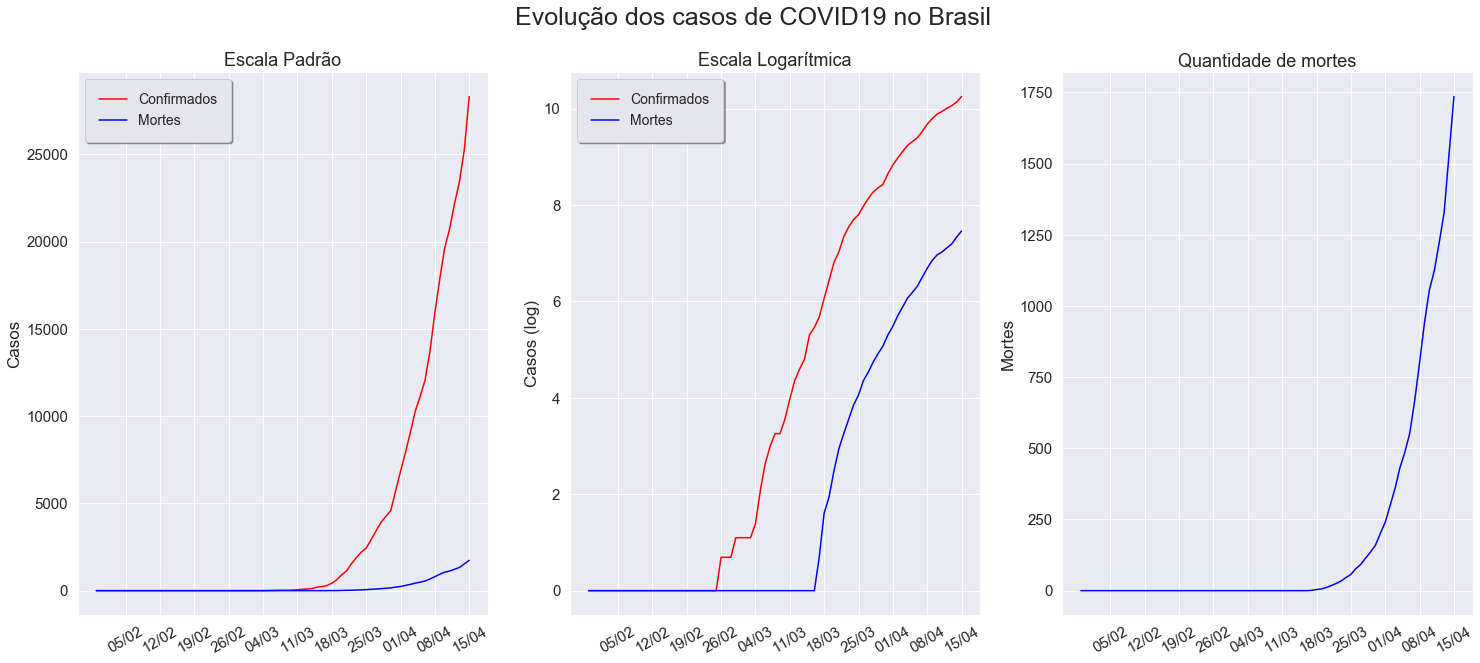

In [46]:
#Convertendo datas em formato específico para usar nos gráficos
#Usando list comprehesion para atribuir essas conversões a um dataframe
dateviewg1=[pd.to_datetime(g1.date)[x].strftime("%d/%m") for x in range(0,len(g1.date))]

f , ax = plt.subplots(nrows=1,ncols=3,figsize=(25,10))
f.suptitle("Evolução dos casos de COVID19 no Brasil",fontsize=25,y=0.97)

sns.set(style="darkgrid")

sns.lineplot(g1.date,(g1.cases),color="red",label="Confirmados",ax=ax[0])
sns.lineplot(g1.date,(g1.deaths),color="blue",label="Mortes",ax=ax[0])
ax[0].set_title("Escala Padrão",size=18)
ax[0].legend(ncol=1, loc="upper left", frameon=True,fontsize = 14,fancybox = True,framealpha = 0.95,shadow = True,borderpad = 1 )
ax[0].set_xlabel('',size=17)
ax[0].set_ylabel('Casos',size=17)
ax[0].tick_params(axis='x',labelsize=15,rotation=30)
ax[0].tick_params(axis='y',labelsize=15)
ax[0].set_xticks(g1.date[::-7])
ax[0].set_xticklabels(dateviewg1[::-7])

sns.lineplot(g1.date,np.log1p(g1.cases),color="red",label="Confirmados",ax=ax[1])
sns.lineplot(g1.date,np.log1p(g1.deaths),color="blue",label="Mortes",ax=ax[1])
ax[1].set_title("Escala Logarítmica",size=18)
ax[1].legend(ncol=1, loc="upper left", frameon=True,fontsize = 14,fancybox = True,framealpha = 0.95,shadow = True,borderpad = 1 )
ax[1].set_xlabel('',size=17)
ax[1].set_ylabel('Casos (log)',size=17)
ax[1].tick_params(axis='x',labelsize=15,rotation=30)
ax[1].tick_params(axis='y',labelsize=15)
ax[1].set_xticks(g1.date[::-7])
ax[1].set_xticklabels(dateviewg1[::-7])

sns.lineplot(g1.date,(g1.deaths),color="blue",ax=ax[2])
ax[2].set_title("Quantidade de mortes",size=18)
ax[2].set_xlabel('',size=17)
ax[2].set_ylabel('Mortes',size=17)
ax[2].tick_params(axis='x',labelsize=15,rotation=30)
ax[2].tick_params(axis='y',labelsize=15)
ax[2].set_xticks(g1.date[::-7])
ax[2].set_xticklabels(dateviewg1[::-7])

plt.show()

## A partir do dia 18 de março fica evidente no primeiro gráfico o crescimento exponencial dos casos confirmados no Brasil, e com mais 2 semanas após esse data, o número de infectados chega a 7500. E esse número aumenta mais que triplica em um período de apenas duas semana, ultrapassando 25000 casos confirmados. No segundo gráfico podemos notar de uma forma mais detalhada a relação entre o número de casos confirmados e a quantidade de mortes, e assim fazer um paralelo com o último gráfico, onde o crescimento exponencial de óbitos ocorre após o dia 25 de março, chegando a mais de 1500 mortes em menos de 3 semanas.

## 

## Há diferença na propagação do COVID19 entre as regiões Brasileiras ?

In [47]:
#Criando subset com as informações totais das regiões
reg=df.groupby(['Região','state'])['cases','deaths'].last().droplevel(level=1)
reg=reg.groupby('Região').sum()
reg.loc[-1]=reg.sum()
reg['Mortes por Casos (%)']=(reg.deaths/reg.cases)*100
reg=reg.rename(index={-1:'Total'},columns={'cases':'Casos Confirmados','deaths':'Casos de Mortes'})
# cmap Mapa de cores invertido / reverso 
reg.style.background_gradient(cmap="summer_r",vmin=reg.min().min(),vmax=reg.iloc[:-1,].max().max())

In [48]:
#Criando subsets com essas informações com o número de infectados e de mortes
#Pivot de Dados
reg_cases=pd.pivot_table(df,index=['date'],columns=['Região'],values=['cases'],aggfunc=np.sum)
reg_cases.columns=reg_cases.columns.get_level_values('Região')
reg_deaths=pd.pivot_table(df,index=['date'],columns=['Região'],values=['deaths'],aggfunc=np.sum)
reg_deaths.columns=reg_deaths.columns.get_level_values('Região')

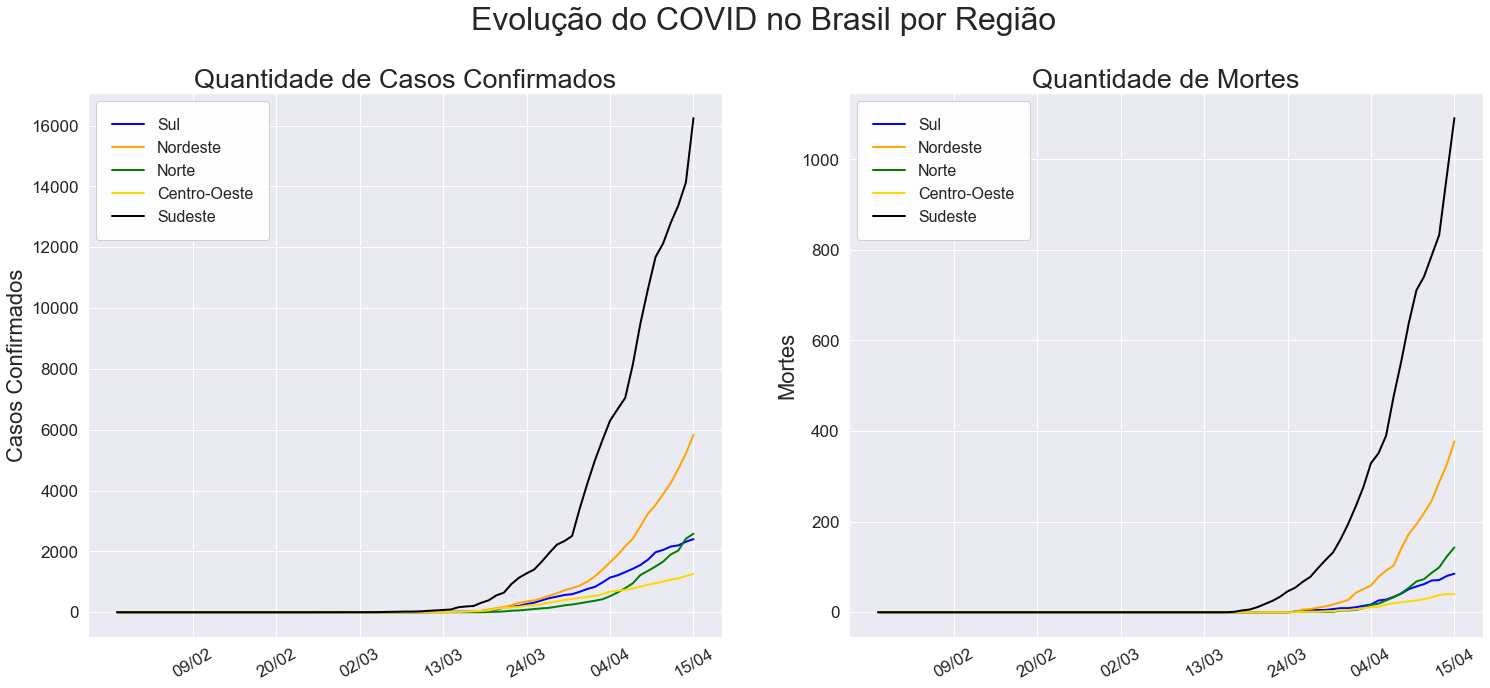

In [49]:
#Criando e personalizando visualizações
f , ax = plt.subplots(nrows=1,ncols=2,figsize=(25,10))
f.suptitle("Evolução do COVID no Brasil por Região",fontsize=32,y=1)
change_size_labels=22
change_size_titles=27
change_size_ticks=17
sns.set(style="whitegrid")

#Configurando formato de data para data personalizada para adicionar ao gráfico
dateview=[reg_cases.index.strftime('%d/%m')[x] for x in range(0,len(reg_cases.index))]

sns.lineplot(x=reg_cases.index,y='Sul',ax=ax[0],data=(reg_cases),linewidth=2,label="Sul",color="blue")
sns.lineplot(x=reg_cases.index,y='Nordeste',ax=ax[0],data=(reg_cases),linewidth=2,label="Nordeste",color="orange")
sns.lineplot(x=reg_cases.index,y='Norte',ax=ax[0],data=(reg_cases),linewidth=2,label="Norte",color="green")
sns.lineplot(x=reg_cases.index,y='Centro-Oeste',ax=ax[0],data=(reg_cases),linewidth=2,label="Centro-Oeste",color="gold")
sns.lineplot(x=reg_cases.index,y='Sudeste',ax=ax[0],data=(reg_cases),linewidth=2,label="Sudeste",color="black")
ax[0].set_title("Quantidade de Casos Confirmados",size=change_size_titles)
ax[0].set_xlabel('',size=change_size_labels)
ax[0].set_ylabel('Casos Confirmados',size=change_size_labels)
ax[0].tick_params(axis='x',labelsize=change_size_ticks,rotation=30)
ax[0].tick_params(axis='y',labelsize=change_size_ticks)
ax[0].legend(ncol=1, loc="upper left", frameon=True,fontsize = 16,fancybox = True,framealpha = 0.95,shadow = False,borderpad = 1 )
#Configurar o intervalo do eixo
ax[0].set_xticks(reg_cases.index[::-int(len(dateview)/7)])
ax[0].set_xticklabels(dateview[::-int(len(dateview)/7)])

sns.lineplot(x=reg_deaths.index,y='Sul',ax=ax[1],data=(reg_deaths),linewidth=2,label="Sul",color="blue")
sns.lineplot(x=reg_deaths.index,y='Nordeste',ax=ax[1],data=(reg_deaths),linewidth=2,label="Nordeste",color="orange")
sns.lineplot(x=reg_deaths.index,y='Norte',ax=ax[1],data=(reg_deaths),linewidth=2,label="Norte",color="green")
sns.lineplot(x=reg_deaths.index,y='Centro-Oeste',ax=ax[1],data=(reg_deaths),linewidth=2,label="Centro-Oeste",color="gold")
sns.lineplot(x=reg_deaths.index,y='Sudeste',ax=ax[1],data=(reg_deaths),linewidth=2,label="Sudeste",color="black")
ax[1].set_title("Quantidade de Mortes",size=change_size_titles)
ax[1].set_xlabel('',size=change_size_labels)
ax[1].set_ylabel('Mortes',size=change_size_labels)
ax[1].tick_params(axis='x',labelsize=change_size_ticks,rotation=30)
ax[1].tick_params(axis='y',labelsize=change_size_ticks)
ax[1].legend(ncol=1, loc="upper left", frameon=True,fontsize = 16,fancybox = True,framealpha = 0.95,shadow = False,borderpad = 1 )
#Configurar o intervalo do eixo
ax[1].set_xticks(reg_deaths.index[::-int(len(dateview)/7)])
ax[1].set_xticklabels(dateview[::-int(len(dateview)/7)])

plt.show()

## É evidente a elevada quantidade tanto de casos confirmados quanto de mortes na região Sudeste, apresentando mais que o dobro de ocorrências em relação a todas as outras regiões juntas. O crescimento desses casos também é de forma exponencial, sendo acentuado mais cedo que as demais regiões. Entretanto, o sudeste não é o único que já apresenta essa característica exponencial, devemos destacar também a região Nordestina que após o fim de março, teve aumentos consideráveis na propagação do vírus, se distanciando do grupo com menor volume de casos, formado pelas regiões Sul, Norte e Centro-Oeste.
## Deste modo, pensando na parte preditiva o modelo pode captar diferentes variações pra essas regiões. Logo, abordar as regiões brasileiras como variáveis categóricas binárias (dummies) na etapa de modelagem pode aumentar a acurácia preditiva.

## 

## Qual é a proporção do COVID19 em termos de ocupação geográfica da população ?
### Número de casos por km² por estado
### População e área total de municípios com pelo menos um caso de COVID19 pelas dimensões totais de cada estado

In [50]:
#Criando subset para análise
geo = df.groupby('state')[['cases','area_state','Densidade','Population_2019','infec_state_area','infec_state_population']].last().reset_index()
km2=1000
geo['infected_x_{}_km2'.format(km2)] = geo.cases/geo.area_state*km2
geo['habitant_x_{}_km2'.format(km2)] = geo.Population_2019/geo.area_state*km2
geo.tail()

state  cases  area_state  Densidade  Population_2019  \
22         Roraima    114  224273.831       2.70           605761   
23  Santa Catarina    853   95730.921      74.84          7164788   
24         Sergipe     46   21926.908     104.83          2298696   
25       São Paulo  11043  248219.481     184.99         45919049   
26       Tocantins     26  277720.404       5.66          1572866   

    infec_state_area  infec_state_population  infected_x_1000_km2  \
22          0.246258                0.764110             0.508307   
23          0.308117                0.733030             8.910392   
24          0.152631                0.514124             2.097879   
25          0.369073                0.872993            44.488853   
26          0.049220                0.409454             0.093619   

    habitant_x_1000_km2  
22          2700.988329  
23         74842.986207  
24        104834.480083  
25        184993.735443  
26          5663.487368

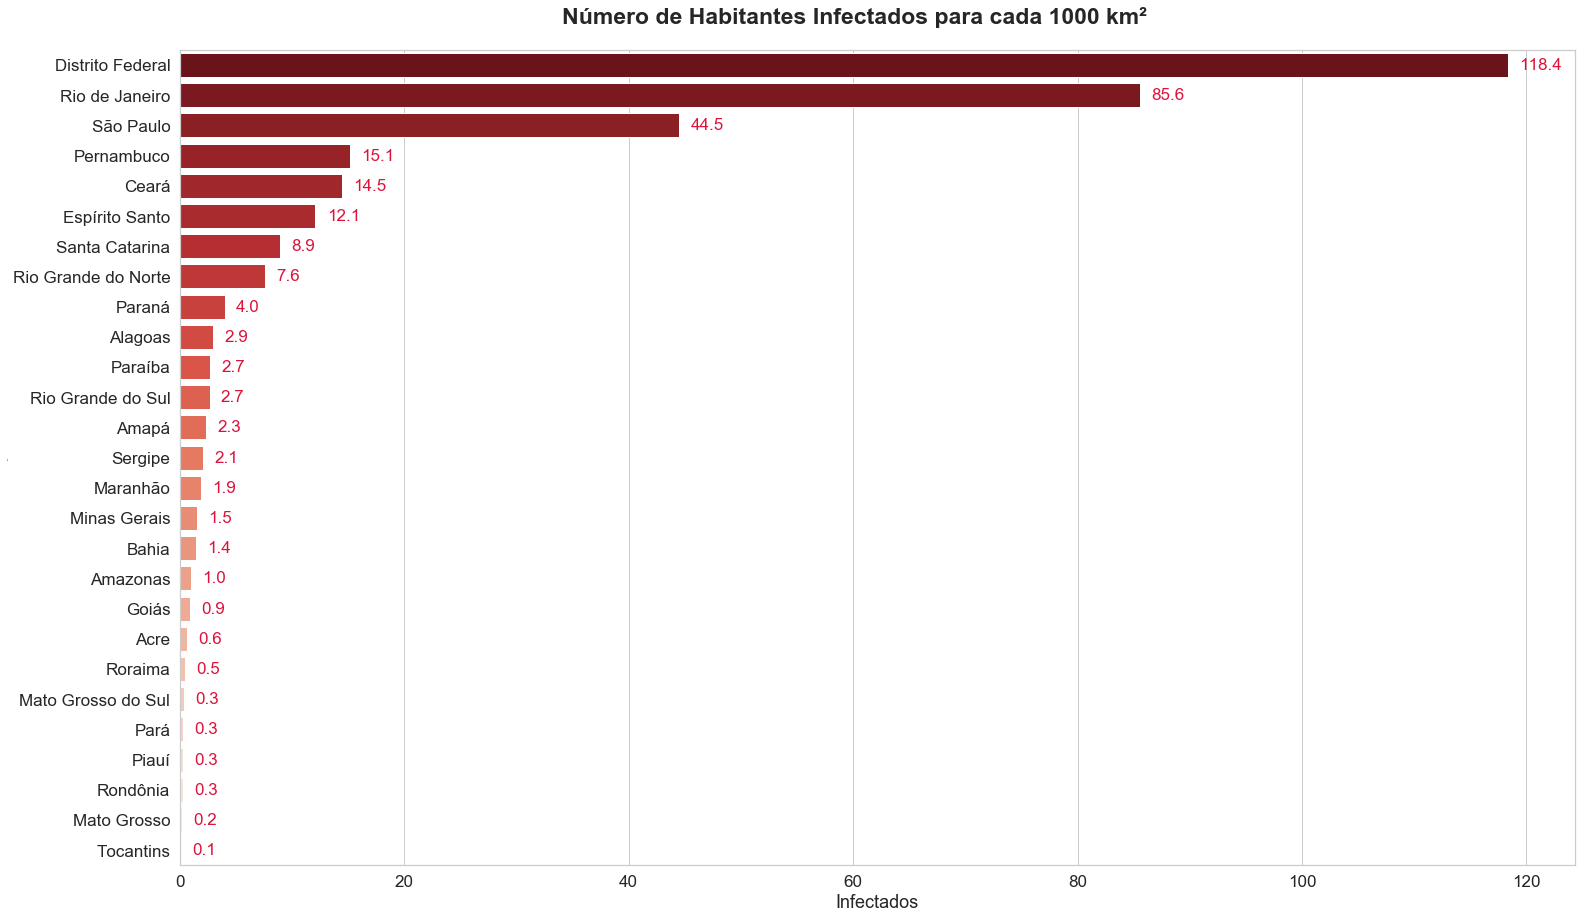

In [51]:
#Criando primeira visualização
geo_ord = geo.sort_values(by='infected_x_1000_km2',ascending=False)

fig , ax = plt.subplots(figsize = (25,15))
fig.suptitle('Número de Habitantes Infectados para cada 1000 km²',fontsize=23,weight='bold',y=0.92)
sns.set_style("darkgrid")

sns.barplot(y=geo_ord.state,x=geo_ord.infected_x_1000_km2,orient="h",palette="Reds_r")
ax.set_xlabel('Infectados',fontsize=18)
ax.set_ylabel('Estados',fontsize=0)
ax.tick_params(axis='x',labelsize=17)
ax.tick_params(axis='y',labelsize=17)

for i in range(1,28):
    ax.annotate('{:.1f}'.format(geo_ord.infected_x_1000_km2.tail(i).values[0]),(geo_ord.infected_x_1000_km2.tail(i).values[0]+1,27-i),size=17,color='crimson',va='center')

plt.show()

## Podemos perceber uma situação alarmante no Distrito Federal, mas devemos considerar também que sua área territorial é bem menor em comparação com os estados do país. Entretanto, o DF juntamente com o Rio de Janeiro e São Paulo lideram com grande folga o número de infectados para cada 1000 km², evidenciando a alta progragação do vírus nessas regiões.

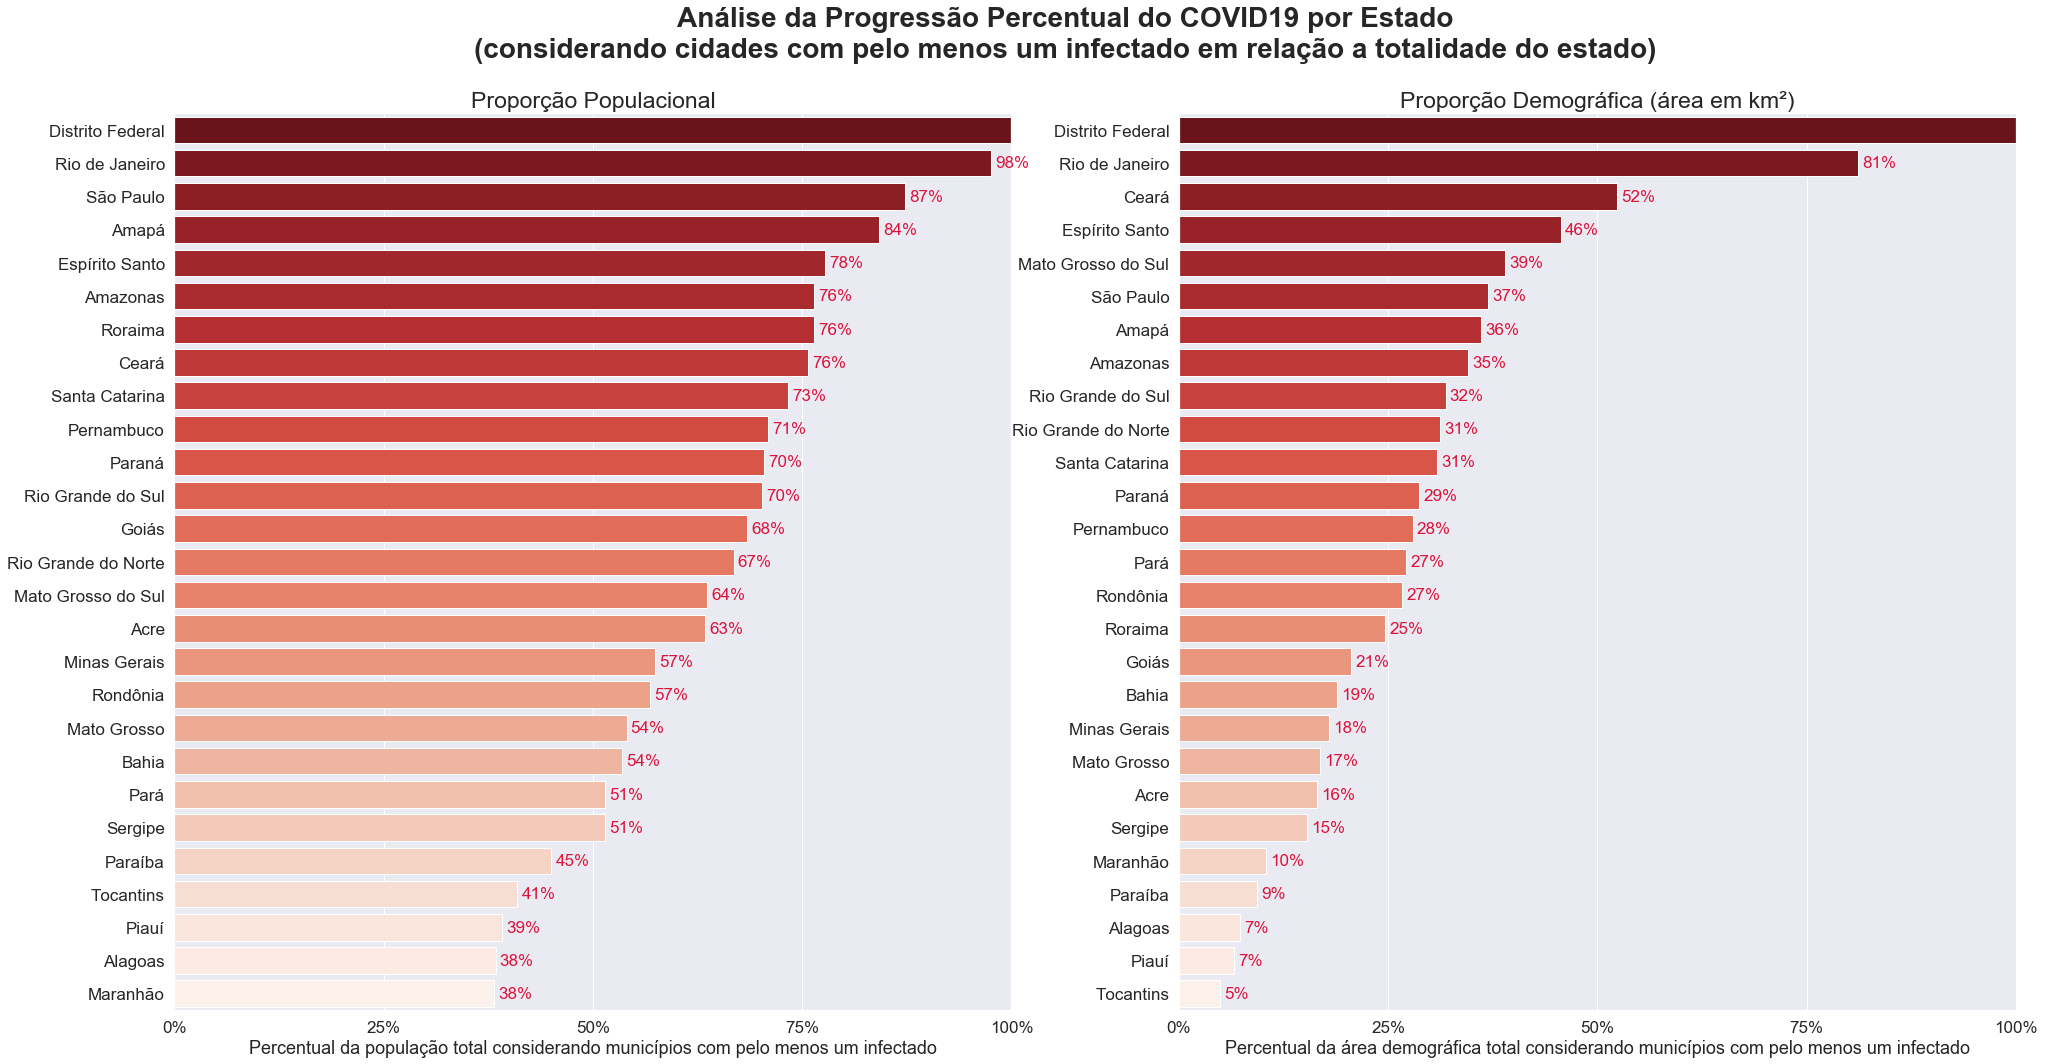

In [52]:
#Criando e personalizando segunda visualização
geo_ord = geo.sort_values(by='infec_state_population',ascending=False)

fig , ax = plt.subplots(ncols=2,nrows=1,figsize = (33,16.5))
fig.suptitle('Análise da Progressão Percentual do COVID19 por Estado\n(considerando cidades com pelo menos um infectado em relação a totalidade do estado)',
             fontsize=28,weight='bold',y=0.97)
sns.set_style("darkgrid")

sns.barplot(y=geo_ord.state,x=geo_ord.infec_state_population,orient="h",palette="Reds_r",ax=ax[0])
ax[0].set_title("Proporção Populacional",fontsize=23)
ax[0].set_xlabel('Percentual da população total considerando municípios com pelo menos um infectado',fontsize=18)
ax[0].set_ylabel('',fontsize=17)
ax[0].tick_params(axis='x',labelsize=17)
ax[0].tick_params(axis='y',labelsize=17)
ax[0].set_xticks([0.00,0.25,0.50,0.75,1.00])
ax[0].set_xticklabels(['0%','25%','50%','75%','100%'])
ax[0].set_xlim(0,1)

for i in range(1,28):
    ax[0].annotate('{:.0f}%'.format(geo_ord.infec_state_population.tail(i).values[0]*100),
                   (geo_ord.infec_state_population.tail(i).values[0]+0.005,27-i),size=17,color='crimson',va='center')

geo_ord = geo.sort_values(by='infec_state_area',ascending=False)
    
sns.barplot(y=geo_ord.state,x=geo_ord.infec_state_area,orient="h",palette="Reds_r",ax=ax[1])
ax[1].set_title("Proporção Demográfica (área em km²)",fontsize=23)
ax[1].set_xlabel('Percentual da área demográfica total considerando municípios com pelo menos um infectado',fontsize=18)
ax[1].set_ylabel('',fontsize=17)
ax[1].tick_params(axis='x',labelsize=17)
ax[1].tick_params(axis='y',labelsize=17)
ax[1].set_xticks([0.00,0.25,0.50,0.75,1.00])
ax[1].set_xticklabels(['0%','25%','50%','75%','100%'])
ax[1].set_xlim(0,1)

for i in range(1,28):
    ax[1].annotate('{:.0f}%'.format(geo_ord.infec_state_area.tail(i).values[0]*100),
                   (geo_ord.infec_state_area.tail(i).values[0]+0.005,27-i),size=17,color='crimson',va='center')

plt.show()

## Podemos perceber que mais da metade da população total da grande maioria dos estados já teve 'contato' com o COVID19. Com destaque para o Distrito Federal e os estados do Rio de Janeiro, São Paulo, Amapá e Espiríto Santo, Roraima e Ceará, lugares onde mais de 75% da população reside em cidades com pelo menos um caso confirmado de COVID19. No contexto territorial, temos o Distrito Federal, as regiões carioca e cearense com mais de 50% do seu território contendo cidades com no mínimo um infectado. Fazendo uma comparação entre as duas métricas, regiões como São Paulo, Amapá, Espiríto Santo e entre outras que possuem alto percentual populacional e baixo percentual territorial, mostram que apenas as suas cidades que possuem alta densidade demográfica são as mais atingidas até o momento. Devemos destacar também os estados do Maranhão, Tocantins, Alagoas, Piauí e Paraíba com o status do COVID19 como 'controlado', onde possuem 'baixos' percentuais populacionais (entre 38 e 45%) e territoriais (entre 5 e 10%).

## 

## Como é a evolução da proporção de casos confirmados na população brasileira ao longo do tempo ?

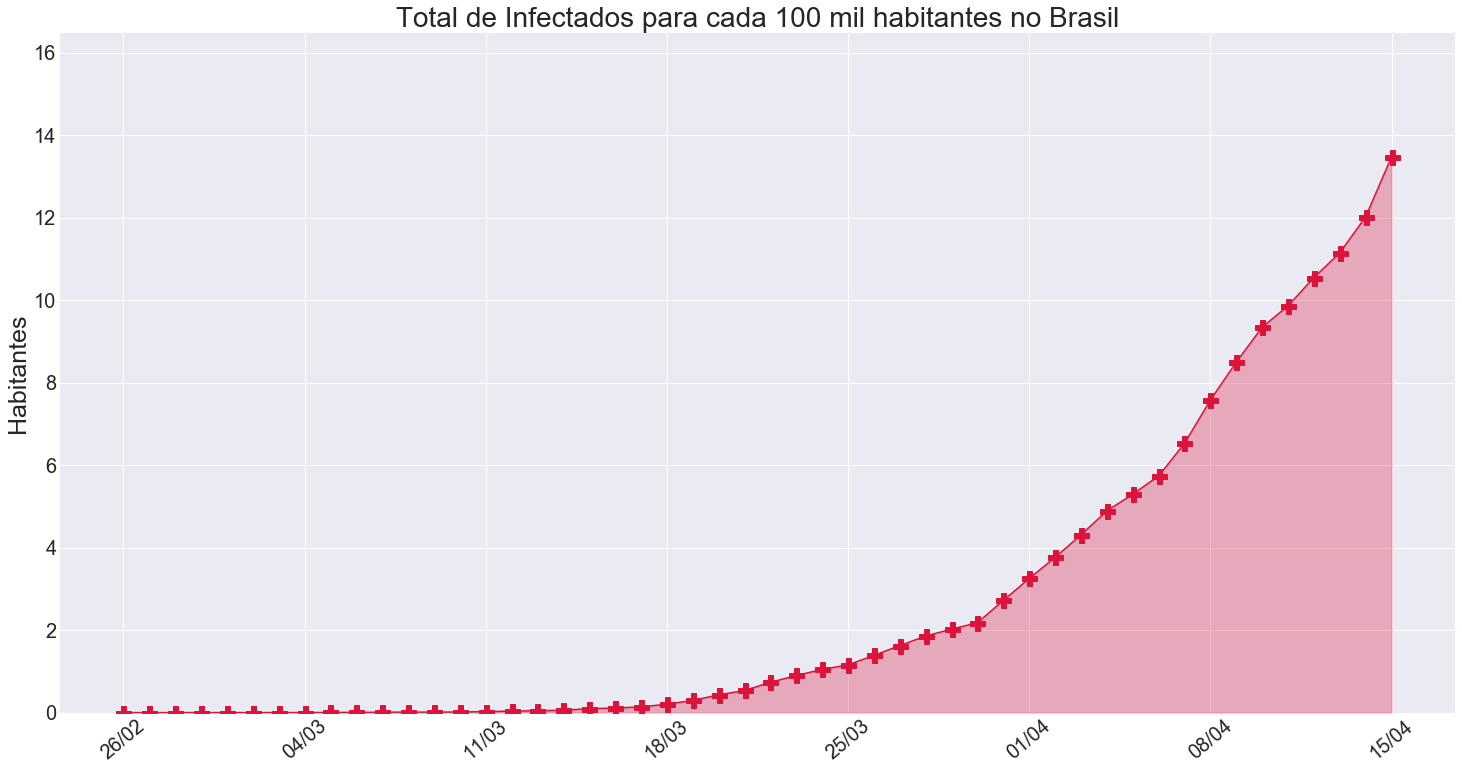

In [55]:
#Agrupando os dados e selecionando as colunas requeridas
g1= df.groupby('date').sum().reset_index()
g1=g1[['cases','date','deaths']]

#Convertendo datas em formato específico para usar nos gráficos
dateviewg1=[pd.to_datetime(g1.date)[x].strftime("%d/%m") for x in range(0,len(g1.date))]

#População total do Brasil
tot_pop=df.Population_2019.unique().sum()
grp_hab=10**5

fig , axes = plt.subplots(figsize=(25,12.5))

plt.style.use("seaborn-darkgrid")

#Selecionando a data inicial como a de primeiro caso confirmado em vez do primeiro caso suspeito
g1=g1[g1['date']>='2020-02-26']

axes.plot(g1.date, (g1.cases/tot_pop)*grp_hab, color="crimson", alpha=1,marker='P',markersize=15)
axes.fill_between( g1.date, (g1.cases/tot_pop)*grp_hab, color="crimson", alpha=0.3)
axes.set_ylim(0,((g1.cases/tot_pop)*grp_hab).max()+3)
axes.set_xlabel('',size=25)
axes.set_ylabel('Habitantes',size=25)
axes.set_title('Total de Infectados para cada 100 mil habitantes no Brasil',size=28)
axes.tick_params(axis='x',labelsize=20,rotation=40)
axes.tick_params(axis='y',labelsize=20)
axes.set_xticks(g1.date[::-7])
axes.set_xticklabels(dateviewg1[::-7])
#axes.set_yticklabels(labels=list(range(0,2,0.25)))
axes.grid(True)

plt.show()

## Visualizando a tendência exponencial do número de infectados em relação ao tamanho da população brasileira, temos uma visão mais detalhada e compreensível. Logo, notamos que essa tendência tem início próximo do dia 25/03, onde há aproximadamente 2 infectados para cada 100 mil habitantes, e esse número praticamente dobra a cada semana, atingindo mais de 12 casos confirmados para cada 100 mil habitantes no país.
## Implementar uma variável que capte esse aumento ao longo do tempo em cada estado pode ser interessante para a parte preditiva do modelo.

## 

## Como é a progressão do COVID19 no estado com maior número de casos ?

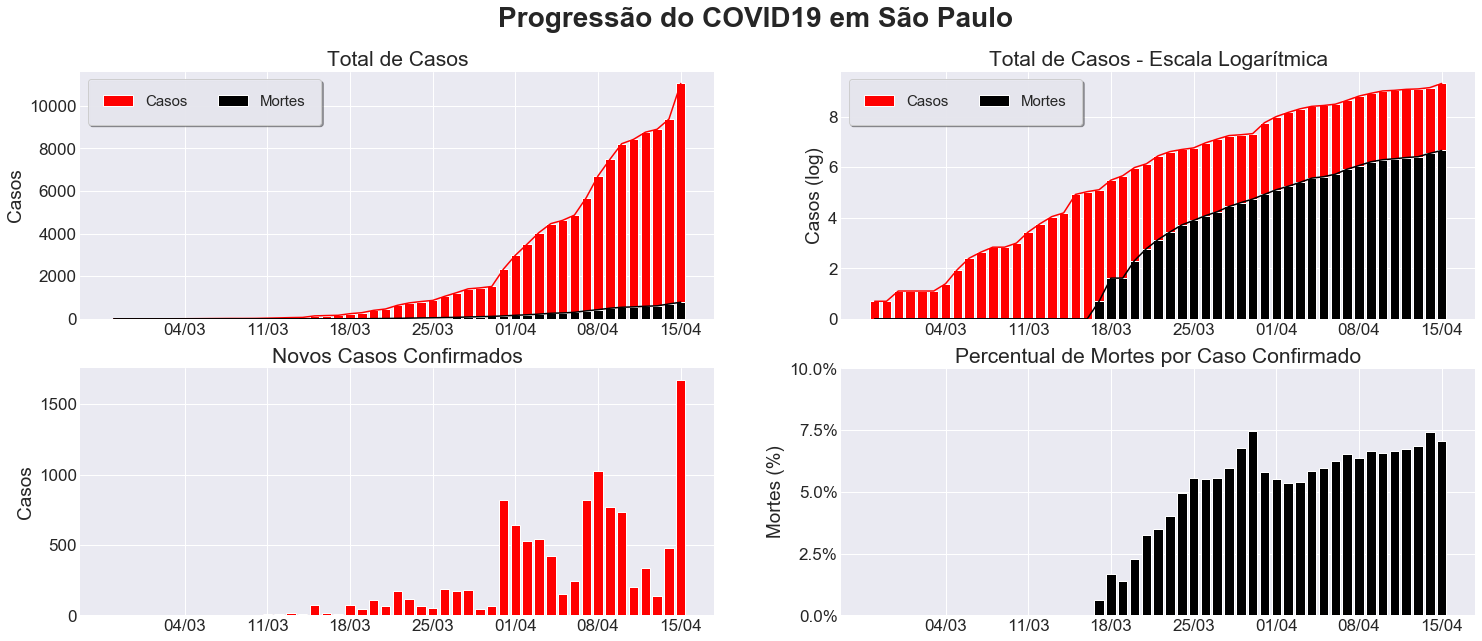

In [56]:
city='São Paulo'
g2=df[df['state']==city].reset_index(drop=True)
g2=g2[g2['date']>'2020-02-26'].reset_index(drop=True)

fig , ax = plt.subplots(nrows=2,ncols=2,figsize=(25,10))
dateview = [pd.to_datetime(g2.date)[x].strftime("%d/%m") for x in range(0,len(g2.date))]
tit=("Progressão do COVID19 em {}".format(city))
fig.suptitle(tit,y=0.97,fontsize=28,weight='bold')
sns.set_style("darkgrid")

titsize, labsize, ticksize = 21, 19, 17

ax[0,0].bar(g2.date,g2.cases,color="red",label="Casos")
ax[0,0].plot(g2.date,g2.cases,color="red")
ax[0,0].bar(g2.date,g2.deaths,color="black",label="Mortes")
ax[0,0].plot(g2.date,g2.deaths,color="black")
ax[0,0].set_title("Total de Casos".format(city),fontsize=titsize)
ax[0,0].set_xlabel('',size=labsize)
ax[0,0].set_ylabel('Casos',size=labsize)
ax[0,0].tick_params(axis='x',labelsize=ticksize)
ax[0,0].tick_params(axis='y',labelsize=ticksize)
ax[0,0].set_xticks(g2.date[::-7])
ax[0,0].set_xticklabels(dateview[::-7])
ax[0,0].legend(ncol=2, loc="upper left", frameon=True,fontsize = 15,fancybox = True,framealpha = 0.95,shadow = True,borderpad = 1.05 )

ax[0,1].bar(g2.date,np.log1p(g2.cases),color="red",label="Casos")
ax[0,1].plot(g2.date,np.log1p(g2.cases),color="red")
ax[0,1].bar(g2.date,np.log1p(g2.deaths),color="black",label="Mortes")
ax[0,1].plot(g2.date,np.log1p(g2.deaths),color="black")
ax[0,1].set_title("Total de Casos - Escala Logarítmica".format(city),fontsize=titsize)
ax[0,1].set_xlabel('',size=labsize)
ax[0,1].set_ylabel('Casos (log)',size=labsize)
ax[0,1].tick_params(axis='x',labelsize=ticksize)
ax[0,1].tick_params(axis='y',labelsize=ticksize)
ax[0,1].set_xticks(g2.date[::-7])
ax[0,1].set_xticklabels(dateview[::-7])
ax[0,1].legend(ncol=2, loc="upper left", frameon=True,fontsize = 15,fancybox = True,framealpha = 0.95,shadow = True,borderpad = 1.05 )


ax[1,0].bar(g2.date,g2.new_cases,color="red")
ax[1,0].set_title("Novos Casos Confirmados".format(city),fontsize=titsize)
ax[1,0].set_xlabel('',size=labsize)
ax[1,0].set_ylabel('Casos',size=labsize)
ax[1,0].tick_params(axis='x',labelsize=ticksize)
ax[1,0].tick_params(axis='y',labelsize=ticksize)
ax[1,0].set_xticks(g2.date[::-7])
ax[1,0].set_xticklabels(dateview[::-7])

ax[1,1].bar(g2.date,(g2.deaths/g2.cases)*100,color="black")
ax[1,1].set_title("Percentual de Mortes por Caso Confirmado".format(city),fontsize=titsize)
ax[1,1].set_xlabel('',size=labsize)
ax[1,1].set_ylabel('Mortes (%)',size=labsize)
ax[1,1].tick_params(axis='x',labelsize=ticksize)
ax[1,1].tick_params(axis='y',labelsize=ticksize)
ax[1,1].set_xticks(g2.date[::-7])
ax[1,1].set_xticklabels(dateview[::-7])
ax[1,1].set_ylim(0,10)
ax[1,1].set_yticks([0.0,2.5,5.0,7.5,10.0])
ax[1,1].set_yticklabels(labels=['0.0%','2.5%','5.0%','7.5%','10.0%'])

plt.show()

## Podemos perceber a acentuação do crescimento exponencial de infectados a partir do dia 26 de março em São Paulo, onde em uma semana a quantidade total de casos confirmados quase triplica. A taxa de mortes por infectados começa a aumentar no dia 18/03 chegando a 5% no dia 24, após esse dia essa taxa se mantém constante entre 5 e 7,5%.

## 

## Há correlação entre o volume da propagação do COVID e as características populacionais de cada estado ?

In [57]:
#Selecionando o valor máximo de colunas específicas por estado
st=df.groupby('state')['cases','deaths','Population_2019','Densidade'].max()
st.columns=['Confirmados','Mortes','População','Densidade Demográfica']
st.style.background_gradient()

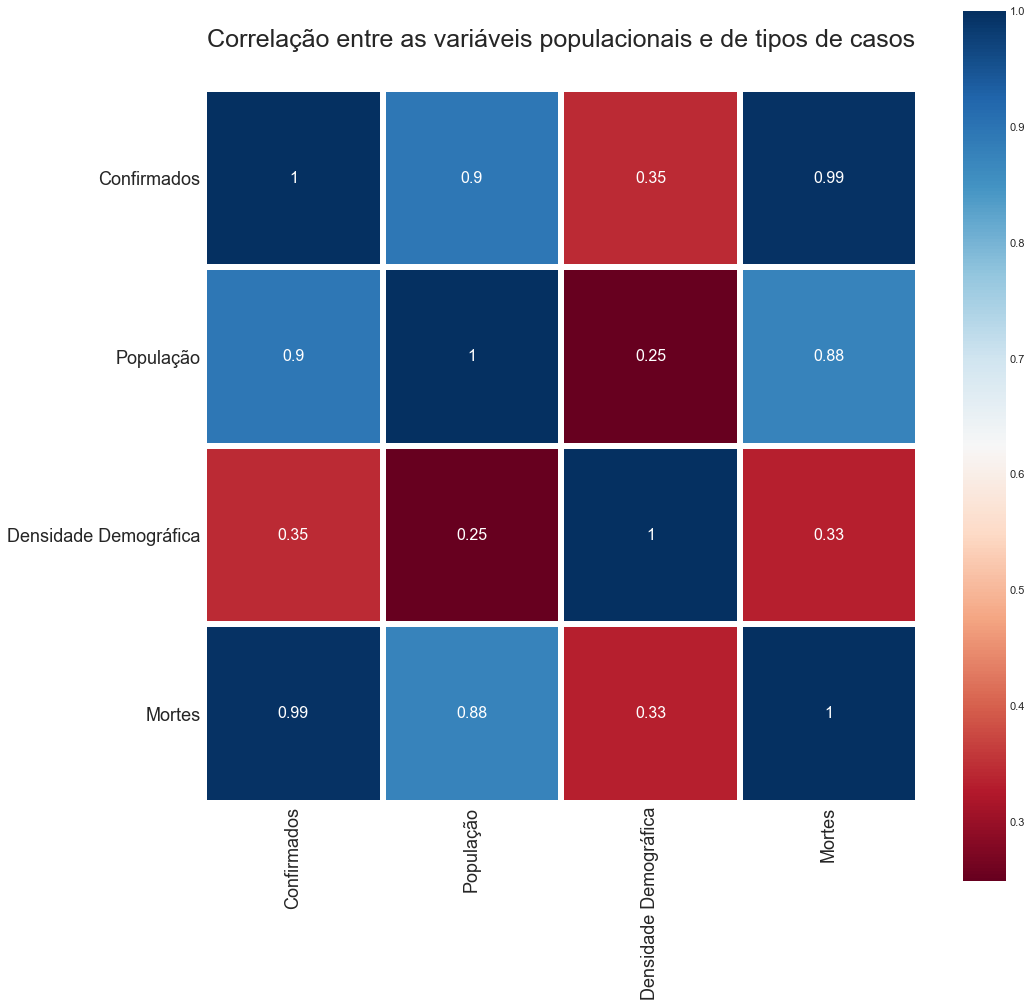

In [58]:
colormap = plt.cm.RdBu
plt.figure(figsize=(16,16))
plt.title('Correlação entre as variáveis populacionais e de tipos de casos', y=1.05, fontsize=25)
sns.heatmap(st.loc[:,['Confirmados','População','Densidade Demográfica','Mortes']].corr(),linewidths=5, square=True, cmap=colormap, linecolor='white', annot=True,annot_kws={'fontsize':16})
plt.tick_params(axis='x',labelsize=18,rotation=90)
plt.tick_params(axis='y',labelsize=18,rotation=0)

plt.show()

## Pode-se inferir que há uma alta correlação entre o número de infectados e mortos com o tamanho da população por estado. Logo, essas variáveis e derivações do relacionamento entre elas podem ajudar a identificar características específicas na modelagem, podendo aumentar a eficiência preditiva.

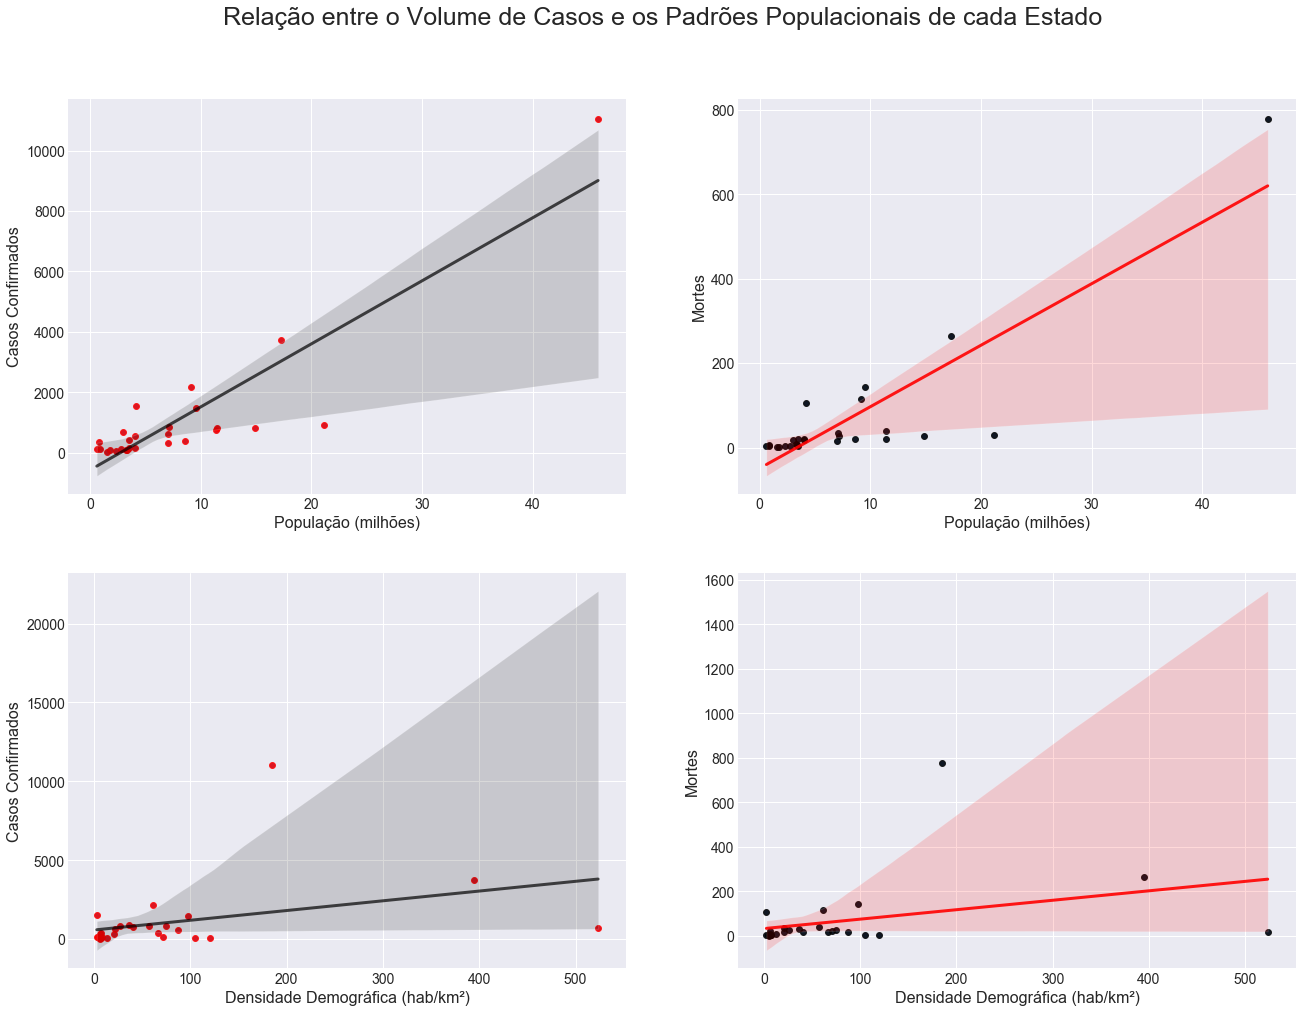

In [59]:
fig , ax = plt.subplots(2,2,figsize=(22,16))

tit="Relação entre o Volume de Casos e os Padrões Populacionais de cada Estado"
fig.suptitle(tit, fontsize=25,y=0.96)

sns.set_style("darkgrid")

sns.scatterplot(y=st.Confirmados,x=st.População,ax=ax[0,0])
sns.regplot(y=st.Confirmados,x=st.População, line_kws={"color":"black","alpha":0.7,"lw":3},ax=ax[0,0],color="red")
ax[0,0].set_xlabel('População (milhões)',size=16)
ax[0,0].set_ylabel('Casos Confirmados',size=16)
ax[0,0].tick_params(axis='x',labelsize=14)
ax[0,0].tick_params(axis='y',labelsize=14)
#ax[0,0].set_ylim(-50,800)
ax[0,0].set_xticklabels(['','0','10','20','30','40'])

sns.scatterplot(y=st.Mortes,x=st.População,ax=ax[0,1])
sns.regplot(y=st.Mortes,x=st.População, line_kws={"color":"red","alpha":0.9,"lw":3},ax=ax[0,1],color="black")
ax[0,1].set_xlabel('População (milhões)',size=16)
ax[0,1].set_ylabel('Mortes',size=16)
ax[0,1].tick_params(axis='x',labelsize=14)
ax[0,1].tick_params(axis='y',labelsize=14)
ax[0,1].set_xticklabels(['','0','10','20','30','40'])

sns.scatterplot(y=st.Confirmados,x=st['Densidade Demográfica'],ax=ax[1,0])
sns.regplot(y=st.Confirmados,x=st['Densidade Demográfica'], line_kws={"color":"black","alpha":0.7,"lw":3},ax=ax[1,0],color="red")
ax[1,0].set_xlabel('Densidade Demográfica (hab/km²)',size=16)
ax[1,0].set_ylabel('Casos Confirmados',size=16)
ax[1,0].tick_params(axis='x',labelsize=14)
ax[1,0].tick_params(axis='y',labelsize=14)

sns.scatterplot(y=st.Mortes,x=st['Densidade Demográfica'],ax=ax[1,1])
sns.regplot(y=st.Mortes,x=st['Densidade Demográfica'], line_kws={"color":"red","alpha":0.9,"lw":3},ax=ax[1,1],color="black")
ax[1,1].set_xlabel('Densidade Demográfica (hab/km²)',size=16)
ax[1,1].set_ylabel('Mortes',size=16)
ax[1,1].tick_params(axis='x',labelsize=14)
ax[1,1].tick_params(axis='y',labelsize=14)

plt.show()

## Assim sendo, temos outra confirmação, dessa vez de forma visual, entre o número de casos e o tamanho da população dos estados. Entretando, podemos perceber também alguns pontos em destaque que fogem do padrão, principalmente nos relacionamentos envolvidos com a densidade demográfica, onde há estados que possuem poucos habitantes por km² e grandes números de casos, além de estados com alta densidade demográfica e sem aumento significativo no número de casos. Por outro lado, podemos investigar melhor essa relação, aprofundando na análise da densidade demográfica, sem considerar apenas o a área ocupada no território completo e sim nos grandes centros urbanos de cada estado.
## Desta forma, com essas duas análises, retiramos alguns insigths interessantes para trabalhar. Criar variáveis para captar os relacionamentos significativos é um desses insigths.

# 

# Feature Engineering
## Com objetivo de criar novas variáveis que possam ajudar na predição de novos casos ou suspeitas

In [60]:
#Copiando dataframe original
date_state=df.copy()

## Adição de variáveis que captem padrões dos períodos próximos
### Como o total, a diferença e a taxa de casos de dias anteriores

In [61]:
#Criando Variáveis

#Relacionadas ao dia anterior (d-1)
#Número de Casos Confirmados por Estado
date_state['Cases_Last_Day']=date_state.groupby(['state']).cases.shift()
#Diferença de Casos Confirmados em relação ao dia anterior a esse
date_state['Diff_Cases_Last_Day']=date_state.groupby(['state']).Cases_Last_Day.diff()

#Relacionadas ao antepenúltimo dia d-2
#Número de Casos Confirmados por Estado
date_state['Cases_Last_Day_1']=date_state.groupby(['state']).cases.shift(2)
#Diferença de Casos Confirmados em relação ao dia anterior a esse
date_state['Diff_Cases_Last_Day_1']=date_state.groupby(['state']).Cases_Last_Day_1.diff()

#Relacionadas ao dia d-3
#Número de Casos Confirmados por Estado
date_state['Cases_Last_Day_2']=date_state.groupby(['state']).cases.shift(3)
#Diferença de Casos Confirmados em relação ao dia d-3
date_state['Diff_Cases_Last_Day_2']=date_state.groupby(['state']).Cases_Last_Day_2.diff()

#Taxa de Casos Confirmados e de Mortes pelo tamanho da População e pela Densidade Demográfica do dia anterior
date_state['Cases_por_Population_Last_Day']=date_state['Cases_Last_Day']/date_state['Population_2019']
date_state['Cases_por_Densidade_Last_Day']=date_state['Cases_Last_Day']/date_state['Densidade']

date_state

date      state  cases  deaths   Latitude  Longitude  Densidade  \
0    2020-01-30       Acre      0       0  -9.047868 -70.526498       5.37   
1    2020-01-31       Acre      0       0  -9.047868 -70.526498       5.37   
2    2020-02-01       Acre      0       0  -9.047868 -70.526498       5.37   
3    2020-02-02       Acre      0       0  -9.047868 -70.526498       5.37   
4    2020-02-03       Acre      0       0  -9.047868 -70.526498       5.37   
...         ...        ...    ...     ...        ...        ...        ...   
2074 2020-04-11  Tocantins     23       0 -10.885513 -48.371691       5.66   
2075 2020-04-12  Tocantins     25       0 -10.885513 -48.371691       5.66   
2076 2020-04-13  Tocantins     26       0 -10.885513 -48.371691       5.66   
2077 2020-04-14  Tocantins     26       0 -10.885513 -48.371691       5.66   
2078 2020-04-15  Tocantins     26       1 -10.885513 -48.371691       5.66   

      area_state Região  UF  ...  cases_font2  new_cases_font2  \
0     164123.738  Norte  AC  ...          0.0              0.0   
1     164123.738  Norte  AC  ...          0.0              0.0   
2     164123.738  Norte  AC  ...          0.0              0.0   
3     164123.738  Norte  AC  ...          0.0              0.0   
4     164123.738  Norte  AC  ...          0.0              0.0   
...          ...    ...  ..  ...          ...              ...   
2074  277720.404  Norte  TO  ...         25.0              2.0   
2075  277720.404  Norte  TO  ...         26.0              1.0   
2076  277720.404  Norte  TO  ...         26.0              0.0   
2077  277720.404  Norte  TO  ...         27.0              1.0   
2078  277720.404  Norte  TO  ...         29.0              2.0   

      Cases_Last_Day  Diff_Cases_Last_Day  Cases_Last_Day_1  \
0                NaN                  NaN               NaN   
1                0.0                  NaN               NaN   
2                0.0                  0.0               0.0   
3                0.0                  0.0               0.0   
4                0.0                  0.0               0.0   
...              ...                  ...               ...   
2074            23.0                  0.0              23.0   
2075            23.0                  0.0              23.0   
2076            25.0                  2.0              23.0   
2077            26.0                  1.0              25.0   
2078            26.0                  0.0              26.0   

      Diff_Cases_Last_Day_1  Cases_Last_Day_2  Diff_Cases_Last_Day_2  \
0                       NaN               NaN                    NaN   
1                       NaN               NaN                    NaN   
2                       NaN               NaN                    NaN   
3                       0.0               0.0                    NaN   
4                       0.0               0.0                    0.0   
...                     ...               ...                    ...   
2074                    0.0              23.0                    4.0   
2075                    0.0              23.0                    0.0   
2076                    0.0              23.0                    0.0   
2077                    2.0              23.0                    0.0   
2078                    1.0              25.0                    2.0   

      Cases_por_Population_Last_Day  Cases_por_Densidade_Last_Day  
0                               NaN                           NaN  
1                          0.000000                      0.000000  
2                          0.000000                      0.000000  
3                          0.000000                      0.000000  
4                          0.000000                      0.000000  
...                             ...                           ...  
2074                       0.000015                      4.063604  
2075                       0.000015                      4.063604  
2076                       0.000016            

## Variáveis que captam as medidas de posição e dispersão de cada estado, dado um período de tempo
### Média, máximo e desvio Padrão da soma de casos confirmados e do número de novos casos confirmados

In [62]:
#Soma de casos confirmados
#Defininda a lista de variáveis a serem coletadas:
features=['Cases_Last_Day']
#Definindo os períodos de tempo para serem coletados:
period=[3,7]

for i in list(range(0,len(features))):
    
    for j in list(range(0,len(period))):
        
        #Média
        date_state['Mean_{}s_{}'.format(features[i],period[j])]=date_state.groupby(['state'])[features[i]].rolling(period[j]).mean().values
        #Desvio Padrão
        date_state['Desvio_{}s_{}'.format(features[i],period[j])]=date_state.groupby(['state'])[features[i]].rolling(period[j]).std().values

#Novos casos confirmados = Diferença de casos para o dia anterior
#Defininda a lista de variáveis a serem coletadas:
features=['Diff_Cases_Last_Day']
#Definindo os períodos de tempo para serem coletados:
period=[3,7]

for i in list(range(0,len(features))):
    
    for j in list(range(0,len(period))):
        
        #Média
        date_state['Mean_{}s_{}'.format(features[i],period[j])]=date_state.groupby(['state'])[features[i]].rolling(period[j]).mean().values
        #Máximo
        date_state['Max_{}s_{}'.format(features[i],period[j])]=date_state.groupby(['state'])[features[i]].rolling(period[j]).max().values
        #Desvio Padrão
        date_state['Desvio_{}s_{}'.format(features[i],period[j])]=date_state.groupby(['state'])[features[i]].rolling(period[j]).std().values
      
date_state.tail()

date      state  cases  deaths   Latitude  Longitude  Densidade  \
2074 2020-04-11  Tocantins     23       0 -10.885513 -48.371691       5.66   
2075 2020-04-12  Tocantins     25       0 -10.885513 -48.371691       5.66   
2076 2020-04-13  Tocantins     26       0 -10.885513 -48.371691       5.66   
2077 2020-04-14  Tocantins     26       0 -10.885513 -48.371691       5.66   
2078 2020-04-15  Tocantins     26       1 -10.885513 -48.371691       5.66   

      area_state Região  UF  ...  Mean_Cases_Last_Days_3  \
2074  277720.404  Norte  TO  ...               23.000000   
2075  277720.404  Norte  TO  ...               23.000000   
2076  277720.404  Norte  TO  ...               23.666667   
2077  277720.404  Norte  TO  ...               24.666667   
2078  277720.404  Norte  TO  ...               25.666667   

      Desvio_Cases_Last_Days_3  Mean_Cases_Last_Days_7  \
2074              3.111454e-07               19.428571   
2075              3.111454e-07               20.714286   
2076              1.154701e+00               21.857143   
2077              1.527525e+00               23.142857   
2078              5.773503e-01               24.142857   

      Desvio_Cases_Last_Days_7  Mean_Diff_Cases_Last_Days_3  \
2074                  3.644957                     1.333333   
2075                  2.927700                     0.000000   
2076                  2.794553                     0.666667   
2077                  2.193063                     1.000000   
2078                  1.463850                     1.000000   

      Max_Diff_Cases_Last_Days_3  Desvio_Diff_Cases_Last_Days_3  \
2074                         4.0                       2.309401   
2075                         0.0                       0.000000   
2076                         2.0                       1.154701   
2077                         2.0                       1.000000   
2078                         2.0                       1.000000   

      Mean_Diff_Cases_Last_Days_7  Max_Diff_Cases_Last_Days_7  \
2074                     1.571429                         4.0   
2075                     1.285714                         4.0   
2076                     1.142857                         4.0   
2077                     1.285714                         4.0   
2078                     1.000000                         4.0   

      Desvio_Diff_Cases_Last_Days_7  
2074                       1.618347  
2075                       1.704336  
2076                       1.573592  
2077                       1.496026  
2078                       1.527525  

[5 rows x 52 columns]

## One Hot
### Criando variáveis categóricas para que o modelo possa entender as possíveis diferenças da progressão de casos por estado e região

In [63]:
#Criando novas colunas para transformação
date_state['UF_CAT']=date_state.UF
date_state['REG_CAT']=date_state.Região

#Transformando as variáveis
ohe_uf = OneHotEncoder(cols=['UF_CAT','REG_CAT'],use_cat_names=True,drop_invariant=True)
date_state = ohe_uf.fit_transform(date_state)
date_state.head()

date state  cases  deaths  Latitude  Longitude  Densidade  area_state  \
0 2020-01-30  Acre      0       0 -9.047868 -70.526498       5.37  164123.738   
1 2020-01-31  Acre      0       0 -9.047868 -70.526498       5.37  164123.738   
2 2020-02-01  Acre      0       0 -9.047868 -70.526498       5.37  164123.738   
3 2020-02-02  Acre      0       0 -9.047868 -70.526498       5.37  164123.738   
4 2020-02-03  Acre      0       0 -9.047868 -70.526498       5.37  164123.738   

  Região  UF  ...  UF_CAT_RR  UF_CAT_SC  UF_CAT_SE  UF_CAT_SP  UF_CAT_TO  \
0  Norte  AC  ...          0          0          0          0          0   
1  Norte  AC  ...          0          0          0          0          0   
2  Norte  AC  ...          0          0          0          0          0   
3  Norte  AC  ...          0          0          0          0          0   
4  Norte  AC  ...          0          0          0          0          0   

   REG_CAT_Norte  REG_CAT_Nordeste  REG_CAT_Centro-Oeste  REG_CAT_Sudeste  \
0              1                 0                     0                0   
1              1                 0                     0                0   
2              1                 0                     0                0   
3              1                 0                     0                0   
4              1                 0                     0                0   

   REG_CAT_Sul  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 84 columns]

## Variáveis que captem padrões de geolocalização
### Com finalidade de identificar possíveis relacionamentos entre o número de casos e a proximidade com os estados mais infectados

In [64]:
#Visualizando os estados com maior número de casos
date_state.groupby('state')['UF','cases'].last().sort_values(by='cases',ascending=False).head(10).style.background_gradient(cmap='summer_r',vmin=0,vmax=5000)

## Calculando a distância dos estados com relação aos 3 estados com maior número de casos

In [65]:
#Selecionando a Latitude e Longitude dos estados desejados

ufs=['RJ','CE','SP']

for uf in range(0,len(ufs)):

    sploc=(date_state[date_state['UF']==ufs[uf]]['Latitude'].max(),date_state[date_state['UF']==ufs[uf]]['Longitude'].max())

    #Criando dataframe com a latitude e longitude de cada estado
    state_loc=date_state.groupby('state')[['Latitude','Longitude','cases']].last()

    #Criando lista que armazenará a distância de cada estado para os estados com maior número de casos
    state_dist=[]

    for i in range(0,state_loc.shape[0]):
        #Definindo localização do estado
        loc=(state_loc.iloc[i,0],state_loc.iloc[i,1])

        #Calculando a distância em km para o estado de SP e adicionando na lista
        state_dist.append(geopy.distance.distance(loc, sploc).km)

    #Adicionando o resultado ao dataframe
    state_loc['DIST_{}'.format(ufs[uf])]=state_dist

    #Incrementando essa variável ao dataframe principal
    date_state=date_state.merge(state_loc['DIST_{}'.format(ufs[uf])],how='left',on='state')

date_state

date      state  cases  deaths   Latitude  Longitude  Densidade  \
0    2020-01-30       Acre      0       0  -9.047868 -70.526498       5.37   
1    2020-01-31       Acre      0       0  -9.047868 -70.526498       5.37   
2    2020-02-01       Acre      0       0  -9.047868 -70.526498       5.37   
3    2020-02-02       Acre      0       0  -9.047868 -70.526498       5.37   
4    2020-02-03       Acre      0       0  -9.047868 -70.526498       5.37   
...         ...        ...    ...     ...        ...        ...        ...   
2074 2020-04-11  Tocantins     23       0 -10.885513 -48.371691       5.66   
2075 2020-04-12  Tocantins     25       0 -10.885513 -48.371691       5.66   
2076 2020-04-13  Tocantins     26       0 -10.885513 -48.371691       5.66   
2077 2020-04-14  Tocantins     26       0 -10.885513 -48.371691       5.66   
2078 2020-04-15  Tocantins     26       1 -10.885513 -48.371691       5.66   

      area_state Região  UF  ...  UF_CAT_SP  UF_CAT_TO  REG_CAT_Norte  \
0     164123.738  Norte  AC  ...          0          0              1   
1     164123.738  Norte  AC  ...          0          0              1   
2     164123.738  Norte  AC  ...          0          0              1   
3     164123.738  Norte  AC  ...          0          0              1   
4     164123.738  Norte  AC  ...          0          0              1   
...          ...    ...  ..  ...        ...        ...            ...   
2074  277720.404  Norte  TO  ...          0          1              1   
2075  277720.404  Norte  TO  ...          0          1              1   
2076  277720.404  Norte  TO  ...          0          1              1   
2077  277720.404  Norte  TO  ...          0          1              1   
2078  277720.404  Norte  TO  ...          0          1              1   

      REG_CAT_Nordeste  REG_CAT_Centro-Oeste  REG_CAT_Sudeste  REG_CAT_Sul  \
0                    0                     0                0            0   
1                    0                     0                0            0   
2                    0                     0                0            0   
3                    0                     0                0            0   
4                    0                     0                0            0   
...                ...                   ...              ...          ...   
2074                 0                     0                0            0   
2075                 0                     0                0            0   
2076                 0                     0                0            0   
2077                 0                     0                0            0   
2078                 0                     0                0            0   

          DIST_RJ      DIST_CE      DIST_SP  
0     3292.368387  3426.599583  3007.513501  
1     3292.368387  3426.599583  3007.513501  
2     3292.368387  3426.599583  3007.513501  
3     3292.368387  3426.599583  3007.513501  
4     3292.368387  3426.599583  3007.513501  
...           ...          ...          ...  
2074  1439.556063  1134.626121  1413.796601  
2075  1439.556063  1134.626121  1413.796601  
2076  1439.556063  1134.626121  1413.796601  
2077  1439.556063  1134.626121  1413.796601  
2078  1439.556063  1134.626121  1413.796601  

[2079 rows x 87 columns]

# 

# Missing Data

In [66]:
print("Verificando a quantidade de dados nulos: {}".format(date_state.isna().sum().sum()))
print("Verificando a quantidade de dados inconsistentes: {}".format(date_state.isin([float("inf")]).sum().sum()))

#Substituindo dados inconsistentes por nulos
date_state.replace([np.inf, -np.inf], np.nan, inplace=True)

Verificando a quantidade de dados nulos: 1971
Verificando a quantidade de dados inconsistentes: 1141


In [67]:
#Proporção de dados iguais a zero no dataset
date_state.isin([0]).sum().sum()/date_state.count().sum()

0.5976564038231108

In [68]:
#Shape do dataset
date_state.shape

(2079, 87)

# 

# Save and Load Data

In [69]:
#Salvando os dados
date_state.to_csv('date_state_covidbr.csv',sep=';',index=False)

In [70]:
#Carregando os dados
date_state=pd.read_csv('date_state_covidbr.csv',sep=';')
#Convertendo date de string para datetime
date_state.date = pd.to_datetime(date_state.date)
date_state.head(1)

date state  cases  deaths  Latitude  Longitude  Densidade  area_state  \
0 2020-01-30  Acre      0       0 -9.047868 -70.526498       5.37  164123.738   

  Região  UF  ...  UF_CAT_SP  UF_CAT_TO  REG_CAT_Norte  REG_CAT_Nordeste  \
0  Norte  AC  ...          0          0              1                 0   

   REG_CAT_Centro-Oeste  REG_CAT_Sudeste  REG_CAT_Sul      DIST_RJ  \
0                     0                0            0  3292.368387   

       DIST_CE      DIST_SP  
0  3426.599583  3007.513501  

[1 rows x 87 columns]

In [71]:
#Verificando o shape do dataset
date_state.shape

(2079, 87)

# 

# Adjust Missing Data
## Antes de iniciar a etapa de modelagem, decidir o procedimento adequado para tratar os valores faltantes

In [72]:
#Verificando o total e a proporção de observações nulas no dataset
print(date_state.isnull().sum().sum())
print(date_state.isnull().sum().sum()/date_state.count().sum())

3112
0.01750665219030046


## A grande maioria dos dados faltantes são resultantes das tranformações feitas ao longo da manipulação do dataset. Logo, a melhor opção é substituir os valores por zero.

In [73]:
#Substituindo dados nulos por 0
date_state=date_state.fillna(0)
#Verificando a nova proporção de dados iguais a zero no dataset
date_state.isin([0]).sum().sum()/date_state.count().sum()

0.6045789034294782

# 

# Modelagem
## Data Validation

## Vou fazer a validação de 40% dos dados, os últimos 28 dias (13/03 - 09/04). A validação da time serie será do tipo expanding, onde os modelos serão treinados com x dias e validados com y dias, posteriormente treinaremos com x+1 dias e treinaremos com y-1 dias, sendo repetido até chegar ao último dia do dataset. Assim sendo, para cada treino feito calcularemos a métrica escolhida e ao final computaremos a média e a distribuição da métrica ao longo dos dias, com finalidade de ter uma ideia melhor de como o algoritmo está se saindo.

In [76]:
#Divisão dos dados
#Dias de início e fim, respecivamente
mn, mx = 47 , 77

#Visualizando a proporção inicial de treino e validação
date_state[date_state['Day']<mn].shape
date_state[date_state['Day']>=mn].shape[0]
print("Dados de Validação: {:.2f}%".format(date_state[date_state['Day']>=mn].shape[0]/(date_state.shape[0])*100))

Dados de Validação: 40.26%


# Baseline e Métricas

## Métricas
## A métrica de avaliação principal será o RMSLE (Root Mean Squared Logarithmic Error) para escolher quais features e modelos são mais adequados para a previsão do número de casos. Entretanto, utilizaremos o MAPE (Mean Absolute Percentual Error) como suporte para obter uma interpretação percentual mais "entendível" da performance do modelo.

In [77]:
#Criando métricas utilizando funções

#Mean Absolute Percentual Error
def MAPE(pred,target):
    p=[]
    t=[]
    
    for i in range(0,len(target)):
        if target[i] != 0:
            p.append(pred[i])
            t.append(target[i])

    p=np.array(p)
    t=np.array(t)
    return np.mean(abs(1-p/t))

#Mean Absolute Percentual Error especificado por estado
def MAPE_STATE(pred,target,state):
    p=[]
    t=[]
    s=[]
    
    for i in range(0,len(target)):
        if target[i] != 0:
            p.append(pred[i])
            t.append(target[i])
            s.append(state[i])

    p=np.array(p)
    t=np.array(t)
    s=np.array(s)
    return pd.DataFrame(list([s,t,p,abs(1-p/t)]),index=['state','target','predict','MAPE']).transpose()

#Root Mean Squared Logarithmic Error
def RMSLE(pred,target):
    
    pred=np.array(pred)
    target=np.array(target)
    
    return np.sqrt(np.mean((np.log1p(abs(pred))-np.log1p(abs(target)))**2))

#Root Squred Logarithmic Error especificado por estado
def RSLE_STATE(pred,target,state):
    p=[]
    t=[]
    s=[]
    
    for i in range(0,len(target)):
        if target[i] != 0:
            p.append(pred[i])
            t.append(target[i])
            s.append(state[i])

    p=np.array(p)
    t=np.array(t)
    s=np.array(s)
    return pd.DataFrame(list([s,t,p,np.sqrt((np.log1p(abs(p))-np.log1p(abs(t)))**2)]),index=['state','target','predict','RSLE']).transpose()

#Root Mean Squared Error
from sklearn.metrics import mean_squared_error
def RMSE(pred,target):
    
    pred=np.array(pred)
    target=np.array(target)
    
    return np.sqrt(mean_squared_error(pred,target))

## Baseline
## Vou considerar a Baseline, ou seja, o valor predito como o total de casos confirmados do dia anterior de cada estado com um aumento médio de 16%.

In [109]:
#Criando listas de métricas dos erros
error=[]
error2=[]

#Criando dataframe para análise da performance do modelo
analytics=pd.DataFrame(columns=['date','Day','target','predict_BASE','MAPE_BASE','RMSE_BASE','RMSLE_BASE'])

for i in range(mn,mx+1):
    
    if date_state[date_state['Day']==i].shape[0] !=0:
        
        #Dividindo dados em treino e teste/validação
        train=date_state[date_state['Day']<i]
        test=date_state[date_state['Day']==i]
    
        #Previsão do 'modelo'
        y_pred=test['Cases_Last_Day'].values*1.16
        y_test=test['cases'].values
        
        #################### Início da configuração da função MAPE por estado, para captar os erros individualmente
        
        y_state=test['state'].values
        
        aux=MAPE_STATE(y_pred,y_test,y_state)
        aux=aux.set_index(aux.state).drop(columns='state')
        
        if(i==mn):
            m=aux
        else:
            m=m.merge(aux,how='outer',on='state')       
        
        #################### Fim da configuração da função MAPE por estado, para captar os erros individualmente
        
        #################### Início da configuração da função RSLE por estado, para captar os erros individualmente
        
        y_state=test['state'].values
        
        aux2=RSLE_STATE(y_pred,y_test,y_state)
        aux2=aux2.set_index(aux2.state).drop(columns='state')
        
        if(i==mn):
            m2=aux2
        else:
            m2=m2.merge(aux2,how='outer',on='state')       
        
        #################### Fim da configuração da função RSLE por estado, para captar os erros individualmente
        
        #Calculando as métricas
        e = MAPE(y_pred,y_test)
        error.append(e)
        e2 = RMSLE(y_pred,y_test)
        error2.append(e2)
        
        
        #Guardando predicts, targets e outras informações para análise do desempenho do modelo
        att=pd.DataFrame({'date':test.date.max(),'Day':test.Day.max(),'target':y_test.mean(),'predict_BASE':y_pred.mean(),
                          'MAPE_BASE':MAPE(y_pred,y_test),'RMSLE_BASE':RMSLE(y_pred,y_test),'RMSE_BASE':RMSE(y_pred,y_test)},index=[0])
        
        #Atualizando dataframe de análise
        analytics=pd.concat([analytics,att]).reset_index(drop=True,level=0)

        
#Atribuindo os valores dos erros das métricas a um dataframe
er=pd.DataFrame(error,columns=['MAPE'])
er2=pd.DataFrame(error2,columns=['RMSLE'])

#Imprimindo scores da Baseline
msg=print("\nBaseline\nMédia do Erro MAPE: {:.4f}%\nMédia do Erro RMSLE: {:.4f}".format(np.mean(error)*100,np.mean(error2)))  

#Guardando DataFrames para análise do desempenho do modelo
er_base=pd.DataFrame(error,columns=['BASE_MAPE']); er2_base=pd.DataFrame(error2,columns=['BASE_RMSLE']); an_base=analytics; msg;
m_base=pd.DataFrame(m.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['BASE_MAPE']);
m2_base=pd.DataFrame(m2.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['BASE_RSLE']); ms2=m2_base.copy();
ms=m_base.copy(); ANALYTICS=an_base.copy();


Baseline
Média do Erro MAPE: 14.0068%
Média do Erro RMSLE: 0.1893


## Análise do Treino e Validação

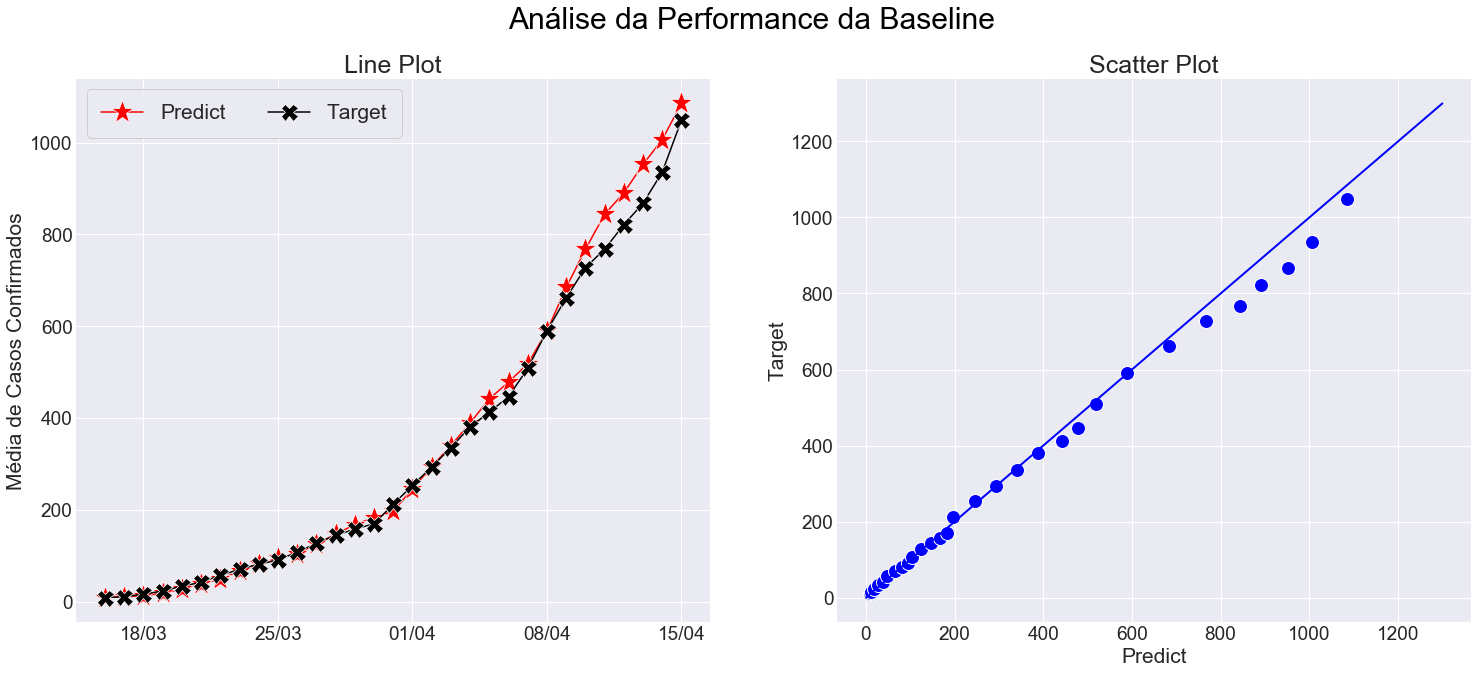

In [85]:
fig , ax = plt.subplots(ncols=2,nrows=1,figsize=(25,10))
fig.suptitle("Análise da Performance da Baseline",fontsize=30,y=0.98,color="black")

#Definindo tamanho das fontes
sizelabel , sizetick , sizetit = 21 , 19 , 25

#Personalizando o formato da data mostrada nos ticks
dateview=[pd.to_datetime(an_base.date)[x].strftime("%d/%m") for x in range(0,len(an_base.date))]

sns.set_style("darkgrid")
sns.lineplot(x=an_base.date,y=an_base.predict_BASE,color="red",marker='*',markersize=24,ax=ax[0],linestyle=':',label='Predict')
sns.lineplot(x=an_base.date,y=an_base.target,color="black",marker='X',markersize=17,ax=ax[0],label='Target')
ax[0].set_ylabel('Média de Casos Confirmados',fontsize=sizelabel)
ax[0].set_title('Line Plot',fontsize=sizetit)
ax[0].set_xlabel('',fontsize=sizelabel)
ax[0].tick_params(axis='x',labelsize=sizetick)
ax[0].tick_params(axis='y',labelsize=sizetick)
ax[0].set_xticks(an_base.date[::-7])
ax[0].set_xticklabels(dateview[::-7])
ax[0].legend(ncol=2,fontsize=21,loc="upper left",frameon=True,framealpha=0.90,borderpad = 0.7)

ax[1].plot(an_base.predict_BASE,an_base.target,color="blue",marker='o',linestyle='none',markersize=14, markeredgecolor="white", markeredgewidth=1) #line_kws={"color":"black","alpha":0.7,"lw":3}
plt.plot([0, 1300], [0, 1300], color="blue", lw=2, linestyle='solid', label="_not in legend")
ax[1].set_ylabel('Target',fontsize=sizelabel)
ax[1].set_title('Scatter Plot',fontsize=sizetit)
ax[1].set_xlabel('Predict',fontsize=sizelabel)
ax[1].tick_params(axis='x',labelsize=sizetick)
ax[1].tick_params(axis='y',labelsize=sizetick)

plt.show()

## Análise das Métricas
## MAPE

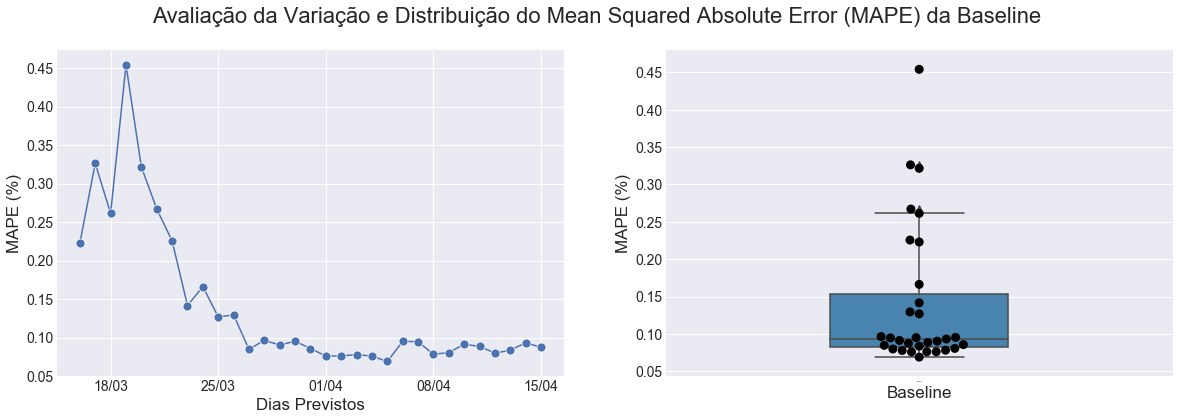

In [86]:
fig , ax = plt.subplots(figsize=(20,6),nrows=1,ncols=2)

sns.set_style("darkgrid")
fig.suptitle("Avaliação da Variação e Distribuição do Mean Squared Absolute Error (MAPE) da Baseline",fontsize=22)

#Gráfico de Linhas
sns.lineplot(x=an_base.date,y=an_base.MAPE_BASE,palette=["blue"],marker='o',linestyle='-',markersize=9,ax=ax[0],legend=False)
ax[0].set_ylabel("MAPE (%)",size=17)
ax[0].set_xlabel("Dias Previstos",size=17)
ax[0].tick_params(axis='x',labelsize=14)
ax[0].tick_params(axis='y',labelsize=14)
ax[0].set_xticks(an_base.date[::-7])
ax[0].set_xticklabels(dateview[::-7])

#Boxplot
sns.boxplot(data=er_base, palette="Blues_d",orient="v",width=0.35,ax=ax[1])
sns.swarmplot(data=er_base, palette=["black"],orient="v",color=.20,size=9,ax=ax[1])
ax[1].set_ylabel("MAPE (%)",size=17)
ax[1].set_xlabel("Baseline",size=17)
ax[1].tick_params(axis='x',labelsize=0)
ax[1].tick_params(axis='y',labelsize=14)
plt.show()

## RMSLE

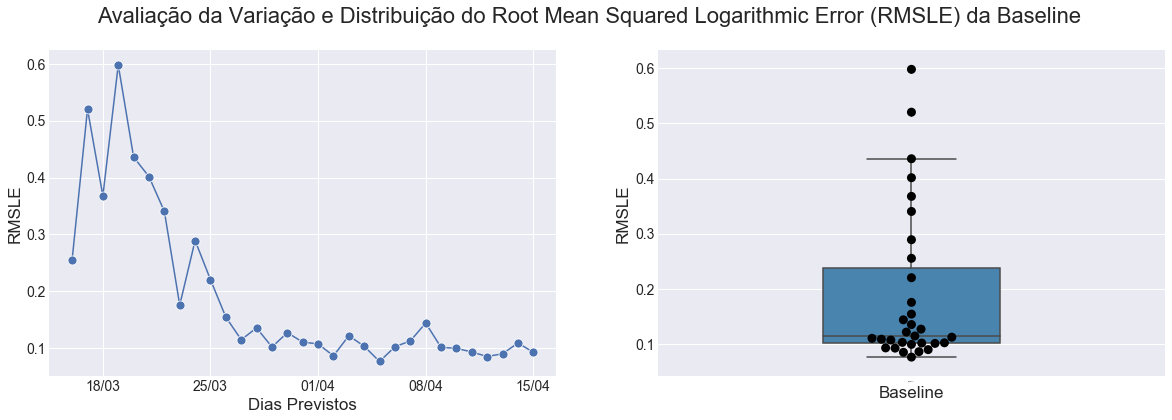

In [87]:
fig , ax = plt.subplots(figsize=(20,6),nrows=1,ncols=2)

sns.set_style("darkgrid")
fig.suptitle("Avaliação da Variação e Distribuição do Root Mean Squared Logarithmic Error (RMSLE) da Baseline",fontsize=22)

#Gráfico de Linhas
sns.lineplot(x=an_base.date,y=an_base.RMSLE_BASE,palette=["blue"],marker='o',linestyle='-',markersize=9,ax=ax[0],legend=False)
ax[0].set_ylabel("RMSLE",size=17)
ax[0].set_xlabel("Dias Previstos",size=17)
ax[0].tick_params(axis='x',labelsize=14)
ax[0].tick_params(axis='y',labelsize=14)
ax[0].set_xticks(an_base.date[::-7])
ax[0].set_xticklabels(dateview[::-7])

#Boxplot
sns.boxplot(data=er2_base, palette="Blues_d",orient="v",width=0.35,ax=ax[1])
sns.swarmplot(data=er2_base, palette=["black"],orient="v",color=.20,size=9,ax=ax[1])
ax[1].set_ylabel("RMSLE",size=17)
ax[1].set_xlabel("Baseline",size=17)
ax[1].tick_params(axis='x',labelsize=0)
ax[1].tick_params(axis='y',labelsize=14)
plt.show()

## RSLE e MAPE por Estado

In [88]:
pd.concat([m2_base,m_base],axis=1).sort_values(by='BASE_RSLE',ascending=True).style.background_gradient(cmap='hot_r',vmin=0,vmax=.5)

## Com base nessas análises, podemos concluir que a baseline atingiu um bom aproveitamento com uma dinâmica simples, onde prevemos o total de casos do dia seguinte como o número de casos do dia anterior com um acréscimo de 16%. Logo, resta a dúvida se modelos de Machine Learning conseguirão superar esse tipo de baseline.

## Outra conclusão que obtemos é a seguinte. Com base no número de casos confirmados por dia devemos atribuir valores diferentes para a análise das métricas de cada estado, por exemplo se compararmos um erro de 25% na previsão de dois estados, onde um possui um baixo número de casos confirmados por dia (ex.: 20, teremos um erro de +-5) e outro com um alto (ex.: 200, teremos um erro de +-50), a margem de erro será relativamente diferente para os dois. Logo, devemos determinar a métrica objetiva de acordo com o volume médio de casos de cada estado.

## Visualizando a média de casos confirmados por dia nos estados

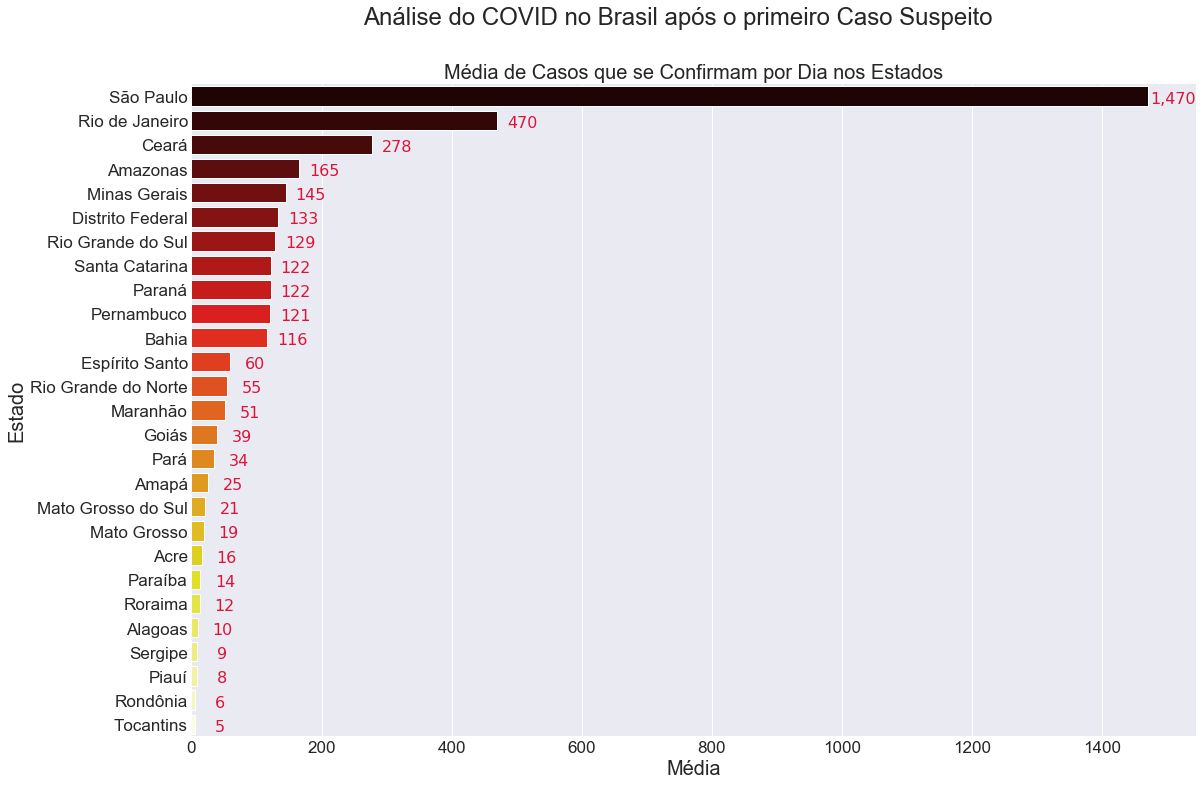

In [90]:
#Selecionando dataframe e criando visualização
mean_cases=pd.DataFrame(date_state.groupby('state').mean().cases).reset_index()
mean_cases.sort_values(by='cases',ascending=False,ignore_index=True,inplace=True)

fig , ax = plt.subplots(figsize=(18,12),nrows=1,ncols=1)

sns.set_style("darkgrid")
fig.suptitle("Análise do COVID no Brasil após o primeiro Caso Suspeito",fontsize=24,y=0.97)
sns.barplot(x=mean_cases.cases,y=mean_cases.state,orient='h',palette="hot") #,label=mean_cases.state
ax.set_ylabel("Estado",size=20)
ax.set_title("Média de Casos que se Confirmam por Dia nos Estados",fontsize=20)
ax.set_xlabel("Média",size=20)
ax.tick_params(axis='x',labelsize=17)
ax.tick_params(axis='y',labelsize=17)
#ax.set(xticks=range(0,210,10))

#Colocando valores no gráfico
for valor in range(0,27):
    label = "{:,.0f}".format(mean_cases.cases[valor])
    ax.annotate(label, (mean_cases.cases[valor],mean_cases.state.index[valor]), textcoords="offset points", xytext=(25,-2), ha='center',va='center',
                size=16, color = 'crimson',alpha=1,style='normal',fontname='Futura')#,family='sans-serif'
    
plt.show()

## Logo devemos atribuir métricas com valores de avaliação diferentes para cada grupo de estados sendo dividos em:
### Grupo 1 : São Paulo (RMSLE < 0.10)
### Grupo 2 : Estados com média maior que 200, com exceção de SP - Rio de Janeiro e Ceará (RMSLE < 0.15)
### Grupo 3 : Estados com média entre 50 e 200 (RMSLE < 0.20)
### Grupo 4 : Estados com média entre 5 e 50 (RMSLE < 0.25)

# 

# MODELAGEM

## Escolher as features adequadas para introdução nos modelos, onde retiraremos variáveis obsoletas (que não serão atualizadas nas previsões no futuro), inadequadas (formatos diferentes) e desnecessárias (variáveis que se substituem de forma semelhante ou até por uma variável melhor)

In [91]:
#Visualizando variáveis finais do dataset
date_state.columns.values

array(['date', 'state', 'cases', 'deaths', 'Latitude', 'Longitude',
       'Densidade', 'area_state', 'Região', 'UF', 'Population_2019',
       'Day', 'new_cases', 'new_deaths', 'Semana_do_Ano', 'Dia_do_Ano',
       'Mes', 'Dia', 'Isolamento', 'Dias_de_Isolamento', 'IIS_BR',
       'IIS_per_Cases', 'count_cities', 'Population_2019_cities',
       'area_cities', 'cases_cities', 'Densidade_cities',
       'Hab_per_Case_cities', 'Case_per_Km2_cities',
       'Hab_per_Cases_per_Km2_cities', 'infec_state_area',
       'infec_state_population', 'cases_font2', 'new_cases_font2',
       'Cases_Last_Day', 'Diff_Cases_Last_Day', 'Cases_Last_Day_1',
       'Diff_Cases_Last_Day_1', 'Cases_Last_Day_2',
       'Diff_Cases_Last_Day_2', 'Cases_por_Population_Last_Day',
       'Cases_por_Densidade_Last_Day', 'Mean_Cases_Last_Days_3',
       'Desvio_Cases_Last_Days_3', 'Mean_Cases_Last_Days_7',
       'Desvio_Cases_Last_Days_7', 'Mean_Diff_Cases_Last_Days_3',
       'Max_Diff_Cases_Last_Days_3', 'Desvio

In [92]:
#Selecionando as features
features = [
       'Densidade', 'area_state', 'Population_2019',
       'Day', 'Semana_do_Ano', 'Dia_do_Ano',
       'Mes', 'Dia', 'Isolamento', 'Dias_de_Isolamento',
       'Cases_Last_Day', 'Diff_Cases_Last_Day', 'Cases_Last_Day_1',
       'Diff_Cases_Last_Day_1', 'Cases_Last_Day_2',
       'Diff_Cases_Last_Day_2', 'Cases_por_Population_Last_Day',
       'Cases_por_Densidade_Last_Day', 'Mean_Cases_Last_Days_3',
       'Desvio_Cases_Last_Days_3', 'Mean_Cases_Last_Days_7',
       'Desvio_Cases_Last_Days_7', 'Mean_Diff_Cases_Last_Days_3',
       'Max_Diff_Cases_Last_Days_3', 'Desvio_Diff_Cases_Last_Days_3',
       'Mean_Diff_Cases_Last_Days_7', 'Max_Diff_Cases_Last_Days_7',
       'Desvio_Diff_Cases_Last_Days_7', 'UF_CAT_AC', 'UF_CAT_AL',
       'UF_CAT_AP', 'UF_CAT_AM', 'UF_CAT_BA', 'UF_CAT_CE', 'UF_CAT_DF',
       'UF_CAT_ES', 'UF_CAT_GO', 'UF_CAT_MA', 'UF_CAT_MT', 'UF_CAT_MS',
       'UF_CAT_MG', 'UF_CAT_PR', 'UF_CAT_PB', 'UF_CAT_PA', 'UF_CAT_PE',
       'UF_CAT_PI', 'UF_CAT_RN', 'UF_CAT_RS', 'UF_CAT_RJ', 'UF_CAT_RO',
       'UF_CAT_RR', 'UF_CAT_SC', 'UF_CAT_SE', 'UF_CAT_SP', 'UF_CAT_TO',
       'REG_CAT_Norte', 'REG_CAT_Nordeste', 'REG_CAT_Centro-Oeste',
       'REG_CAT_Sudeste', 'REG_CAT_Sul', 'DIST_RJ', 'DIST_CE', 'DIST_SP'
            ]

#Quantidade selecionada
len(features)

63

## Inicialmente, começaremos com a análise da eficiência dos seguintes algoritmos sem qualquer mudança de parâmetros e considerando apenas uma variável, o número total de casos do dia anterior.
### Random Forest, k-NN Regressor, Linear Regression, XGB Regressor, Decision Trees (CART), LightGBM e Ridge Regression

In [93]:
#Configurando variáveis
error=[]
error2=[]

#Instânciando modelos
models=[RandomForestRegressor(n_jobs=-1,random_state=0),
        KNeighborsRegressor(n_jobs=-1),
        LinearRegression(n_jobs=-1),
        XGBRegressor(n_jobs=-1,random_state=0),
        DecisionTreeRegressor(random_state=0),
        LGBMRegressor(n_jobs=-1,random_state=0),
        Ridge(random_state=0)]

name_mod=['RF','KNN','LR','XGB','CART','LGBM','RID']

for num in range(0,len(models)):
    
    error=[]
    error2=[]

    for i in range(mn,mx+1):
        if date_state[date_state['Day']==i].shape[0] !=0:

            train=date_state[date_state['Day']<i]
            test=date_state[date_state['Day']==i]

            sel=['Cases_Last_Day']
            X_train=train.loc[:,sel].values
            y_train=train['cases'].values
            X_test=test.loc[:,sel].values
            y_test=test['cases'].values

            model=models[num]
            model.fit(X_train,y_train)

            y_pred=model.predict(X_test)

            e = MAPE(y_pred,y_test)
            error.append(e)
            e2 = RMSLE(y_pred,y_test)
            error2.append(e2)     

    #Imprimir mensagem para cada algorimo mostrando os scores
    msg=print("\n{}\nMédia do Erro MAPE: {:.4f}%\nMédia do Erro RMSLE: {:.4f}".format(name_mod[num],np.mean(error)*100,np.mean(error2)))


RF
Média do Erro MAPE: 18.4837%
Média do Erro RMSLE: 0.2155

KNN
Média do Erro MAPE: 17.9981%
Média do Erro RMSLE: 0.2202

LR
Média do Erro MAPE: 15.1428%
Média do Erro RMSLE: 0.1792

XGB
Média do Erro MAPE: 19.3672%
Média do Erro RMSLE: 0.2219

CART
Média do Erro MAPE: 19.3314%
Média do Erro RMSLE: 0.2232

LGBM
Média do Erro MAPE: 34.6236%
Média do Erro RMSLE: 0.3943

RID
Média do Erro MAPE: 15.1425%
Média do Erro RMSLE: 0.1792


## Logo, sem qualquer tipo de tunning (modificação nos parâmetros), os melhores algoritmos pelo critério de RMSLE foram o Ridge e a Linear Regression, respectivamente, conseguindo superar a baseline que possui RMSLE de 0.1893. O XGBoost Regressor, a Decision Trees (CART), o k-NN Regressor e a Random Forest também apresentaram bons resultados iniciais, e por uma diferença de aproximadamente 3 centésimos ficaram atrás da baseline. Já o LightGBM  apresentou um resultado muito ruim, apresentando mais que o dobro do score alcançado pela Baseline.
## Porém, vale ressaltar que ajustes nos hiperparâmetros e adição de boas features podem e devem melhorar os resultados dos algoritmos, a questão é se essa melhora será significativa a ponto de conseguirem bater a baseline. Deste modo, em seguida irei tunar os hiperparâmetros de alguns algoritmos conhecidos de forma intuitiva/manual para tentar aumentar a performance dos modelos. Posteriormente, utilizarei os métodos da Random Search e do Bayesian Optimize para realizar esse tunning de forma automática e bem mais eficiente, uma vez que buscam minimizar o erro definido de forma direta.

# 

## Realizando o tunning de forma manual

In [94]:
#Configurando variáveis
error=[]
error2=[]

models=[RandomForestRegressor(n_jobs=-1,random_state=0,n_estimators=125),
        KNeighborsRegressor(n_jobs=-1,n_neighbors=3),
        LinearRegression(n_jobs=-1),
        XGBRegressor(n_jobs=-1,random_state=0,n_estimators=75),
        DecisionTreeRegressor(random_state=0),
        LGBMRegressor(n_jobs=-1,random_state=0,n_estimators=250,learning_rate=0.01),
        Ridge(random_state=0,alpha=0.015,normalize=True,fit_intercept=True)]

name_mod=['RF','KNN','LR','XGB','CART','LGBM','RID']

#Definindo os modelos a serem treinados com o tunning

for num in range(0,len(models)):

    error=[]
    error2=[]
    
    for i in range(mn,mx+1):
        if date_state[date_state['Day']==i].shape[0] !=0:

            train=date_state[date_state['Day']<i]
            test=date_state[date_state['Day']==i]

            sel=['Cases_Last_Day']
            X_train=train.loc[:,sel].values
            y_train=train['cases'].values
            X_test=test.loc[:,sel].values
            y_test=test['cases'].values

            model=models[num]
            model.fit(X_train,y_train)

            y_pred=model.predict(X_test)

            e = MAPE(y_pred,y_test)
            error.append(e)
            e2 = RMSLE(y_pred,y_test)
            error2.append(e2)       

    #Imprimir mensagem para cada algorimo mostrando os scores
    msg=print("\n{}\nMédia do Erro MAPE: {:.4f}%\nMédia do Erro RMSLE: {:.4f}".format(name_mod[num],np.mean(error)*100,np.mean(error2)))


RF
Média do Erro MAPE: 18.4805%
Média do Erro RMSLE: 0.2154

KNN
Média do Erro MAPE: 18.0480%
Média do Erro RMSLE: 0.2193

LR
Média do Erro MAPE: 15.1428%
Média do Erro RMSLE: 0.1792

XGB
Média do Erro MAPE: 19.2752%
Média do Erro RMSLE: 0.2207

CART
Média do Erro MAPE: 19.3314%
Média do Erro RMSLE: 0.2232

LGBM
Média do Erro MAPE: 32.7940%
Média do Erro RMSLE: 0.3910

RID
Média do Erro MAPE: 14.9047%
Média do Erro RMSLE: 0.1790


## Com esses breves ajustes baseados no conhecimento de cada algoritmo e seus parâmetros, podemos perceber algumas pequenas melhoras nos scores do k-NN, LGBM e XGB, os demais não obtiveram melhoras significativas. Desta forma, com um tunning realizado de forma mais eficaz pode ser que ocorra um aumento nas métricas de forma que conseguigam se aproximar da baseline.

# 

## Tunar hiperparâmetros dos modelos utilizando dois métodos do scikit-optimize

## Grid Search x Random Search x Bayesian Optimization (minimizar a loss function)

### GS - Faz uma busca exaustiva, dando importância igual para os mesmos parâmetros, gastando mais tempo e recurso computacional.
### RS - Faz uma busca aleatória, explorando melhor os espaços.
### BO - Monta um dataset com os parâmetros e o respectivo score, com finalidade de prever o score, e o método utilizará esse modelo para guiar a busca que minimizará a loss function e consequentemente obtendo um melhor score, explorando com mais efetividade os espaços.

## LightGBM
## Random Search

In [121]:
#?LGBMRegressor

In [95]:
#Definindo função para treino

def train_lgbm(params):
    #Regularizadores para que não ocorra memorização dos dados, o temido overfitting
    learning_rate = params[0] #contribuição de cada árvore no modelo
    num_leaves = params[1] #núm. max. de folhas em cada árvore (nós) #quanto mais, maior a complexidade do modelo
    min_child_samples = params[2] #núm. de exemplos em cada nó nas árvores do modelo (regular o número de amostras para se obter uma estimativa confiável)
    subsample = params[3] #cria uma amostra para cada árvore em vez de utilizar todos os dados
    colsample_bytree = params[4] #limita cada árvore com um número limitado de features
    
    model = LGBMRegressor(learning_rate=learning_rate,num_leaves=num_leaves,min_child_samples=min_child_samples,
                          subsample=subsample,colsample_bytree=colsample_bytree,random_state=0,subsample_freq=1,n_estimators=100,n_jobs=-1)

    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    return RMSLE(y_pred,y_test)

#Específicar o intervalo de otimização de cada hiperparâmetro
space = [(1e-3,1e-1,'log-uniform'), #learning rate objetivo em explorar valores baixos
        (2,128), #num_leaves
        (1,100), #min_child_samples
        (0.05,1.0), #subsamples
        (0.1,1.0)] #colsample bytree

In [97]:
#Definindo intervalo de treino e validação
mn,  mx = 77 , 77

In [98]:
for i in range(mn,mx+1):
    if date_state[date_state['Day']==i].shape[0] !=0:

        train=date_state[date_state['Day']<i]
        test=date_state[date_state['Day']==i]

        sel=features #['Cases_Last_Day']
        X_train=train.loc[:,sel]
        y_train=train['cases'].values
        X_test=test.loc[:,sel].values
        y_test=test['cases'].values
            
        rs_hip_lgbm = dummy_minimize(train_lgbm,space,random_state=0,verbose=0,n_calls=50)
        print(rs_hip_lgbm.x)
        print(rs_hip_lgbm.fun)

[0.025572734343076983, 34, 12, 0.9235084830574399, 0.7428171695942003]
0.1715241007993688


## Bayesian Optimization

In [99]:

    
for i in range(mn,mx+1):
    if date_state[date_state['Day']==i].shape[0] !=0:

        train=date_state[date_state['Day']<i]
        test=date_state[date_state['Day']==i]

        sel=features #['Cases_Last_Day']
        X_train=train.loc[:,sel]
        y_train=train['cases'].values
        X_test=test.loc[:,sel].values
        y_test=test['cases'].values
            
        bo_hip_lgbm = gp_minimize(train_lgbm,space,random_state=0,verbose=0,n_calls=50,n_random_starts=10)
        #random starts seleciona 10 pontos iniciais aleatoriamente para iniciar a busca, em seguida com a criação do modelo com os parâmetros e scores ele seleciona sempre o ponto mais promissor
        #desta forma, ele concede mais importância aos parâmetros relevantes
        
        print(bo_hip_lgbm.x)
        print(bo_hip_lgbm.fun)

[0.1, 83, 1, 0.5145976365331946, 0.7911916376676605]
0.07102217798667486


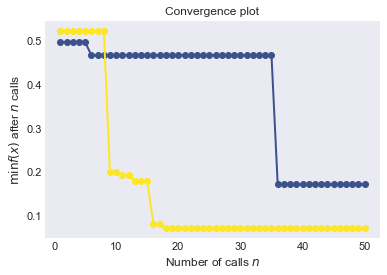

In [100]:
#Resultado gráfico do procedimento de otimização dos dois métodos
plot_convergence(rs_hip_lgbm,bo_hip_lgbm)

## Podemos perceber um resultado altamente significativo no tunning dos hiperparâmetros do LightGBM, principalmente com o Bayesian Optimize, produzindo uma melhora no RMSLE.

## Random Forest
## Random Search

In [122]:
#?RandomForestRegressor

In [102]:
def train_rf(params):
    n_estimators = params[0] 
    min_samples_leaf = params[1]
    ccp_alpha = params[2]
    
    model = RandomForestRegressor(n_estimators = n_estimators,min_samples_leaf=min_samples_leaf,ccp_alpha=ccp_alpha,random_state=0,n_jobs=-1)

    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    return RMSLE(y_pred,y_test)

space = [(1,100), (1,128), (0.0,2.0)]

In [103]:

    
for i in range(mn,mx+1):
    if date_state[date_state['Day']==i].shape[0] !=0:

        train=date_state[date_state['Day']<i]
        test=date_state[date_state['Day']==i]

        sel=features #['Cases_Last_Day']
        X_train=train.loc[:,sel]
        y_train=train['cases'].values
        X_test=test.loc[:,sel].values
        y_test=test['cases'].values
            
        rs_hip_rf = dummy_minimize(train_rf,space,random_state=0,verbose=0,n_calls=50)
        print(rs_hip_rf.x)
        print(rs_hip_rf.fun)

[60, 3, 1.377322365611541]
0.08960662399343013


## Bayesian Optimization

In [104]:
for i in range(mn,mx+1):
    if date_state[date_state['Day']==i].shape[0] !=0:

        train=date_state[date_state['Day']<i]
        test=date_state[date_state['Day']==i]

        sel=features #['Cases_Last_Day']
        X_train=train.loc[:,sel]
        y_train=train['cases'].values
        X_test=test.loc[:,sel].values
        y_test=test['cases'].values
            
        bo_hip_rf = gp_minimize(train_rf,space,random_state=0,verbose=0,n_calls=50,n_random_starts=10)
        
        print(bo_hip_rf.x)
        print(bo_hip_rf.fun)

[61, 1, 1.9794067470166112]
0.07147617232119813


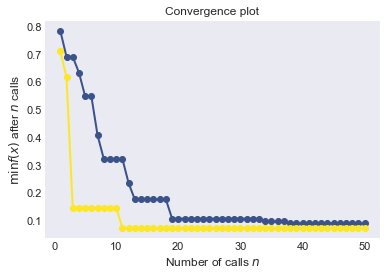

In [105]:
plot_convergence(rs_hip_rf,bo_hip_rf)

## Comparando os resultados dos métodos, concluímos que não há diferença significativa entre os dois, mas o Bayesian Optimize ainda fica na frente.

## k-NN Regressor
## Random Search

In [123]:
#?KNeighborsRegressor

In [107]:
def train_knn(params):
    n_neighbors = params[0] 
    weights = params[1]
    algorithm = params[2]
    leaf_size = params[3]
    p = params[4]
    
    model = KNeighborsRegressor(n_neighbors=n_neighbors,weights=weights,algorithm=algorithm,leaf_size=leaf_size,p=p,n_jobs=-1)

    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    return RMSLE(y_pred,y_test)

space = [(1,50), ['uniform', 'distance'], ['auto', 'ball_tree', 'kd_tree', 'brute'],(1,50),[1,2]]

In [108]:
for i in range(mn,mx+1):
    if date_state[date_state['Day']==i].shape[0] !=0:

        train=date_state[date_state['Day']<i]
        test=date_state[date_state['Day']==i]

        sel=features #['Cases_Last_Day']
        X_train=train.loc[:,sel]
        y_train=train['cases'].values
        X_test=test.loc[:,sel].values
        y_test=test['cases'].values
            
        rs_hip_knn = dummy_minimize(train_knn,space,random_state=0,verbose=0,n_calls=50)
        print(rs_hip_knn.x)
        print(rs_hip_knn.fun)

[1, 'uniform', 'kd_tree', 39, 1]
0.09036058984732133


## Bayesian Optimization

In [109]:
for i in range(mn,mx+1):
    if date_state[date_state['Day']==i].shape[0] !=0:

        train=date_state[date_state['Day']<i]
        test=date_state[date_state['Day']==i]

        sel=features #['Cases_Last_Day']
        X_train=train.loc[:,sel]
        y_train=train['cases'].values
        X_test=test.loc[:,sel].values
        y_test=test['cases'].values
            
        bo_hip_knn = gp_minimize(train_knn,space,random_state=0,verbose=0,n_calls=50,n_random_starts=10)
        
        print(bo_hip_knn.x)
        print(bo_hip_knn.fun)

[1, 'distance', 'brute', 1, 1]
0.09036058984732129


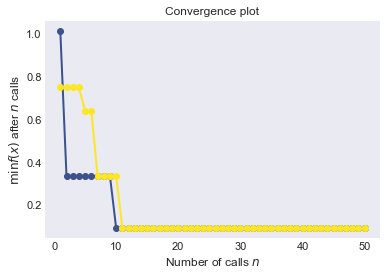

In [110]:
plot_convergence(rs_hip_knn,bo_hip_knn)

## Pelos resultados obtidos, é possível perceber que não há diferença na performance do algoritmo com o tunning desses parâmetros.

## CART
## Random Search

In [124]:
#?DecisionTreeRegressor

In [112]:
def train_cart(params):
    min_samples_leaf = params[0] 
    ccp_alpha = params[1]
    splitter = params[2]
    criterion = params[3]
    max_features = params[4]
    min_samples_split = params[5]
    
    model = DecisionTreeRegressor(random_state=0,min_samples_leaf = min_samples_leaf,
                        ccp_alpha = ccp_alpha,splitter = splitter,criterion = criterion,min_samples_split=min_samples_split)
                         
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    return RMSLE(y_pred,y_test)

space = [(1,256),(0.0,1.0), ["best", "random"],["mse", "friedman_mse"],["auto", "sqrt", "log2"],(2,128)]

In [113]:
for i in range(mn,mx+1):
    if date_state[date_state['Day']==i].shape[0] !=0:

        train=date_state[date_state['Day']<i]
        test=date_state[date_state['Day']==i]

        sel=features #['Cases_Last_Day']
        X_train=train.loc[:,sel]
        y_train=train['cases'].values
        X_test=test.loc[:,sel].values
        y_test=test['cases'].values
            
        rs_hip_cart = dummy_minimize(train_cart,space,random_state=0,verbose=0,n_calls=50)
        print(rs_hip_cart.x)
        print(rs_hip_cart.fun)

[3, 0.2700079731921649, 'random', 'friedman_mse', 'auto', 21]
0.18774840356995282


## Bayesian Optimization

In [114]:
for i in range(mn,mx+1):
    if date_state[date_state['Day']==i].shape[0] !=0:

        train=date_state[date_state['Day']<i]
        test=date_state[date_state['Day']==i]

        sel=features #['Cases_Last_Day']
        X_train=train.loc[:,sel]
        y_train=train['cases'].values
        X_test=test.loc[:,sel].values
        y_test=test['cases'].values
            
        bo_hip_cart = gp_minimize(train_cart,space,random_state=0,verbose=0,n_calls=50,n_random_starts=10)
        
        print(bo_hip_cart.x)
        print(bo_hip_cart.fun)

[1, 0.0, 'random', 'friedman_mse', 'auto', 2]
0.07982644110956481


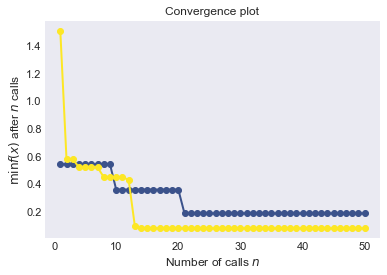

In [115]:
plot_convergence(rs_hip_cart,bo_hip_cart)

## Com base nos resultados obtidos, é possível perceber que não há diferença na performance do algoritmo com o tunning desses parâmetros.

## Ridge Regression
## Random Search

In [125]:
#?Ridge

In [117]:
def train_rid(params):
    #normalize = params[0] 
    #fit_intercept = params[1]
    alpha = params[0]
    #solver = params[3]
    #max_iter = params[4]
    
    model = Ridge(alpha=alpha,normalize=True,fit_intercept=True) #normalize=normalize,fit_intercept=fit_intercept,alpha=alpha,solver=solver,max_iter=max_iter)

    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    return RMSLE(y_pred,y_test)

#space = [['True', 'False'],['True', 'False'],(0.0,5),['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],(500,1000)]
space = [(0.00,0.1)]

In [118]:

     
for i in range(mn,mx+1):
    if date_state[date_state['Day']==i].shape[0] !=0:

        train=date_state[date_state['Day']<i]
        test=date_state[date_state['Day']==i]

        sel=features #['Cases_Last_Day']
        X_train=train.loc[:,sel]
        y_train=train['cases'].values
        X_test=test.loc[:,sel].values
        y_test=test['cases'].values
            
        rs_hip_rid = dummy_minimize(train_rid,space,random_state=0,verbose=0,n_calls=50)
        print(rs_hip_rid.x)
        print(rs_hip_rid.fun)

[0.005671297731744319]
0.06964967651361445


## Bayesian Optimization

In [119]:
for i in range(mn,mx+1):
    if date_state[date_state['Day']==i].shape[0] !=0:

        train=date_state[date_state['Day']<i]
        test=date_state[date_state['Day']==i]

        sel=features#['Cases_Last_Day']
        X_train=train.loc[:,sel]
        y_train=train['cases'].values
        X_test=test.loc[:,sel].values
        y_test=test['cases'].values
            
        bo_hip_rid = gp_minimize(train_rid,space,random_state=0,verbose=0,n_calls=50,n_random_starts=10)
        
        print(bo_hip_rid.x)
        print(bo_hip_rid.fun)

[0.00567129773174432]
0.06964967651361445


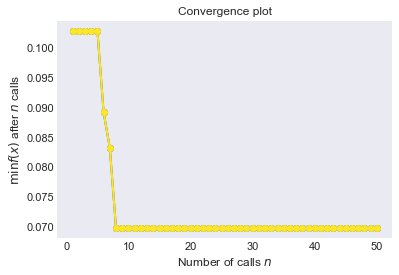

In [120]:
plot_convergence(rs_hip_rid,bo_hip_rid)

## O parâmetro que está tendo valor significativo para a otimização do algoritmo é o alpha, os demais não influenciam na minimização do erro. Porém, os dois métodos obtém resultados praticamente iguais.

# 

## Resultado do treinos com os tunnings

In [97]:
mn, mx = 47, 77

In [98]:
models=[RandomForestRegressor(n_jobs=-1,random_state=0,n_estimators=61,min_samples_leaf=1,ccp_alpha=1.9794067470166112),
        KNeighborsRegressor(n_neighbors=1,weights='distance',algorithm='brute',leaf_size=1,p=1),
        LinearRegression(n_jobs=-1),
        XGBRegressor(n_jobs=-1,random_state=0),
        DecisionTreeRegressor(min_samples_leaf=1,ccp_alpha=0,splitter='random',criterion='friedman_mse',max_features='auto',min_samples_split=2,random_state=0),
        LGBMRegressor(n_jobs=-1,random_state=0,n_estimators=100,learning_rate=0.1,num_leaves = 83,min_child_samples = 1,subsample = 0.5145976365331946,
                      colsample_bytree = 0.7911916376676605),
        Ridge(random_state=0,alpha=0.00567129773174432)]

name_mod=['RF','KNN','LR','XGB','CART','LGBM','RID']

for num in range(0,len(models)):
    
    error=[]
    error2=[]
    
    for i in range(mn,mx+1):
        if date_state[date_state['Day']==i].shape[0] !=0:

            train=date_state[date_state['Day']<i]
            test=date_state[date_state['Day']==i]

            sel=['Cases_Last_Day']
            X_train=train.loc[:,sel].values
            y_train=train['cases'].values
            X_test=test.loc[:,sel].values
            y_test=test['cases'].values

            model=models[num]
            model.fit(X_train,y_train)

            y_pred=model.predict(X_test)

            e = MAPE(y_pred,y_test)
            error.append(e)
            e2 = RMSLE(y_pred,y_test)
            error2.append(e2)

    #Imprimir mensagem para cada algorimo mostrando os scores
    msg=print("\n{}\nMédia do Erro MAPE: {:.4f}%\nMédia do Erro RMSLE: {:.4f}".format(name_mod[num],np.mean(error)*100,np.mean(error2)))


RF
Média do Erro MAPE: 24.1050%
Média do Erro RMSLE: 0.3203

KNN
Média do Erro MAPE: 19.3029%
Média do Erro RMSLE: 0.2474

LR
Média do Erro MAPE: 15.1428%
Média do Erro RMSLE: 0.1792

XGB
Média do Erro MAPE: 19.3672%
Média do Erro RMSLE: 0.2219

CART
Média do Erro MAPE: 19.5655%
Média do Erro RMSLE: 0.2244

LGBM
Média do Erro MAPE: 18.8351%
Média do Erro RMSLE: 0.2196

RID
Média do Erro MAPE: 15.1428%
Média do Erro RMSLE: 0.1792


## Percebemos apenas uma melhora significativa no algoritmo do LGBM, ultrapassando o score atingido por vários modelos, porém ainda sem superar a Baseline. Os algoritmos restantes não obtiveram nada de acréscimo, pelo contrário, alguns scores até pioraram. Contudo, há alguns motivos para essa situação como: os algoritmos podem estarem em seus limites de otimização ou os hiperparâmetros não foram explorados da forma correta ou o uso dos métodos de otimização não foram adequados.

## Portanto, com todas essas etapas de otimização os únicos algoritmos que superaram a baseline foram os modelos Ridge Regressor e a Linear Regression. Outro desataque é o LightGBM, que obteve uma melhora considerável na otimização dos parâmetros, sem contar que ele juntamente com os outros algoritmos podem conseguir melhoras substanciais com a adição de novas variáveis significativas ao modelo.
## Deste modo, treinaremos o modelo novamente com os melhores hiperparâmetros obtidos, onde o único que vamos alterar do ajuste manual para o automático é o LGBM. Em sequência, analisaremos a performance desses modelos durante o treino e validação e posteriormente realizaremos o feature selection para os modelos.

In [99]:
models=[RandomForestRegressor(n_jobs=-1,random_state=0,n_estimators=125),
        KNeighborsRegressor(n_jobs=-1,n_neighbors=3),
        LinearRegression(n_jobs=-1),
        XGBRegressor(n_jobs=-1,random_state=0,n_estimators=75),
        DecisionTreeRegressor(random_state=0),
        LGBMRegressor(n_jobs=-1,random_state=0,n_estimators=100,learning_rate=0.1,num_leaves = 83,min_child_samples = 1,subsample = 0.5145976365331946,
                      colsample_bytree = 0.7911916376676605),
        Ridge(random_state=0,alpha=0.015,normalize=True,fit_intercept=True)]


name_mod=['RF','KNN','LR','XGB','CART','LGBM','RID']

#Definindo os modelos a serem treinados com o tunning
#...

#Criando dataframe para análise da performance do modelo
analytics=pd.DataFrame(columns=['date','Day','target','predict','MAPE','RMSE','RMSLE'])

for num in range(0,len(models)):
    
    error=[]
    error2=[]
    analytics=pd.DataFrame(columns=['date','Day','target','predict_{}'.format(name_mod[num]),'MAPE_{}'.format(name_mod[num]),'RMSE_{}'.format(name_mod[num]),'RMSLE_{}'.format(name_mod[num])])
    
    for i in range(mn,mx+1):
        if date_state[date_state['Day']==i].shape[0] !=0:

            train=date_state[date_state['Day']<i]
            test=date_state[date_state['Day']==i]

            sel=['Cases_Last_Day']
            X_train=train.loc[:,sel].values
            y_train=train['cases'].values
            X_test=test.loc[:,sel].values
            y_test=test['cases'].values

            model=models[num]
            model.fit(X_train,y_train)

            y_pred=model.predict(X_test)

            y_state=test['state'].values
            aux=MAPE_STATE(y_pred,y_test,y_state)
            aux=aux.set_index(aux.state).drop(columns='state')
            if(i==mn):
                m=aux
            else:
                m=m.merge(aux,how='outer',on='state')
                
            aux2=RSLE_STATE(y_pred,y_test,y_state)
            aux2=aux2.set_index(aux2.state).drop(columns='state')
            if(i==mn):
                m2=aux2
            else:
                m2=m2.merge(aux2,how='outer',on='state')                 
            
            e = MAPE(y_pred,y_test)
            error.append(e)
            e2 = RMSLE(y_pred,y_test)
            error2.append(e2)              

            #Guardando predicts, targets e outras informações para análise do desempenho do modelo
            att=pd.DataFrame({'date':test.date.max(),'Day':test.Day.max(),'target':y_test.mean(),'predict_{}'.format(name_mod[num]):y_pred.mean(),
                              'MAPE_{}'.format(name_mod[num]):MAPE(y_pred,y_test),'RMSLE_{}'.format(name_mod[num]):RMSLE(y_pred,y_test),'RMSE_{}'.format(name_mod[num]):RMSE(y_pred,y_test)},index=[0])

            #Atualizando dataframe de análise
            analytics=pd.concat([analytics,att]).reset_index(drop=True,level=0)        

    #Imprimir mensagem para cada algorimo mostrando os scores
    msg=print("\n{}\nMédia do Erro MAPE: {:.4f}%\nMédia do Erro RMSLE: {:.4f}".format(name_mod[num],np.mean(error)*100,np.mean(error2)))
    
    if name_mod[num] == 'RF':
        er_rf=pd.DataFrame(error,columns=['{}_MAPE'.format(name_mod[num])]); er2_rf=pd.DataFrame(error2,columns=['{}_RMSLE'.format(name_mod[num])]);
        m_rf=pd.DataFrame(m.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_MAPE'.format(name_mod[num])]); ms=pd.concat([ms,m_rf],axis=1);
        m2_rf=pd.DataFrame(m2.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_RSLE'.format(name_mod[num])]); ms2=pd.concat([ms2,m2_rf],axis=1);
        an_rf=analytics; ANALYTICS=ANALYTICS.merge(an_rf.iloc[:,[1,3,4,5,6]],how='left',on='Day'); msg;
    elif name_mod[num] == 'KNN':
        er_knn=pd.DataFrame(error,columns=['{}_MAPE'.format(name_mod[num])]); er2_knn=pd.DataFrame(error2,columns=['{}_RMSLE'.format(name_mod[num])]);
        m_knn=pd.DataFrame(m.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_MAPE'.format(name_mod[num])]); ms=pd.concat([ms,m_knn],axis=1);
        m2_knn=pd.DataFrame(m2.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_RSLE'.format(name_mod[num])]); ms2=pd.concat([ms2,m2_knn],axis=1);
        an_knn=analytics; ANALYTICS=ANALYTICS.merge(an_knn.iloc[:,[1,3,4,5,6]],how='left',on='Day'); msg;
    elif name_mod[num] == 'LR':
        er_lr=pd.DataFrame(error,columns=['{}_MAPE'.format(name_mod[num])]); er2_lr=pd.DataFrame(error2,columns=['{}_RMSLE'.format(name_mod[num])]);
        m_lr=pd.DataFrame(m.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_MAPE'.format(name_mod[num])]); ms=pd.concat([ms,m_lr],axis=1);
        m2_lr=pd.DataFrame(m2.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_RSLE'.format(name_mod[num])]); ms2=pd.concat([ms2,m2_lr],axis=1);
        an_lr=analytics; ANALYTICS=ANALYTICS.merge(an_lr.iloc[:,[1,3,4,5,6]],how='left',on='Day'); msg;
    elif name_mod[num] == 'XGB':
        er_xgb=pd.DataFrame(error,columns=['{}_MAPE'.format(name_mod[num])]); er2_xgb=pd.DataFrame(error2,columns=['{}_RMSLE'.format(name_mod[num])]);
        m_xgb=pd.DataFrame(m.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_MAPE'.format(name_mod[num])]); ms=pd.concat([ms,m_xgb],axis=1);
        m2_xgb=pd.DataFrame(m2.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_RSLE'.format(name_mod[num])]); ms2=pd.concat([ms2,m2_xgb],axis=1);
        an_xgb=analytics; ANALYTICS=ANALYTICS.merge(an_xgb.iloc[:,[1,3,4,5,6]],how='left',on='Day'); msg;
    elif name_mod[num] == 'CART':
        er_cart=pd.DataFrame(error,columns=['{}_MAPE'.format(name_mod[num])]); er2_cart=pd.DataFrame(error2,columns=['{}_RMSLE'.format(name_mod[num])]);
        m_cart=pd.DataFrame(m.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_MAPE'.format(name_mod[num])]); ms=pd.concat([ms,m_cart],axis=1);
        m2_cart=pd.DataFrame(m2.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_RSLE'.format(name_mod[num])]); ms2=pd.concat([ms2,m2_cart],axis=1);
        an_cart=analytics; ANALYTICS=ANALYTICS.merge(an_cart.iloc[:,[1,3,4,5,6]],how='left',on='Day'); msg;
    elif name_mod[num] == 'LGBM':
        er_lgbm=pd.DataFrame(error,columns=['{}_MAPE'.format(name_mod[num])]); er2_lgbm=pd.DataFrame(error2,columns=['{}_RMSLE'.format(name_mod[num])]);
        m_lgbm=pd.DataFrame(m.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_MAPE'.format(name_mod[num])]); ms=pd.concat([ms,m_lgbm],axis=1);
        m2_lgbm=pd.DataFrame(m2.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_RSLE'.format(name_mod[num])]); ms2=pd.concat([ms2,m2_lgbm],axis=1);
        an_lgbm=analytics; ANALYTICS=ANALYTICS.merge(an_lgbm.iloc[:,[1,3,4,5,6]],how='left',on='Day'); msg;
    elif name_mod[num] == 'RID':
        er_rid=pd.DataFrame(error,columns=['{}_MAPE'.format(name_mod[num])]); er2_rid=pd.DataFrame(error2,columns=['{}_RMSLE'.format(name_mod[num])]);
        m_rid=pd.DataFrame(m.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_MAPE'.format(name_mod[num])]); ms=pd.concat([ms,m_rid],axis=1);
        m2_rid=pd.DataFrame(m2.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_RSLE'.format(name_mod[num])]); ms2=pd.concat([ms2,m2_rid],axis=1);
        an_rid=analytics; ANALYTICS=ANALYTICS.merge(an_rid.iloc[:,[1,3,4,5,6]],how='left',on='Day'); msg;
        
#Detalhe: sempre que for usado o dataframe ANALYTICS para avaliar a performance, a Baseline deve ser treinada novamente, para reiniciar o dataframe.


RF
Média do Erro MAPE: 18.4805%
Média do Erro RMSLE: 0.2154

KNN
Média do Erro MAPE: 18.0480%
Média do Erro RMSLE: 0.2193

LR
Média do Erro MAPE: 15.1428%
Média do Erro RMSLE: 0.1792

XGB
Média do Erro MAPE: 19.2752%
Média do Erro RMSLE: 0.2207

CART
Média do Erro MAPE: 19.3314%
Média do Erro RMSLE: 0.2232

LGBM
Média do Erro MAPE: 18.8351%
Média do Erro RMSLE: 0.2196

RID
Média do Erro MAPE: 14.9047%
Média do Erro RMSLE: 0.1790


## Análise gráfica do treino e validação dos algoritmos

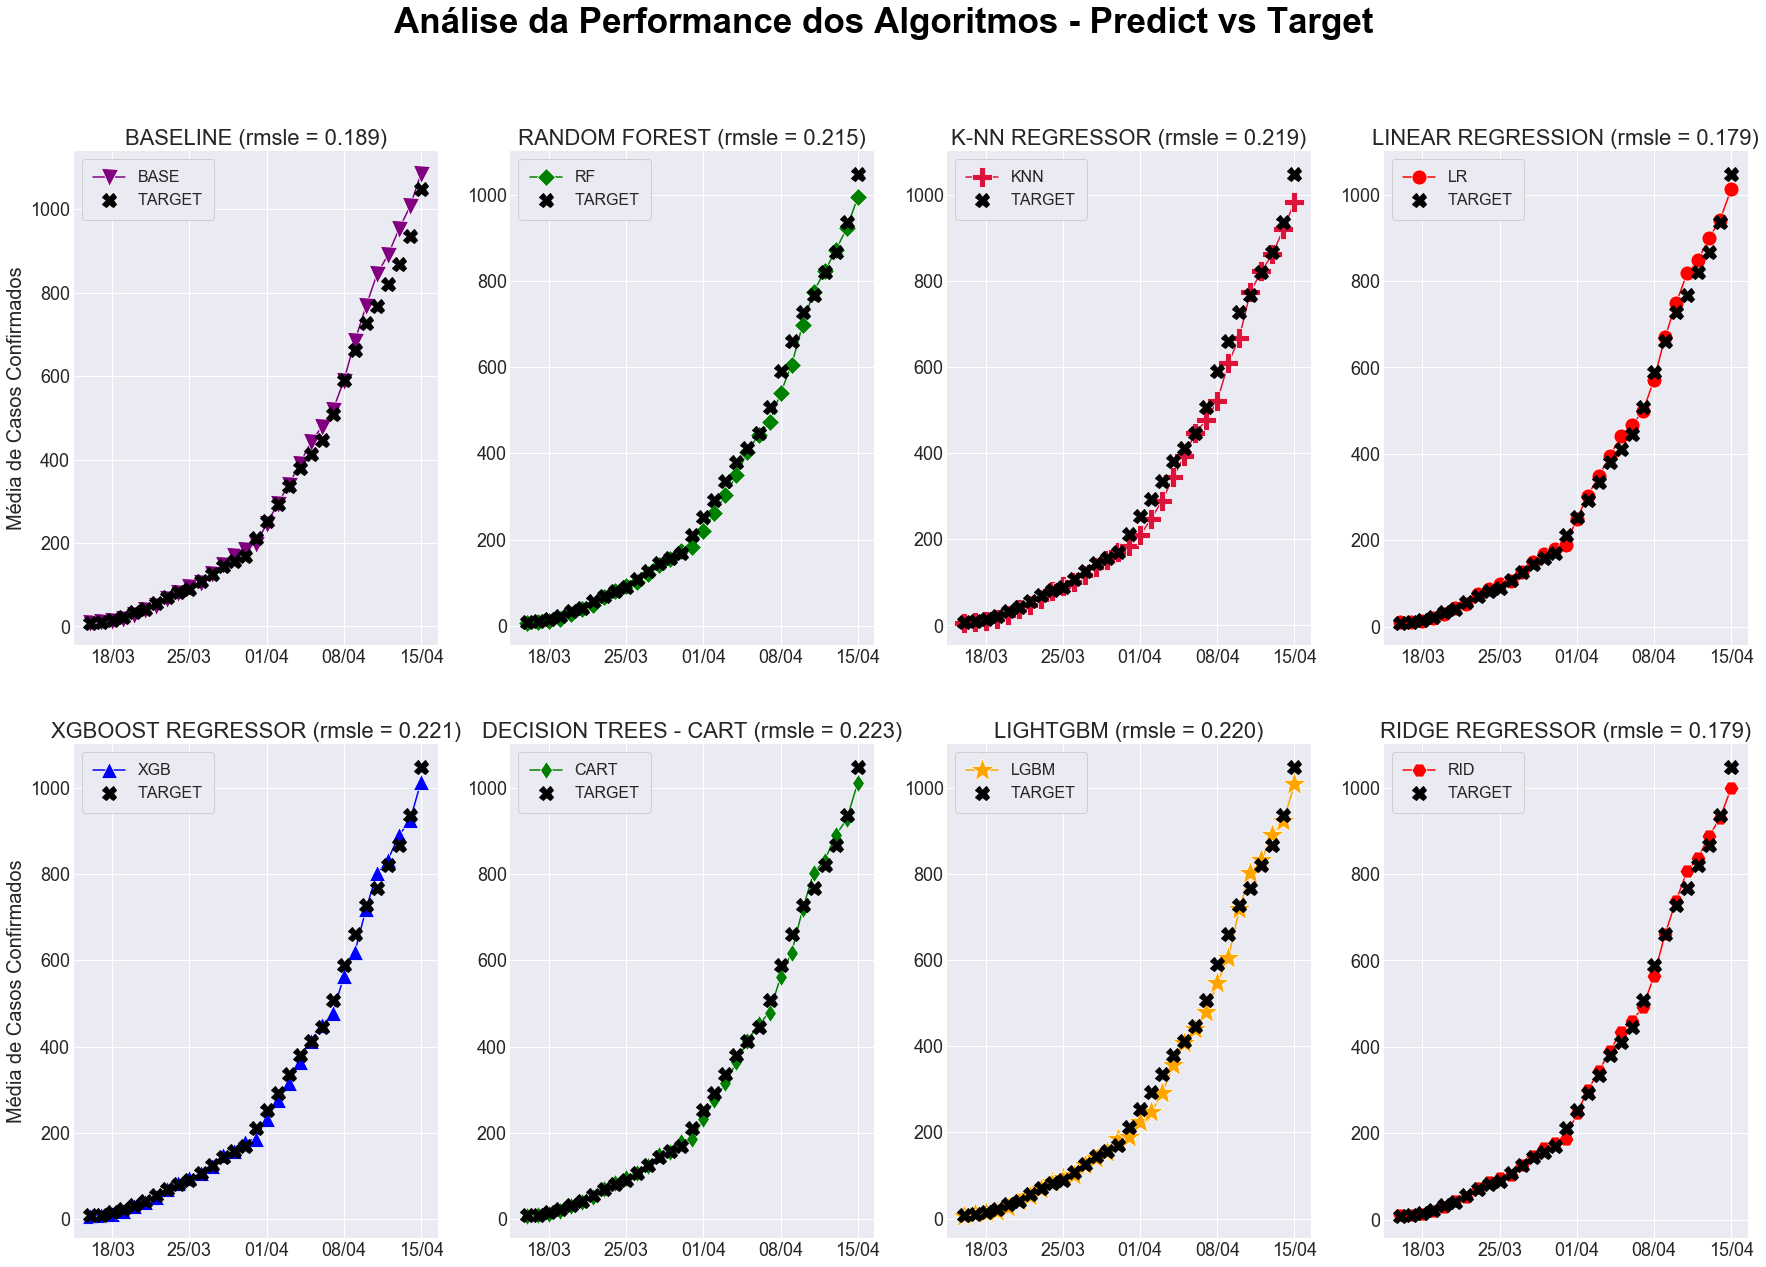

In [102]:
nrows , ncols = 2 , 4
fig , ax = plt.subplots(ncols=ncols,nrows=nrows,figsize=(30,20))
fig.suptitle("Análise da Performance dos Algoritmos - Predict vs Target",fontsize=35,y=0.98,color="black",weight='bold')

#Definindo tamanho das fontes
sizelabel , sizetick , sizetit = 20 , 18 , 22

#Personalizando o formato da data mostrada nos ticks
dateview=[pd.to_datetime(an_lr.date)[x].strftime("%d/%m") for x in range(0,len(an_lr.date))]

sns.set_style("darkgrid")

sns.lineplot(x=an_base.date,y=an_base.predict_BASE,color="purple",marker='v',markersize=17,ax=ax[0,0],label='BASE')
ax[0,0].set_title('BASELINE (rmsle = {:.3f})'.format(np.mean(er2_base).values[0]),fontsize=sizetit)
sns.lineplot(x=an_rf.date,y=an_rf.predict_RF,color="green",marker='D',markersize=13,ax=ax[0,1],label='RF')
ax[0,1].set_title('RANDOM FOREST (rmsle = {:.3f})'.format(np.mean(er2_rf).values[0]),fontsize=sizetit)
sns.lineplot(x=an_knn.date,y=an_knn.predict_KNN,color="crimson",marker='P',markersize=20,ax=ax[0,2],label='KNN')
ax[0,2].set_title('K-NN REGRESSOR (rmsle = {:.3f})'.format(np.mean(er2_knn).values[0]),fontsize=sizetit)
sns.lineplot(x=an_lr.date,y=an_lr.predict_LR,color="red",marker='o',markersize=15,ax=ax[0,3],label='LR')
ax[0,3].set_title('LINEAR REGRESSION (rmsle = {:.3f})'.format(np.mean(er2_lr).values[0]),fontsize=sizetit)

sns.lineplot(x=an_xgb.date,y=an_xgb.predict_XGB,color="blue",marker='^',markersize=16,ax=ax[1,0],label='XGB')
ax[1,0].set_title('XGBOOST REGRESSOR (rmsle = {:.3f})'.format(np.mean(er2_xgb).values[0]),fontsize=sizetit)
sns.lineplot(x=an_cart.date,y=an_cart.predict_CART,color="green",marker='d',markersize=13,ax=ax[1,1],label='CART')
ax[1,1].set_title('DECISION TREES - CART (rmsle = {:.3f})'.format(np.mean(er2_cart).values[0]),fontsize=sizetit)
sns.lineplot(x=an_lgbm.date,y=an_lgbm.predict_LGBM,color="orange",marker='*',markersize=25,ax=ax[1,2],label='LGBM')
ax[1,2].set_title('LIGHTGBM (rmsle = {:.3f})'.format(np.mean(er2_lgbm).values[0]),fontsize=sizetit)
sns.lineplot(x=an_rid.date,y=an_rid.predict_RID,color="red",marker='H',markersize=15,ax=ax[1,3],label='RID')
ax[1,3].set_title('RIDGE REGRESSOR (rmsle = {:.3f})'.format(np.mean(er2_rid).values[0]),fontsize=sizetit)

for i in range(0,nrows):
    for j in range(0,ncols):
        ax[i,j].plot(an_lr.date,an_lr.target,color="black",marker='X',label='TARGET',alpha=1,linestyle='none',markersize=14)
        ax[i,j].set_ylabel('Média de Casos Confirmados',fontsize=sizelabel) if((i==0 and j==0) or (j==0 and i==1)) else ax[i,j].set_ylabel('',fontsize=sizelabel)
        ax[i,j].set_xlabel('',fontsize=sizelabel)
        ax[i,j].tick_params(axis='x',labelsize=sizetick,rotation=0)
        ax[i,j].tick_params(axis='y',labelsize=sizetick)
        ax[i,j].set_xticks(an_lr.date[::-7])
        ax[i,j].set_xticklabels(dateview[::-7])
        ax[i,j].legend(ncol=1,fontsize=16,loc="upper left",frameon=True,framealpha=0.90,borderpad = 0.7)

plt.show()

## É evidente que os algoritmos com mais performance é o Ridge Regressor e a Linear Regression, com leve destaque para o Ridge que é uma "evolução" da Linear Regression, onde é incrementado um parâmetro regularizador denominado alpha, em que quanto menor ele é, mais os coeficientes das features insignificativas são penalizadas, aproximando os coeficientes de zero. Logo, um modelo com essa característica será muito últil na fase de seleção de variáveis. Pois, no proceso de feature selection, o modelo irá conceder menos importância a features desnecessárias, diminuindo a magnitude de seus coeficientes.
## Com base nos gráficos concluimos que os demais algoritmos tem dificuldade em ultrapassar ou acompanhar o valor da target em um certo período, porém conseguem melhorar nos últimos dias.
## Entretanto, escolher um algoritmo que possui uma abordagem diferente dos modelos lineares pode ser interessante para análise e consequentemente o forecast. Assim sendo, dentre essas opções com menor RMSLE, temos a Random Forest, o LightGBM, o XGBoost e a Decision Trees (CART). Com destaque para o LightGBM, pois obteve uma melhora sensacional no ajuste dos parâmetros e creio que pode obter melhores resultados com features significativas. Por outro lado, graficamente o modelo deixa a desejar na previsão dos últimos dias, ficando bem atrás da target. Deste modo, podemos optar pelo XGboost que dentre os citados é o que melhor consegue se aproximar da target nesse período.
## Entretanto, a escolha dos demais modelos para análise do problema também é válida, uma vez que um dos objetivos é encontrar as features mais relevantes para previsão de novos casos de COVID19 por estado e consequentemente no Brasil.

## Análise Comparativa das Métricas dos Algoritmos

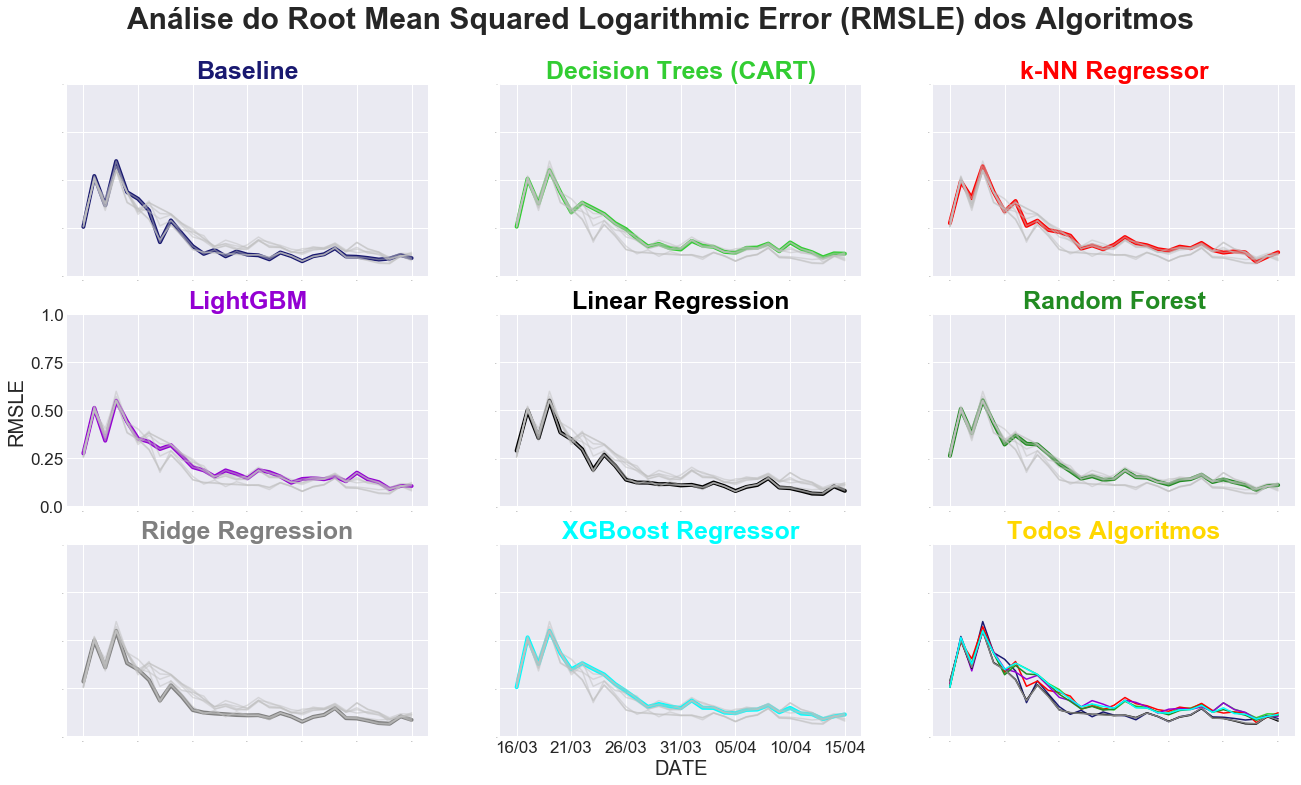

In [103]:
#Definindo subsets para análise
ANL_RMSLE = ANALYTICS.loc[:,['RMSLE_BASE','RMSLE_CART', 'RMSLE_KNN', 'RMSLE_LGBM', 'RMSLE_LR', 'RMSLE_RF','RMSLE_RID', 'RMSLE_XGB']]
ANL_MAPE = ANALYTICS.loc[:,['MAPE_BASE', 'MAPE_CART', 'MAPE_KNN', 'MAPE_LGBM', 'MAPE_LR','MAPE_RF', 'MAPE_RID', 'MAPE_XGB']]

ncols , nrows = 3 , 3
fig , ax = plt.subplots(ncols=ncols, nrows=nrows,figsize=(22,12))
fig.suptitle('Análise do Root Mean Squared Logarithmic Error (RMSLE) dos Algoritmos',fontsize=30,weight='bold',y=0.97)
sns.set_style("whitegrid")

cont=0
names=['Baseline','Decision Trees (CART)','k-NN Regressor','LightGBM','Linear Regression','Random Forest','Ridge Regression','XGBoost Regressor','NULL']
colors=['midnightblue','limegreen','red','darkviolet','black','forestgreen','gray','cyan','gold']
dateview = [ANALYTICS.date[d].strftime("%d/%m") for d in range(0,len(ANALYTICS.date))]

for i in range(0,nrows):
    for j in range(0,ncols):
        if (i==2) and (j==2):
            for num in range(0,8):
                ax[i,j].plot(ANALYTICS.date,ANL_RMSLE.iloc[:,num],color=colors[num])
                ax[i,j].set_title('Todos Algoritmos',fontsize=25,color='gold',weight='bold')
                ax[i,j].set_ylim(0,1)
                ax[i,j].set_ylabel('',fontsize=0)
                ax[i,j].set_yticks([0,0.25,0.5,0.75,1])
                ax[i,j].set_yticklabels(['0.0','0.25','0.50','0.75','1.0'])
                ax[i,j].tick_params(axis='y',labelsize=0)
                ax[i,j].tick_params(axis='x',labelsize=0,rotation=0)
                ax[i,j].set_xticks(ANALYTICS.date[::-5])
                ax[i,j].set_xticklabels(dateview[::-5])
        else:
            ax[i,j].plot(ANALYTICS.date,ANL_RMSLE.iloc[:,cont],color=colors[cont],linewidth=4)
            ax[i,j].set_title(names[cont],fontsize=25,color=colors[cont],weight='bold')
            ax[i,j].set_ylim(0,1)
            ax[i,j].set_ylabel('',fontsize=0)
            ax[i,j].set_yticks([0,0.25,0.5,0.75,1])
            ax[i,j].set_yticklabels(['0.0','0.25','0.50','0.75','1.0'])
            ax[i,j].tick_params(axis='y',labelsize=0)
            ax[i,j].tick_params(axis='x',labelsize=0,rotation=0)
            ax[i,j].set_xticks(ANALYTICS.date[::-5])
            ax[i,j].set_xticklabels(dateview[::-5])
            cont=cont+1
            
            for num in range(0,8):
                ax[i,j].plot(ANALYTICS.date,ANL_RMSLE.iloc[:,num],color='silver',alpha=0.5)
        
        if i==1 and j==0:
            ax[i,j].set_ylabel('RMSLE',fontsize=20)
            
        if i==2 and j==1:
            ax[i,j].set_xlabel('DATE',fontsize=20)
            
        if i==2 and j==1:
            ax[i,j].tick_params(axis='x',labelsize=17,rotation=0)
            
        if j==0 and i==1:
            ax[i,j].tick_params(axis='y',labelsize=17)            

plt.show()

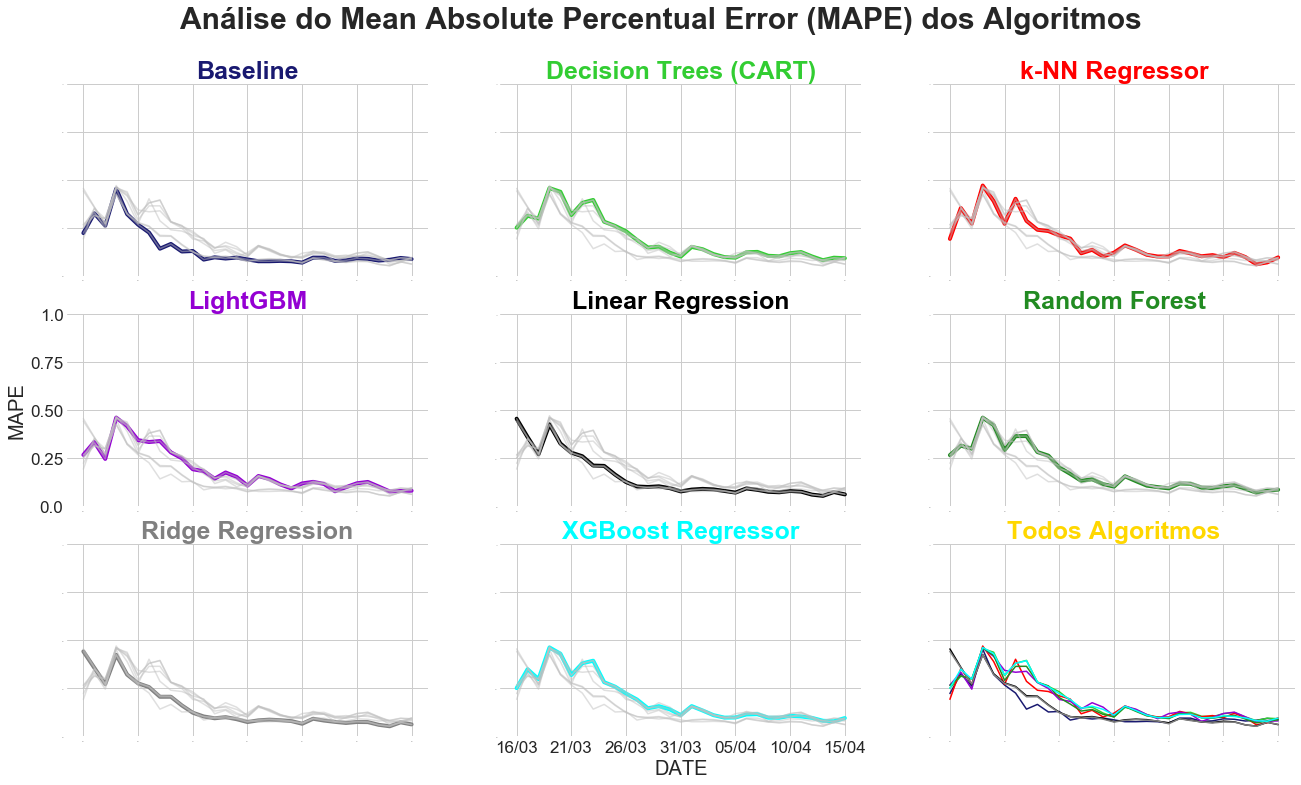

In [104]:
ncols , nrows = 3 , 3
fig , ax = plt.subplots(ncols=ncols, nrows=nrows,figsize=(22,12))
fig.suptitle('Análise do Mean Absolute Percentual Error (MAPE) dos Algoritmos',fontsize=30,weight='bold',y=0.97)
sns.set_style("whitegrid")

cont=0
names=['Baseline','Decision Trees (CART)','k-NN Regressor','LightGBM','Linear Regression','Random Forest','Ridge Regression','XGBoost Regressor','NULL']
colors=['midnightblue','limegreen','red','darkviolet','black','forestgreen','gray','cyan','gold']
dateview = [ANALYTICS.date[d].strftime("%d/%m") for d in range(0,len(ANALYTICS.date))]

for i in range(0,nrows):
    for j in range(0,ncols):
        if (i==2) and (j==2):
            for num in range(0,8):
                ax[i,j].plot(ANALYTICS.date,ANL_MAPE.iloc[:,num],color=colors[num])
                ax[i,j].set_title('Todos Algoritmos',fontsize=25,color='gold',weight='bold')
                ax[i,j].set_ylim(0,1)
                ax[i,j].set_ylabel('',fontsize=0)
                ax[i,j].set_yticks([0,0.25,0.5,0.75,1])
                ax[i,j].set_yticklabels(['0.0','0.25','0.50','0.75','1.0'])
                ax[i,j].tick_params(axis='y',labelsize=0)
                ax[i,j].tick_params(axis='x',labelsize=0,rotation=0)
                ax[i,j].set_xticks(ANALYTICS.date[::-5])
                ax[i,j].set_xticklabels(dateview[::-5])
        else:
            ax[i,j].plot(ANALYTICS.date,ANL_MAPE.iloc[:,cont],color=colors[cont],linewidth=4)
            ax[i,j].set_title(names[cont],fontsize=25,color=colors[cont],weight='bold')
            ax[i,j].set_ylim(0,1)
            ax[i,j].set_ylabel('',fontsize=0)
            ax[i,j].set_yticks([0,0.25,0.5,0.75,1])
            ax[i,j].set_yticklabels(['0.0','0.25','0.50','0.75','1.0'])
            ax[i,j].tick_params(axis='y',labelsize=0)
            ax[i,j].tick_params(axis='x',labelsize=0,rotation=0)
            ax[i,j].set_xticks(ANALYTICS.date[::-5])
            ax[i,j].set_xticklabels(dateview[::-5])
            cont=cont+1
            
            for num in range(0,8):
                ax[i,j].plot(ANALYTICS.date,ANL_MAPE.iloc[:,num],color='silver',alpha=0.5)
        
        if i==1 and j==0:
            ax[i,j].set_ylabel('MAPE',fontsize=20)
            
        if i==2 and j==1:
            ax[i,j].set_xlabel('DATE',fontsize=20)
            
        if i==2 and j==1:
            ax[i,j].tick_params(axis='x',labelsize=17,rotation=0)
            
        if j==0 and i==1:
            ax[i,j].tick_params(axis='y',labelsize=17)            

plt.show()

## Olhando para as duas métricas fica ainda mais evidente a predominância dos modelos lineares de Linear Regression e de Ridge Regressor, principalmente nos últimos dias. Devemos destacar também o desempenho consistente da Baseline. Os demais, obtiveram desempenhos semelhantes e podem ser tratados como um grupo.

## Análise da Distribuição das Métricas dos Algoritmos

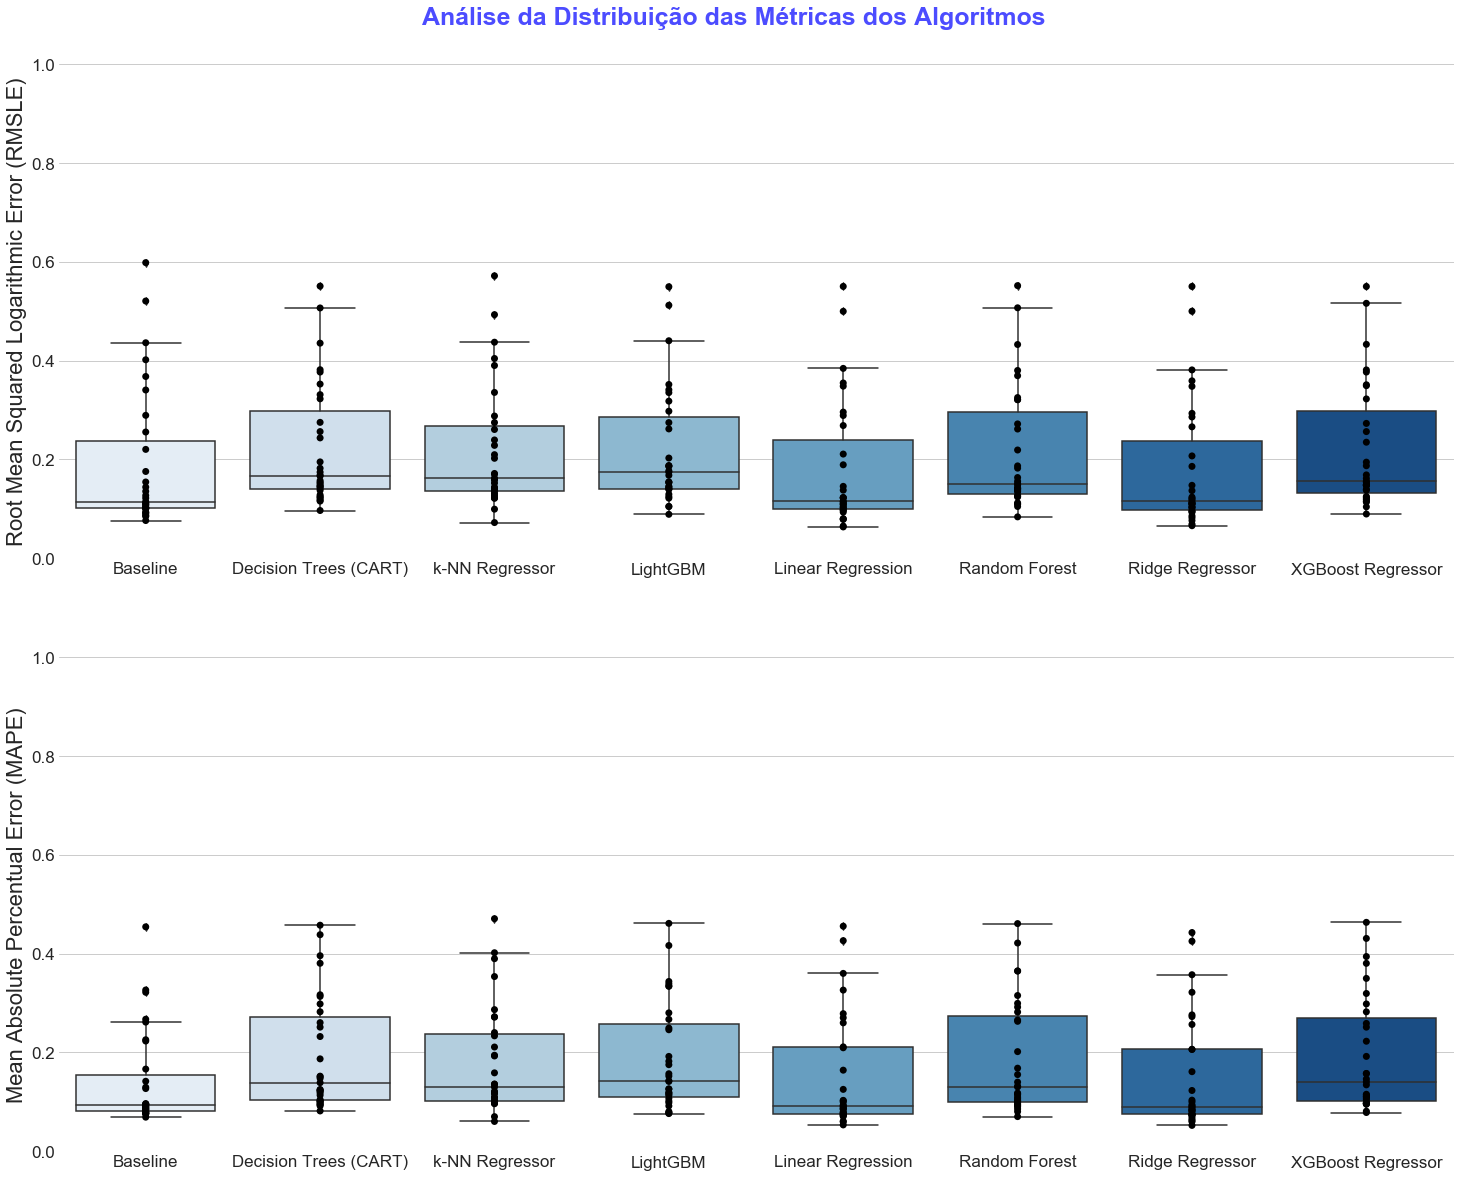

In [105]:
fig , ax = plt.subplots(ncols=1,nrows=2,figsize=(25,20))

fig.suptitle('Análise da Distribuição das Métricas dos Algoritmos',fontsize=25,weight='bold',color='blue',y=0.92,alpha=0.7)

sns.set_style("darkgrid")

sns.boxplot(data=ANL_RMSLE,palette="Blues",ax=ax[0])
sns.stripplot(data=ANL_RMSLE, color="black", jitter=0, size=7,ax=ax[0])
ax[0].set_ylim(0,1)
ax[0].set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax[0].set_xticklabels(['Baseline','Decision Trees (CART)','k-NN Regressor','LightGBM','Linear Regression','Random Forest','Ridge Regressor','XGBoost Regressor'])
ax[0].tick_params(axis='y',labelsize=17)
ax[0].tick_params(axis='x',labelsize=17)
ax[0].set_xlabel('',fontsize=22)
ax[0].set_ylabel('Root Mean Squared Logarithmic Error (RMSLE)',fontsize=22)

sns.boxplot(data=ANL_MAPE,palette="Blues",ax=ax[1])
sns.stripplot(data=ANL_MAPE, color="black", jitter=0, size=7,ax=ax[1])
ax[1].set_ylim(0,1)
ax[1].set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax[1].set_xticklabels(['Baseline','Decision Trees (CART)','k-NN Regressor','LightGBM','Linear Regression','Random Forest','Ridge Regressor','XGBoost Regressor'])
ax[1].tick_params(axis='y',labelsize=17)
ax[1].tick_params(axis='x',labelsize=17)
ax[1].set_xlabel('',fontsize=22)
ax[1].set_ylabel('Mean Absolute Percentual Error (MAPE)',fontsize=22)

plt.show()

## Levando em consideração a análise do RMSLE, temos alguns pontos a serem destacados. A Baseline apresenta uma das maiores variações, porém possui juntamente com o Ridge Regressor e a Linear Regression, os menores valores para a Mediana além de apresentaemr a distribuição abaixo da Mediana de forma bem compacta, mostrando a pequena variabilidade para o RMSLE ao longo dos dias. Outro algoritmo que deve ser destacado por essa característica é o LightGBM, porém o único ponto negativo é que ele possui o valor da Mediana um pouco maior que os modelos citados anteriormente. Os demais algoritmos, dispõem de distribuições semelhantes.

## Visualizando Métricas por Estado
## MAPE

In [106]:
#Visualizando o MAPE (%) de cada algoritmo por estado
ms['MEAN_SEM_BASE'] = ms.iloc[:,1:].transpose().mean()
ms['MEAN_ALL'] = ms.transpose().mean()
ms.style.background_gradient(cmap="hot_r",vmin=0,vmax=.5)

## RSLE

In [108]:
#Visualizando o RSLE de cada algoritmo por estado
ms2['MEAN_SEM_BASE'] = ms2.iloc[:,1:].transpose().mean()
ms2['MEAN_ALL'] = ms2.transpose().mean()
ms2.style.background_gradient(cmap="hot_r",vmin=0,vmax=.5)

## Com uma visão mais específica das métricas por estado, abrimos possibilidades para escolher os melhores algoritmos para cada estado, e assim otimizar mais ainda a eficiência da previsão do número total de casos confirmados.

# 

## Agora vamos realizar o Feature Selection com apenas um modelo escolhido (Linear Regression) e posteriormente com todos os modelos.

In [135]:
#Selecionando as features
features = [
       'Densidade', 'area_state', 'Population_2019',
       'Day', 'Semana_do_Ano', 'Dia_do_Ano',
       'Mes', 'Dia', 'Isolamento', 'Dias_de_Isolamento',
       'Cases_Last_Day', 'Diff_Cases_Last_Day', 'Cases_Last_Day_1',
       'Diff_Cases_Last_Day_1', 'Cases_Last_Day_2',
       'Diff_Cases_Last_Day_2', 'Cases_por_Population_Last_Day',
       'Cases_por_Densidade_Last_Day', 'Mean_Cases_Last_Days_3',
       'Desvio_Cases_Last_Days_3', 'Mean_Cases_Last_Days_7',
       'Desvio_Cases_Last_Days_7', 'Mean_Diff_Cases_Last_Days_3',
       'Max_Diff_Cases_Last_Days_3', 'Desvio_Diff_Cases_Last_Days_3',
       'Mean_Diff_Cases_Last_Days_7', 'Max_Diff_Cases_Last_Days_7',
       'Desvio_Diff_Cases_Last_Days_7', 'UF_CAT_AC', 'UF_CAT_AL',
       'UF_CAT_AP', 'UF_CAT_AM', 'UF_CAT_BA', 'UF_CAT_CE', 'UF_CAT_DF',
       'UF_CAT_ES', 'UF_CAT_GO', 'UF_CAT_MA', 'UF_CAT_MT', 'UF_CAT_MS',
       'UF_CAT_MG', 'UF_CAT_PR', 'UF_CAT_PB', 'UF_CAT_PA', 'UF_CAT_PE',
       'UF_CAT_PI', 'UF_CAT_RN', 'UF_CAT_RS', 'UF_CAT_RJ', 'UF_CAT_RO',
       'UF_CAT_RR', 'UF_CAT_SC', 'UF_CAT_SE', 'UF_CAT_SP', 'UF_CAT_TO',
       'REG_CAT_Norte', 'REG_CAT_Nordeste', 'REG_CAT_Centro-Oeste',
       'REG_CAT_Sudeste', 'REG_CAT_Sul', 'DIST_RJ', 'DIST_CE', 'DIST_SP'
            ]

#Quantidade selecionada
len(features)

63

In [136]:
%%time

feat = features.copy()
selection=[]
add = 'yes'
rep = 0
num_sel = 1

while add == 'yes':
    
    feat_sel=pd.DataFrame(columns=['FEAT','MAPE','RMSLE'])
    
    for var in range(0,len(feat)):

        selection.append(feat[var])
        error=[]
        error2=[]
        if var==0:
            add = 'no'

        for i in range(mn,mx+1):
            if date_state[date_state['Day']==i].shape[0] !=0:

                train=date_state[date_state['Day']<i]
                test=date_state[date_state['Day']==i]

                sel=selection
                X_train=train.loc[:,sel].values
                y_train=train['cases'].values
                X_test=test.loc[:,sel].values
                y_test=test['cases'].values

                model=LinearRegression(n_jobs=-1)
                model.fit(X_train,y_train)

                y_pred=model.predict(X_test)

                e = MAPE(y_pred,y_test)
                error.append(e)               
                e2 = RMSLE(y_pred,y_test)
                error2.append(e2)

        if rep==0:
            min_rmsle = np.mean(error2)
            var_min_rmsle = feat[var]
            add = 'yes'
        else:
            if np.mean(error2) < min_rmsle:
                min_rmsle = np.mean(error2)
                var_min_rmsle = feat[var]
                add = 'yes'
    
        att=pd.DataFrame({'FEAT':format(sel[:]),'MAPE':np.mean(error),'RMSLE':np.mean(error2)},index=[0])
        feat_sel=pd.concat([feat_sel,att]).reset_index(level=0,drop=True)
        feat_sel.to_csv('LR_TEST_num_sel_{}.csv'.format(num_sel),sep=';')
        rep=rep+1
        selection=selection[:-1]

    if add == 'yes':
        selection.append(var_min_rmsle)
        feat.remove(var_min_rmsle)
        print("+ {} : {:.4f}\n".format(var_min_rmsle,min_rmsle))
        num_sel = num_sel +1
        
print(selection)
print('\n')

+ Cases_Last_Day : 0.1868

+ UF_CAT_TO : 0.1862

+ UF_CAT_SE : 0.1856

+ UF_CAT_AL : 0.1850

+ UF_CAT_GO : 0.1850

+ DIST_CE : 0.1849

+ UF_CAT_RO : 0.1849

+ UF_CAT_AC : 0.1847

+ UF_CAT_RS : 0.1847

+ UF_CAT_MS : 0.1847

+ UF_CAT_PR : 0.1847

['Cases_Last_Day', 'UF_CAT_TO', 'UF_CAT_SE', 'UF_CAT_AL', 'UF_CAT_GO', 'DIST_CE', 'UF_CAT_RO', 'UF_CAT_AC', 'UF_CAT_RS', 'UF_CAT_MS', 'UF_CAT_PR']


Wall time: 5min 15s


# 

## Forward Feature Selection para todos os modelos

In [137]:
%%time

models=[RandomForestRegressor(n_jobs=-1,random_state=0,n_estimators=125),
        KNeighborsRegressor(n_jobs=-1,n_neighbors=3),
        LinearRegression(n_jobs=-1),
        XGBRegressor(n_jobs=-1,random_state=0,n_estimators=75),
        DecisionTreeRegressor(random_state=0),
        LGBMRegressor(n_jobs=-1,random_state=0,n_estimators=100,learning_rate=0.1,num_leaves = 83,min_child_samples = 1,subsample = 0.5145976365331946,
                      colsample_bytree = 0.7911916376676605),
        Ridge(random_state=0,alpha=0.015,normalize=True,fit_intercept=True)]

name_mod=['RF','KNN','LR','XGB','CART','LGBM','RID']
fullname_mod=['Random Forest','k-NN Regressor','Linear Regression','XGBoost Regressor','Decision Trees - CART','LightGBM','Ridge Regressor']

mn=47
mx=77

for num in range(0,len(models)):
    
    print("\nForward Feature Selection com {}\n".format(fullname_mod[num]))

    feat = features.copy() #devem ser colocadas dentro do loop dos modelos pq algumas variáveis são excluídas da lista durante o processo de feature selection
    selection=[]
    add = 'yes'
    rep = 0
    num_sel = 1
    error=[]
    error2=[]   
    
    while add == 'yes':

        feat_sel=pd.DataFrame(columns=['FEAT','MAPE','RMSLE'])

        for var in range(0,len(feat)):

            selection.append(feat[var])
            error=[]
            error2=[]
            if var==0:
                add = 'no'

            for i in range(mn,mx+1):
                if date_state[date_state['Day']==i].shape[0] !=0:

                    train=date_state[date_state['Day']<i]
                    test=date_state[date_state['Day']==i]

                    sel=selection
                    X_train=train.loc[:,sel].values
                    y_train=train['cases'].values
                    X_test=test.loc[:,sel].values
                    y_test=test['cases'].values

                    model=models[num]
                    model.fit(X_train,y_train)

                    y_pred=model.predict(X_test)                  

                    e = MAPE(y_pred,y_test)
                    error.append(e)               
                    e2 = RMSLE(y_pred,y_test)
                    error2.append(e2)
                    

            if rep==0:
                min_rmsle = np.mean(error2)
                var_min_rmsle = feat[var]
                add = 'yes'
            else:
                if np.mean(error2) < min_rmsle:
                    min_rmsle = np.mean(error2)
                    var_min_rmsle = feat[var]
                    add = 'yes'

            att=pd.DataFrame({'FEAT':format(sel[:]),'MAPE':np.mean(error),'RMSLE':np.mean(error2)},index=[0])
            feat_sel=pd.concat([feat_sel,att]).reset_index(level=0,drop=True)
            feat_sel.to_csv('{}_num_sel_{}.csv'.format(name_mod[num],num_sel),sep=';')
            rep=rep+1
            selection=selection[:-1]

        if add == 'yes':
            selection.append(var_min_rmsle)
            feat.remove(var_min_rmsle)
            print("+ {} : {:.4f}".format(var_min_rmsle,min_rmsle))
            num_sel = num_sel +1
            
        if len(feat) == 0:
            add = 'no'

    print(selection)


Forward Feature Selection com Random Forest

+ Cases_Last_Day : 0.2244
+ Mean_Diff_Cases_Last_Days_7 : 0.2139
+ Isolamento : 0.2106
+ Cases_Last_Day_1 : 0.2073
+ REG_CAT_Sul : 0.2051
+ UF_CAT_MG : 0.2040
+ UF_CAT_AM : 0.2032
+ Mean_Cases_Last_Days_3 : 0.2024
+ Semana_do_Ano : 0.2011
+ Max_Diff_Cases_Last_Days_3 : 0.2010
+ UF_CAT_CE : 0.2001
+ UF_CAT_SC : 0.1999
['Cases_Last_Day', 'Mean_Diff_Cases_Last_Days_7', 'Isolamento', 'Cases_Last_Day_1', 'REG_CAT_Sul', 'UF_CAT_MG', 'UF_CAT_AM', 'Mean_Cases_Last_Days_3', 'Semana_do_Ano', 'Max_Diff_Cases_Last_Days_3', 'UF_CAT_CE', 'UF_CAT_SC']

Forward Feature Selection com k-NN Regressor

+ Cases_Last_Day : 0.2284
+ Max_Diff_Cases_Last_Days_3 : 0.2164
+ Dias_de_Isolamento : 0.2101
+ UF_CAT_RJ : 0.2097
+ UF_CAT_TO : 0.2094
+ UF_CAT_RO : 0.2091
+ Mes : 0.2088
+ UF_CAT_AM : 0.2086
+ UF_CAT_GO : 0.2085
+ UF_CAT_DF : 0.2084
+ UF_CAT_PE : 0.2083
+ UF_CAT_PR : 0.2082
+ Isolamento : 0.2081
+ UF_CAT_CE : 0.2081
['Cases_Last_Day', 'Max_Diff_Cases_Last_Days

## Com as seleções feitas podemos perceber melhoras bem significativas no desempenho dos modelos, principalmente na Random Forest, k-NN e XGBoost. Outro ponto a ser destacado é a escolha em comum por parte dos algoritmos de algumas variáveis específicas, 'Cases_Last_Day' é evidente que seria unânime uma vez que possui relação direta com o total de casos confirmados do dia seguinte. Variáveis como: 'Semana_do_Ano', 'REG_CAT_Sul', 'UF_CAT_AM' e 'UF_CAT_TO' são frequentemente selecionadas. Outras variáveis relacionadas a medidas de posição e dispersão a respeito da soma e novos casos também estão bem frequentes, além de alguns modelos captarem preditividade nas features relacionadas com o isolamento social / quarentena.

# 

## Treinando os modelos com os tunnings e suas respectivas novas features

In [110]:
models=[RandomForestRegressor(n_jobs=-1,random_state=0,n_estimators=125),
        KNeighborsRegressor(n_jobs=-1,n_neighbors=3),
        LinearRegression(n_jobs=-1),
        XGBRegressor(n_jobs=-1,random_state=0,n_estimators=75),
        DecisionTreeRegressor(random_state=0),
        LGBMRegressor(n_jobs=-1,random_state=0,n_estimators=100,learning_rate=0.1,num_leaves = 115,min_child_samples = 1,subsample = 0.4682239281869186,colsample_bytree = 1.0),
        Ridge(random_state=0,alpha=0.03,normalize=True,fit_intercept=True)]

name_mod=['RF','KNN','LR','XGB','CART','LGBM','RID']

feat_mod = [['Cases_Last_Day', 'Mean_Diff_Cases_Last_Days_7', 'Isolamento', 'Cases_Last_Day_1', 'REG_CAT_Sul', 'UF_CAT_MG', 'UF_CAT_AM', 'Mean_Cases_Last_Days_3',
             'Semana_do_Ano', 'Max_Diff_Cases_Last_Days_3', 'UF_CAT_CE', 'UF_CAT_SC'],
            ['Cases_Last_Day', 'Max_Diff_Cases_Last_Days_3', 'Dias_de_Isolamento', 'UF_CAT_RJ', 'UF_CAT_TO', 'UF_CAT_RO', 'Mes', 'UF_CAT_AM', 'UF_CAT_GO', 'UF_CAT_DF',
             'UF_CAT_PE', 'UF_CAT_PR', 'Isolamento', 'UF_CAT_CE'],
            ['Cases_Last_Day', 'UF_CAT_TO', 'UF_CAT_SE', 'UF_CAT_AL', 'UF_CAT_GO', 'DIST_CE', 'UF_CAT_RO', 'UF_CAT_AC', 'UF_CAT_RS', 'UF_CAT_MS', 'UF_CAT_PR'],
            ['Cases_Last_Day', 'Max_Diff_Cases_Last_Days_3', 'Mes', 'Max_Diff_Cases_Last_Days_7', 'UF_CAT_PE', 'UF_CAT_DF', 'UF_CAT_RO'],
            ['Cases_Last_Day', 'Semana_do_Ano', 'UF_CAT_DF', 'UF_CAT_RN', 'UF_CAT_RJ'],
            ['Cases_Last_Day', 'Mean_Diff_Cases_Last_Days_7'],
            ['Cases_Last_Day', 'UF_CAT_TO', 'UF_CAT_SE', 'UF_CAT_AL', 'UF_CAT_RO', 'UF_CAT_GO', 'UF_CAT_MS', 'UF_CAT_PI', 'UF_CAT_AC', 'UF_CAT_PR']]

#Criando dataframe para análise da performance do modelo
analytics=pd.DataFrame(columns=['date','Day','target','predict','MAPE','RMSE','RMSLE'])

for num in range(0,len(models)):
    
    error=[]
    error2=[]
    analytics=pd.DataFrame(columns=['date','Day','target','predict_{}'.format(name_mod[num]),'MAPE_{}'.format(name_mod[num]),'RMSE_{}'.format(name_mod[num]),'RMSLE_{}'.format(name_mod[num])])
    
    for i in range(mn,mx+1):
        if date_state[date_state['Day']==i].shape[0] !=0:

            train=date_state[date_state['Day']<i]
            test=date_state[date_state['Day']==i]

            sel=feat_mod[num]
            X_train=train.loc[:,sel].values
            y_train=train['cases'].values
            X_test=test.loc[:,sel].values
            y_test=test['cases'].values

            model=models[num]
            model.fit(X_train,y_train)

            y_pred=model.predict(X_test)

            y_state=test['state'].values
            aux=MAPE_STATE(y_pred,y_test,y_state)
            aux=aux.set_index(aux.state).drop(columns='state')
            if(i==mn):
                m=aux
            else:
                m=m.merge(aux,how='outer',on='state')
                
            aux2=RSLE_STATE(y_pred,y_test,y_state)
            aux2=aux2.set_index(aux2.state).drop(columns='state')
            if(i==mn):
                m2=aux2
            else:
                m2=m2.merge(aux2,how='outer',on='state')                          
                
            e = MAPE(y_pred,y_test)
            error.append(e)
            e2 = RMSLE(y_pred,y_test)
            error2.append(e2)              

            #Guardando predicts, targets e outras informações para análise do desempenho do modelo
            att=pd.DataFrame({'date':test.date.max(),'Day':test.Day.max(),'target':y_test.mean(),'predict_{}'.format(name_mod[num]):y_pred.mean(),
                              'MAPE_{}'.format(name_mod[num]):MAPE(y_pred,y_test),'RMSLE_{}'.format(name_mod[num]):RMSLE(y_pred,y_test),'RMSE_{}'.format(name_mod[num]):RMSE(y_pred,y_test)},index=[0])

            #Atualizando dataframe de análise
            analytics=pd.concat([analytics,att]).reset_index(drop=True,level=0)        

    #Imprimir mensagem para cada algorimo mostrando os scores
    msg=print("\n{}\nMédia do Erro MAPE: {:.4f}%\nMédia do Erro RMSLE: {:.4f}".format(name_mod[num],np.mean(error)*100,np.mean(error2)))
    
    #Salvando o modelo
    joblib.dump(model,'model_{}.pkl'.format(name_mod[num]))
    
    if name_mod[num] == 'RF':
        er_rf=pd.DataFrame(error,columns=['{}_MAPE'.format(name_mod[num])]); er2_rf=pd.DataFrame(error2,columns=['{}_RMSLE'.format(name_mod[num])]);
        m_rf=pd.DataFrame(m.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_MAPE'.format(name_mod[num])]); ms=pd.concat([ms,m_rf],axis=1);
        m2_rf=pd.DataFrame(m2.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_RSLE'.format(name_mod[num])]); ms2=pd.concat([ms2,m2_rf],axis=1);
        an_rf=analytics; ANALYTICS=ANALYTICS.merge(an_rf.iloc[:,[1,3,4,5,6]],how='left',on='Day'); msg;
    elif name_mod[num] == 'KNN':
        er_knn=pd.DataFrame(error,columns=['{}_MAPE'.format(name_mod[num])]); er2_knn=pd.DataFrame(error2,columns=['{}_RMSLE'.format(name_mod[num])]);
        m_knn=pd.DataFrame(m.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_MAPE'.format(name_mod[num])]); ms=pd.concat([ms,m_knn],axis=1);
        m2_knn=pd.DataFrame(m2.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_RSLE'.format(name_mod[num])]); ms2=pd.concat([ms2,m2_knn],axis=1);
        an_knn=analytics; ANALYTICS=ANALYTICS.merge(an_knn.iloc[:,[1,3,4,5,6]],how='left',on='Day'); msg;
    elif name_mod[num] == 'LR':
        er_lr=pd.DataFrame(error,columns=['{}_MAPE'.format(name_mod[num])]); er2_lr=pd.DataFrame(error2,columns=['{}_RMSLE'.format(name_mod[num])]);
        m_lr=pd.DataFrame(m.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_MAPE'.format(name_mod[num])]); ms=pd.concat([ms,m_lr],axis=1);
        m2_lr=pd.DataFrame(m2.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_RSLE'.format(name_mod[num])]); ms2=pd.concat([ms2,m2_lr],axis=1);
        an_lr=analytics; ANALYTICS=ANALYTICS.merge(an_lr.iloc[:,[1,3,4,5,6]],how='left',on='Day'); msg;
    elif name_mod[num] == 'XGB':
        er_xgb=pd.DataFrame(error,columns=['{}_MAPE'.format(name_mod[num])]); er2_xgb=pd.DataFrame(error2,columns=['{}_RMSLE'.format(name_mod[num])]);
        m_xgb=pd.DataFrame(m.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_MAPE'.format(name_mod[num])]); ms=pd.concat([ms,m_xgb],axis=1);
        m2_xgb=pd.DataFrame(m2.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_RSLE'.format(name_mod[num])]); ms2=pd.concat([ms2,m2_xgb],axis=1);
        an_xgb=analytics; ANALYTICS=ANALYTICS.merge(an_xgb.iloc[:,[1,3,4,5,6]],how='left',on='Day'); msg;
    elif name_mod[num] == 'CART':
        er_cart=pd.DataFrame(error,columns=['{}_MAPE'.format(name_mod[num])]); er2_cart=pd.DataFrame(error2,columns=['{}_RMSLE'.format(name_mod[num])]);
        m_cart=pd.DataFrame(m.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_MAPE'.format(name_mod[num])]); ms=pd.concat([ms,m_cart],axis=1);
        m2_cart=pd.DataFrame(m2.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_RSLE'.format(name_mod[num])]); ms2=pd.concat([ms2,m2_cart],axis=1);
        an_cart=analytics; ANALYTICS=ANALYTICS.merge(an_cart.iloc[:,[1,3,4,5,6]],how='left',on='Day'); msg;
    elif name_mod[num] == 'LGBM':
        er_lgbm=pd.DataFrame(error,columns=['{}_MAPE'.format(name_mod[num])]); er2_lgbm=pd.DataFrame(error2,columns=['{}_RMSLE'.format(name_mod[num])]);
        m_lgbm=pd.DataFrame(m.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_MAPE'.format(name_mod[num])]); ms=pd.concat([ms,m_lgbm],axis=1);
        m2_lgbm=pd.DataFrame(m2.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_RSLE'.format(name_mod[num])]); ms2=pd.concat([ms2,m2_lgbm],axis=1);
        an_lgbm=analytics; ANALYTICS=ANALYTICS.merge(an_lgbm.iloc[:,[1,3,4,5,6]],how='left',on='Day'); msg;
    elif name_mod[num] == 'RID':
        er_rid=pd.DataFrame(error,columns=['{}_MAPE'.format(name_mod[num])]); er2_rid=pd.DataFrame(error2,columns=['{}_RMSLE'.format(name_mod[num])]);
        m_rid=pd.DataFrame(m.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_MAPE'.format(name_mod[num])]); ms=pd.concat([ms,m_rid],axis=1);
        m2_rid=pd.DataFrame(m2.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_RSLE'.format(name_mod[num])]); ms2=pd.concat([ms2,m2_rid],axis=1);
        an_rid=analytics; ANALYTICS=ANALYTICS.merge(an_rid.iloc[:,[1,3,4,5,6]],how='left',on='Day'); msg;
        
#Detalhe: sempre que for usado o dataframe ANALYTICS para avaliar a performance, a Baseline deve ser treinada novamente, para reiniciar o dataframe.


RF
Média do Erro MAPE: 15.9975%
Média do Erro RMSLE: 0.1908

KNN
Média do Erro MAPE: 16.3345%
Média do Erro RMSLE: 0.1994

LR
Média do Erro MAPE: 14.9095%
Média do Erro RMSLE: 0.1769

XGB
Média do Erro MAPE: 17.1103%
Média do Erro RMSLE: 0.2082

CART
Média do Erro MAPE: 18.4050%
Média do Erro RMSLE: 0.2186

LGBM
Média do Erro MAPE: 18.0849%
Média do Erro RMSLE: 0.2169

RID
Média do Erro MAPE: 14.2978%
Média do Erro RMSLE: 0.1747


In [111]:
0.1908-0.1893

0.0015000000000000013

## Com todo esse processo realizado obtivemos bastante melhora nos scores dos algoritmos, sendo que alguns melhoraram mais com os tunnings (LGBM), outros melhoraram com as novas features (RF e XGB), outros se otimizaram equilibradamente com os dois processos (KNN e CART) e finalmente os últimos dois se apresentaram mais eficazes desde o início com os tipos de dados apresentado e não melhoram tanto com esses processos (LR e RID).
## Contudo, apenas Ridge Regressor e a Linear Regression superaram a Baseline (RMSLE = 0.1893) apresentando RMSLE de 0.1747 e 0.1769, respectivamente. Devemos também destacar a ótima aproximação da Random Forest para a Baseline, ficando atrás por menos que um centésimo (0.0015).

## Análise gráfica do treino e validação dos algoritmos

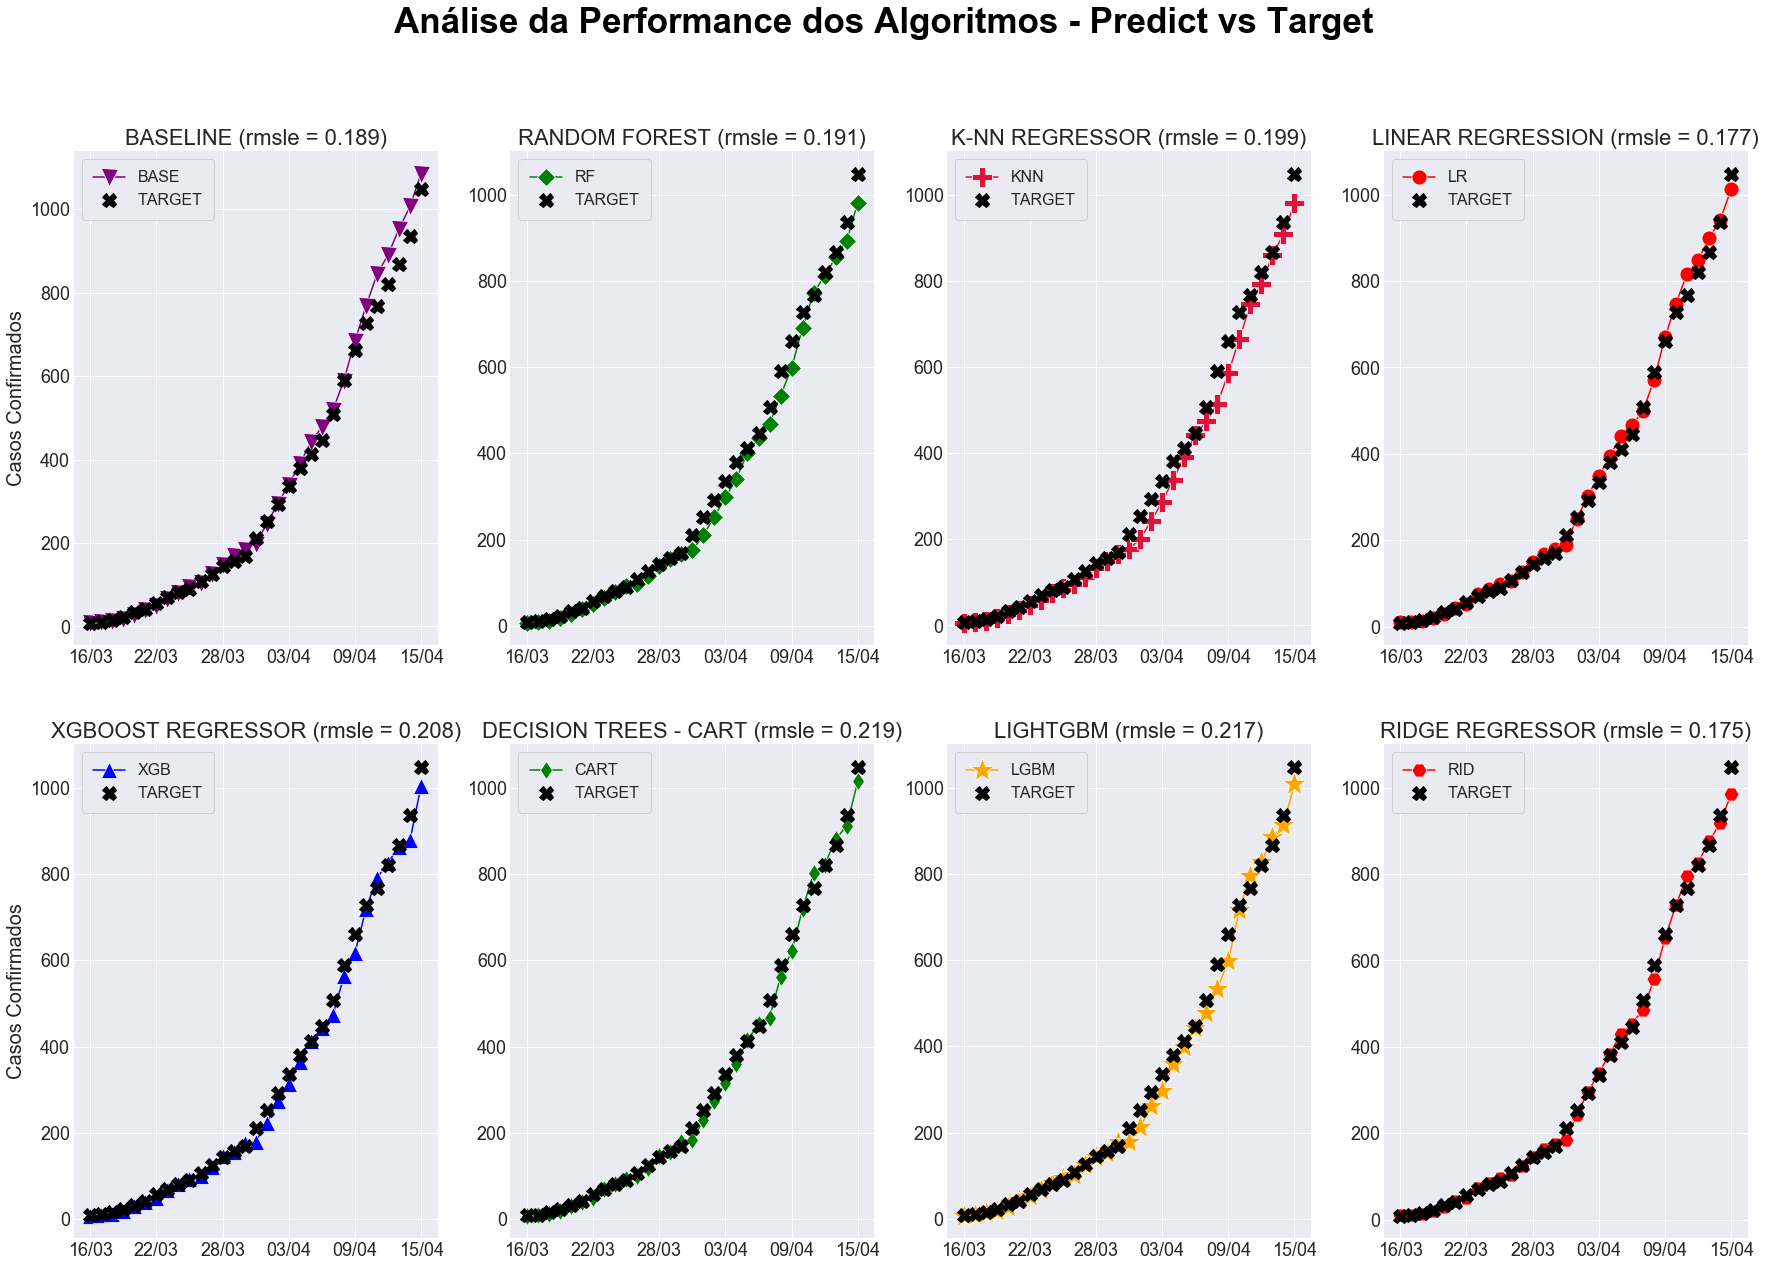

In [112]:
nrows , ncols = 2 , 4
fig , ax = plt.subplots(ncols=ncols,nrows=nrows,figsize=(30,20))
fig.suptitle("Análise da Performance dos Algoritmos - Predict vs Target",fontsize=35,y=0.98,color="black",weight='bold')

#Definindo tamanho das fontes
sizelabel , sizetick , sizetit = 20 , 18 , 22

#Personalizando o formato da data mostrada nos ticks
dateview=[pd.to_datetime(an_lr.date)[x].strftime("%d/%m") for x in range(0,len(an_lr.date))]

sns.set_style("darkgrid")

sns.lineplot(x=an_base.date,y=an_base.predict_BASE,color="purple",marker='v',markersize=17,ax=ax[0,0],label='BASE')
ax[0,0].set_title('BASELINE (rmsle = {:.3f})'.format(np.mean(er2_base).values[0]),fontsize=sizetit)
sns.lineplot(x=an_rf.date,y=an_rf.predict_RF,color="green",marker='D',markersize=13,ax=ax[0,1],label='RF')
ax[0,1].set_title('RANDOM FOREST (rmsle = {:.3f})'.format(np.mean(er2_rf).values[0]),fontsize=sizetit)
sns.lineplot(x=an_knn.date,y=an_knn.predict_KNN,color="crimson",marker='P',markersize=20,ax=ax[0,2],label='KNN')
ax[0,2].set_title('K-NN REGRESSOR (rmsle = {:.3f})'.format(np.mean(er2_knn).values[0]),fontsize=sizetit)
sns.lineplot(x=an_lr.date,y=an_lr.predict_LR,color="red",marker='o',markersize=15,ax=ax[0,3],label='LR')
ax[0,3].set_title('LINEAR REGRESSION (rmsle = {:.3f})'.format(np.mean(er2_lr).values[0]),fontsize=sizetit)

sns.lineplot(x=an_xgb.date,y=an_xgb.predict_XGB,color="blue",marker='^',markersize=16,ax=ax[1,0],label='XGB')
ax[1,0].set_title('XGBOOST REGRESSOR (rmsle = {:.3f})'.format(np.mean(er2_xgb).values[0]),fontsize=sizetit)
sns.lineplot(x=an_cart.date,y=an_cart.predict_CART,color="green",marker='d',markersize=13,ax=ax[1,1],label='CART')
ax[1,1].set_title('DECISION TREES - CART (rmsle = {:.3f})'.format(np.mean(er2_cart).values[0]),fontsize=sizetit)
sns.lineplot(x=an_lgbm.date,y=an_lgbm.predict_LGBM,color="orange",marker='*',markersize=25,ax=ax[1,2],label='LGBM')
ax[1,2].set_title('LIGHTGBM (rmsle = {:.3f})'.format(np.mean(er2_lgbm).values[0]),fontsize=sizetit)
sns.lineplot(x=an_rid.date,y=an_rid.predict_RID,color="red",marker='H',markersize=15,ax=ax[1,3],label='RID')
ax[1,3].set_title('RIDGE REGRESSOR (rmsle = {:.3f})'.format(np.mean(er2_rid).values[0]),fontsize=sizetit)

for i in range(0,nrows):
    for j in range(0,ncols):
        ax[i,j].plot(an_lr.date,an_lr.target,color="black",marker='X',label='TARGET',alpha=1,linestyle='none',markersize=14)
        ax[i,j].set_ylabel('Casos Confirmados',fontsize=sizelabel) if((i==0 and j==0) or (j==0 and i==1)) else ax[i,j].set_ylabel('',fontsize=sizelabel)
        ax[i,j].set_xlabel('',fontsize=sizelabel)
        ax[i,j].tick_params(axis='x',labelsize=sizetick,rotation=0)
        ax[i,j].tick_params(axis='y',labelsize=sizetick)
        ax[i,j].set_xticks(an_lr.date[::-6])
        ax[i,j].set_xticklabels(dateview[::-6])
        ax[i,j].legend(ncol=1,fontsize=16,loc="upper left",frameon=True,framealpha=0.90,borderpad = 0.7)

plt.show()

## Comparando com a análise feita apenas com os tunnings anteriormente, temos que a adição das features ajudou bastante os algoritmos a acompanhar a target. Alguns algoritmos como LightGBM, Linear Regression e Ridge Regressor não obtiveram melhora significativa.

## Análise Comparativa das Métricas dos Algoritmos

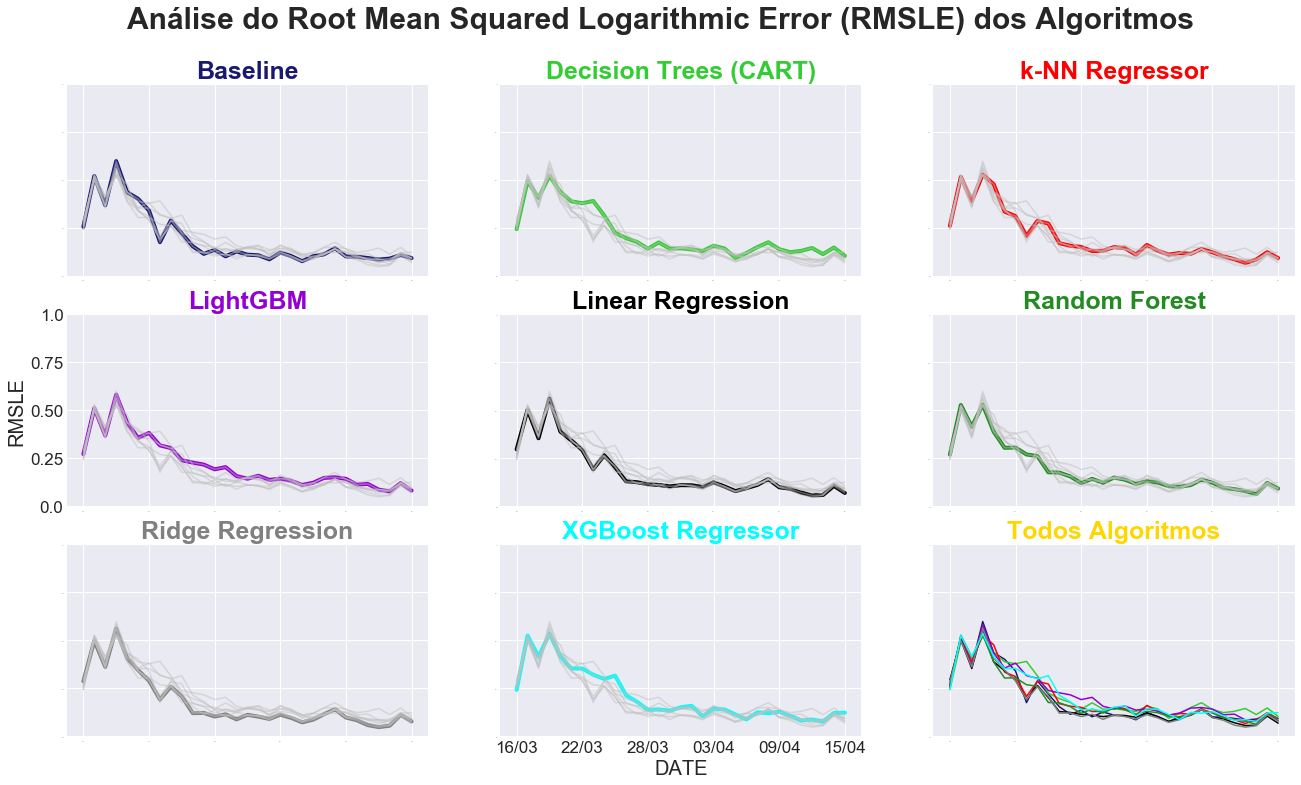

In [113]:
ANL_RMSLE = ANALYTICS.loc[:,['RMSLE_BASE','RMSLE_CART', 'RMSLE_KNN', 'RMSLE_LGBM', 'RMSLE_LR', 'RMSLE_RF','RMSLE_RID', 'RMSLE_XGB']]
ANL_MAPE = ANALYTICS.loc[:,['MAPE_BASE', 'MAPE_CART', 'MAPE_KNN', 'MAPE_LGBM', 'MAPE_LR','MAPE_RF', 'MAPE_RID', 'MAPE_XGB']]

ncols , nrows = 3 , 3
fig , ax = plt.subplots(ncols=ncols, nrows=nrows,figsize=(22,12))
fig.suptitle('Análise do Root Mean Squared Logarithmic Error (RMSLE) dos Algoritmos',fontsize=30,weight='bold',y=0.97)
sns.set_style("whitegrid")

cont=0
names=['Baseline','Decision Trees (CART)','k-NN Regressor','LightGBM','Linear Regression','Random Forest','Ridge Regression','XGBoost Regressor','NULL']
colors=['midnightblue','limegreen','red','darkviolet','black','forestgreen','gray','cyan','gold']
dateview = [ANALYTICS.date[d].strftime("%d/%m") for d in range(0,len(ANALYTICS.date))]

for i in range(0,nrows):
    for j in range(0,ncols):
        if (i==2) and (j==2):
            for num in range(0,8):
                ax[i,j].plot(ANALYTICS.date,ANL_RMSLE.iloc[:,num],color=colors[num])
                ax[i,j].set_title('Todos Algoritmos',fontsize=25,color='gold',weight='bold')
                ax[i,j].set_ylim(0,1)
                ax[i,j].set_ylabel('',fontsize=0)
                ax[i,j].set_yticks([0,0.25,0.5,0.75,1])
                ax[i,j].set_yticklabels(['0.0','0.25','0.50','0.75','1.0'])
                ax[i,j].tick_params(axis='y',labelsize=0)
                ax[i,j].tick_params(axis='x',labelsize=0,rotation=0)
                ax[i,j].set_xticks(ANALYTICS.date[::-6])
                ax[i,j].set_xticklabels(dateview[::-6])
        else:
            ax[i,j].plot(ANALYTICS.date,ANL_RMSLE.iloc[:,cont],color=colors[cont],linewidth=4)
            ax[i,j].set_title(names[cont],fontsize=25,color=colors[cont],weight='bold')
            ax[i,j].set_ylim(0,1)
            ax[i,j].set_ylabel('',fontsize=0)
            ax[i,j].set_yticks([0,0.25,0.5,0.75,1])
            ax[i,j].set_yticklabels(['0.0','0.25','0.50','0.75','1.0'])
            ax[i,j].tick_params(axis='y',labelsize=0)
            ax[i,j].tick_params(axis='x',labelsize=0,rotation=0)
            ax[i,j].set_xticks(ANALYTICS.date[::-6])
            ax[i,j].set_xticklabels(dateview[::-6])
            cont=cont+1
            
            for num in range(0,8):
                ax[i,j].plot(ANALYTICS.date,ANL_RMSLE.iloc[:,num],color='silver',alpha=0.5)
        
        if i==1 and j==0:
            ax[i,j].set_ylabel('RMSLE',fontsize=20)
            
        if i==2 and j==1:
            ax[i,j].set_xlabel('DATE',fontsize=20)
            
        if i==2 and j==1:
            ax[i,j].tick_params(axis='x',labelsize=17,rotation=0)
            
        if j==0 and i==1:
            ax[i,j].tick_params(axis='y',labelsize=17)            

plt.show()

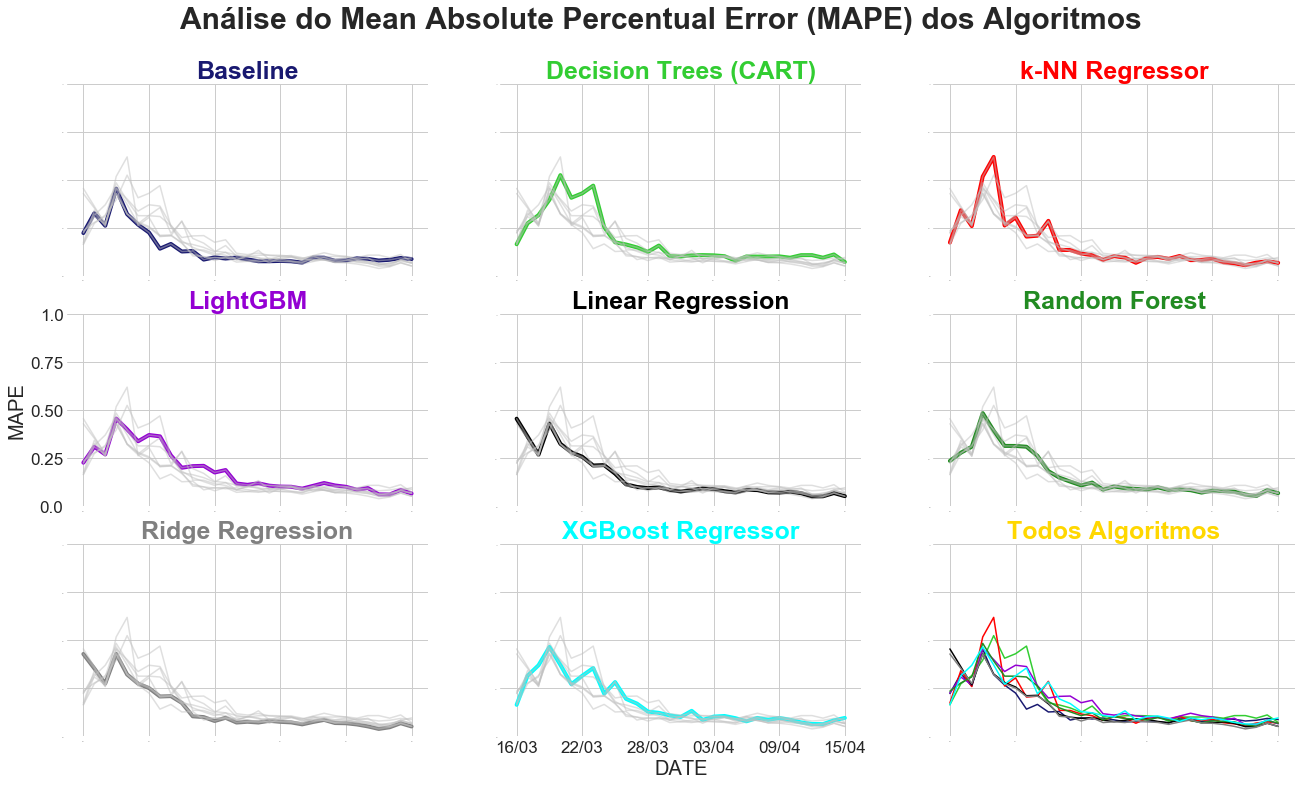

In [114]:
ncols , nrows = 3 , 3
fig , ax = plt.subplots(ncols=ncols, nrows=nrows,figsize=(22,12))
fig.suptitle('Análise do Mean Absolute Percentual Error (MAPE) dos Algoritmos',fontsize=30,weight='bold',y=0.97)
sns.set_style("whitegrid")

cont=0
names=['Baseline','Decision Trees (CART)','k-NN Regressor','LightGBM','Linear Regression','Random Forest','Ridge Regression','XGBoost Regressor','NULL']
colors=colors=['midnightblue','limegreen','red','darkviolet','black','forestgreen','gray','cyan','gold']
dateview = [ANALYTICS.date[d].strftime("%d/%m") for d in range(0,len(ANALYTICS.date))]

for i in range(0,nrows):
    for j in range(0,ncols):
        if (i==2) and (j==2):
            for num in range(0,8):
                ax[i,j].plot(ANALYTICS.date,ANL_MAPE.iloc[:,num],color=colors[num])
                ax[i,j].set_title('Todos Algoritmos',fontsize=25,color='gold',weight='bold')
                ax[i,j].set_ylim(0,1)
                ax[i,j].set_ylabel('',fontsize=0)
                ax[i,j].set_yticks([0,0.25,0.5,0.75,1])
                ax[i,j].set_yticklabels(['0.0','0.25','0.50','0.75','1.0'])
                ax[i,j].tick_params(axis='y',labelsize=0)
                ax[i,j].tick_params(axis='x',labelsize=0,rotation=0)
                ax[i,j].set_xticks(ANALYTICS.date[::-6])
                ax[i,j].set_xticklabels(dateview[::-6])
        else:
            ax[i,j].plot(ANALYTICS.date,ANL_MAPE.iloc[:,cont],color=colors[cont],linewidth=4)
            ax[i,j].set_title(names[cont],fontsize=25,color=colors[cont],weight='bold')
            ax[i,j].set_ylim(0,1)
            ax[i,j].set_ylabel('',fontsize=0)
            ax[i,j].set_yticks([0,0.25,0.5,0.75,1])
            ax[i,j].set_yticklabels(['0.0','0.25','0.50','0.75','1.0'])
            ax[i,j].tick_params(axis='y',labelsize=0)
            ax[i,j].tick_params(axis='x',labelsize=0,rotation=0)
            ax[i,j].set_xticks(ANALYTICS.date[::-6])
            ax[i,j].set_xticklabels(dateview[::-6])
            cont=cont+1
            
            for num in range(0,8):
                ax[i,j].plot(ANALYTICS.date,ANL_MAPE.iloc[:,num],color='silver',alpha=0.5)
        
        if i==1 and j==0:
            ax[i,j].set_ylabel('MAPE',fontsize=20)
            
        if i==2 and j==1:
            ax[i,j].set_xlabel('DATE',fontsize=20)
            
        if i==2 and j==1:
            ax[i,j].tick_params(axis='x',labelsize=17,rotation=0)
            
        if j==0 and i==1:
            ax[i,j].tick_params(axis='y',labelsize=17)            

plt.show()

## Comparando com a análise feita apenas com os tunnings temos que os modelos da Baseline, Linear Regression e Ridge Regressor ainda possuem predominância de menores scores, principalmente nos últimos dias.

## Análise da Distribuição das Métricas dos Algoritmos

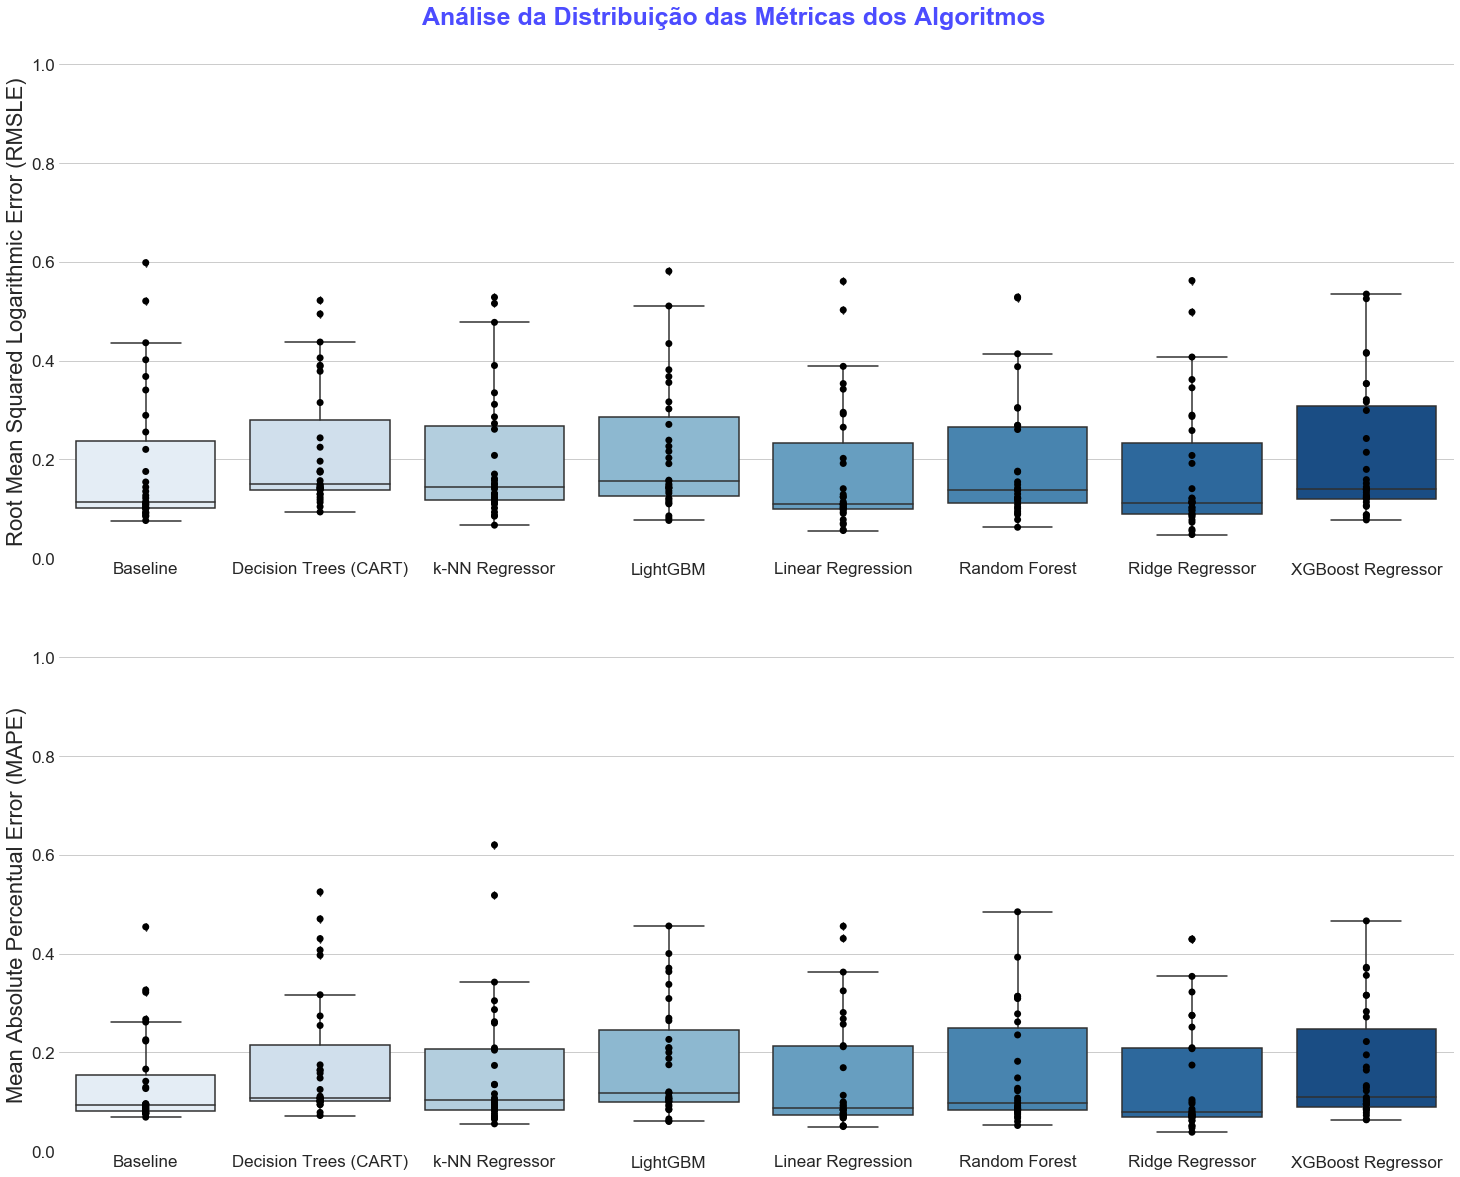

In [115]:
fig , ax = plt.subplots(ncols=1,nrows=2,figsize=(25,20))

fig.suptitle('Análise da Distribuição das Métricas dos Algoritmos',fontsize=25,weight='bold',color='blue',y=0.92,alpha=0.7)

sns.set_style("darkgrid")

sns.boxplot(data=ANL_RMSLE,palette="Blues",ax=ax[0])
sns.stripplot(data=ANL_RMSLE, color="black", jitter=0, size=7,ax=ax[0])
ax[0].set_ylim(0,1)
ax[0].set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax[0].set_xticklabels(['Baseline','Decision Trees (CART)','k-NN Regressor','LightGBM','Linear Regression','Random Forest','Ridge Regressor','XGBoost Regressor'])
ax[0].tick_params(axis='y',labelsize=17)
ax[0].tick_params(axis='x',labelsize=17)
ax[0].set_xlabel('',fontsize=22)
ax[0].set_ylabel('Root Mean Squared Logarithmic Error (RMSLE)',fontsize=22)

sns.boxplot(data=ANL_MAPE,palette="Blues",ax=ax[1])
sns.stripplot(data=ANL_MAPE, color="black", jitter=0, size=7,ax=ax[1])
ax[1].set_ylim(0,1)
ax[1].set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax[1].set_xticklabels(['Baseline','Decision Trees (CART)','k-NN Regressor','LightGBM','Linear Regression','Random Forest','Ridge Regressor','XGBoost Regressor'])
ax[1].tick_params(axis='y',labelsize=17)
ax[1].tick_params(axis='x',labelsize=17)
ax[1].set_xlabel('',fontsize=22)
ax[1].set_ylabel('Mean Absolute Percentual Error (MAPE)',fontsize=22)

plt.show()

## Analisando o RMSLE também em comparação com essa mesma análise feita anteriormente temos que o algoritmo de k-NN Regressor melhorou bastante, uma vez que ele apresenta boa mediana além de ter uma distribuição abaixo da mediana bem compacta, evidenciando a baixa variabilidade em erros menores.

## Visualizando Métricas por Estado
## MAPE

In [116]:
ms['MEAN_SEM_BASE'] = ms.iloc[:,1:].transpose().mean()
ms['MEAN_ALL'] = ms.transpose().mean()
#Visualizando o MAPE (%) de cada algoritmo por estado
ms.style.background_gradient(cmap="hot_r",vmin=0,vmax=.5)

In [117]:
ms2['MEAN_SEM_BASE'] = ms2.iloc[:,1:].transpose().mean()
ms2['MEAN_ALL'] = ms2.transpose().mean()
#Visualizando o RSLE de cada algoritmo por estado
ms2.style.background_gradient(cmap="hot_r",vmin=0,vmax=.5)

## Visualizando Graficamente o RSLE por Estado
### Com finalidade de inferir se o melhor algoritmo escolhido pode ser trocado por outro que apresenta melhor métrica de forma significativa para um determinado estado.

In [118]:
ms2 = ms2.rename(columns={'BASE_RSLE':'Baseline','RF_RSLE':'Random Forest','KNN_RSLE':'k-NN Regressor','LR_RSLE':'Linear Regression',
                          'XGB_RSLE':'XGBoost','CART_RSLE':'Decision Trees','LGBM_RSLE':'LightGBM','RID_RSLE':'Ridge Regressor'})
ms2.drop(columns=['MEAN_SEM_BASE','MEAN_ALL'],inplace=True)

Lista de estados com os melhores algoritmos:

Baseline: ['Amapá', 'Amazonas', 'Espírito Santo', 'Pernambuco', 'Rondônia', 'São Paulo']
Random Forest: ['Alagoas', 'Maranhão', 'Mato Grosso', 'Rio Grande do Sul', 'Tocantins']
k-NN Regressor: ['Distrito Federal', 'Minas Gerais', 'Roraima', 'Santa Catarina', 'Sergipe']
Linear Regression: ['Paraíba', 'Piauí', 'Rio de Janeiro']
XGBoost: ['Rio Grande do Norte']
Decision Trees:[]
LightGBM: []
Ridge Regressor:['Acre', 'Bahia', 'Ceará', 'Goiás', 'Mato Grosso do Sul', 'Paraná', 'Pará']



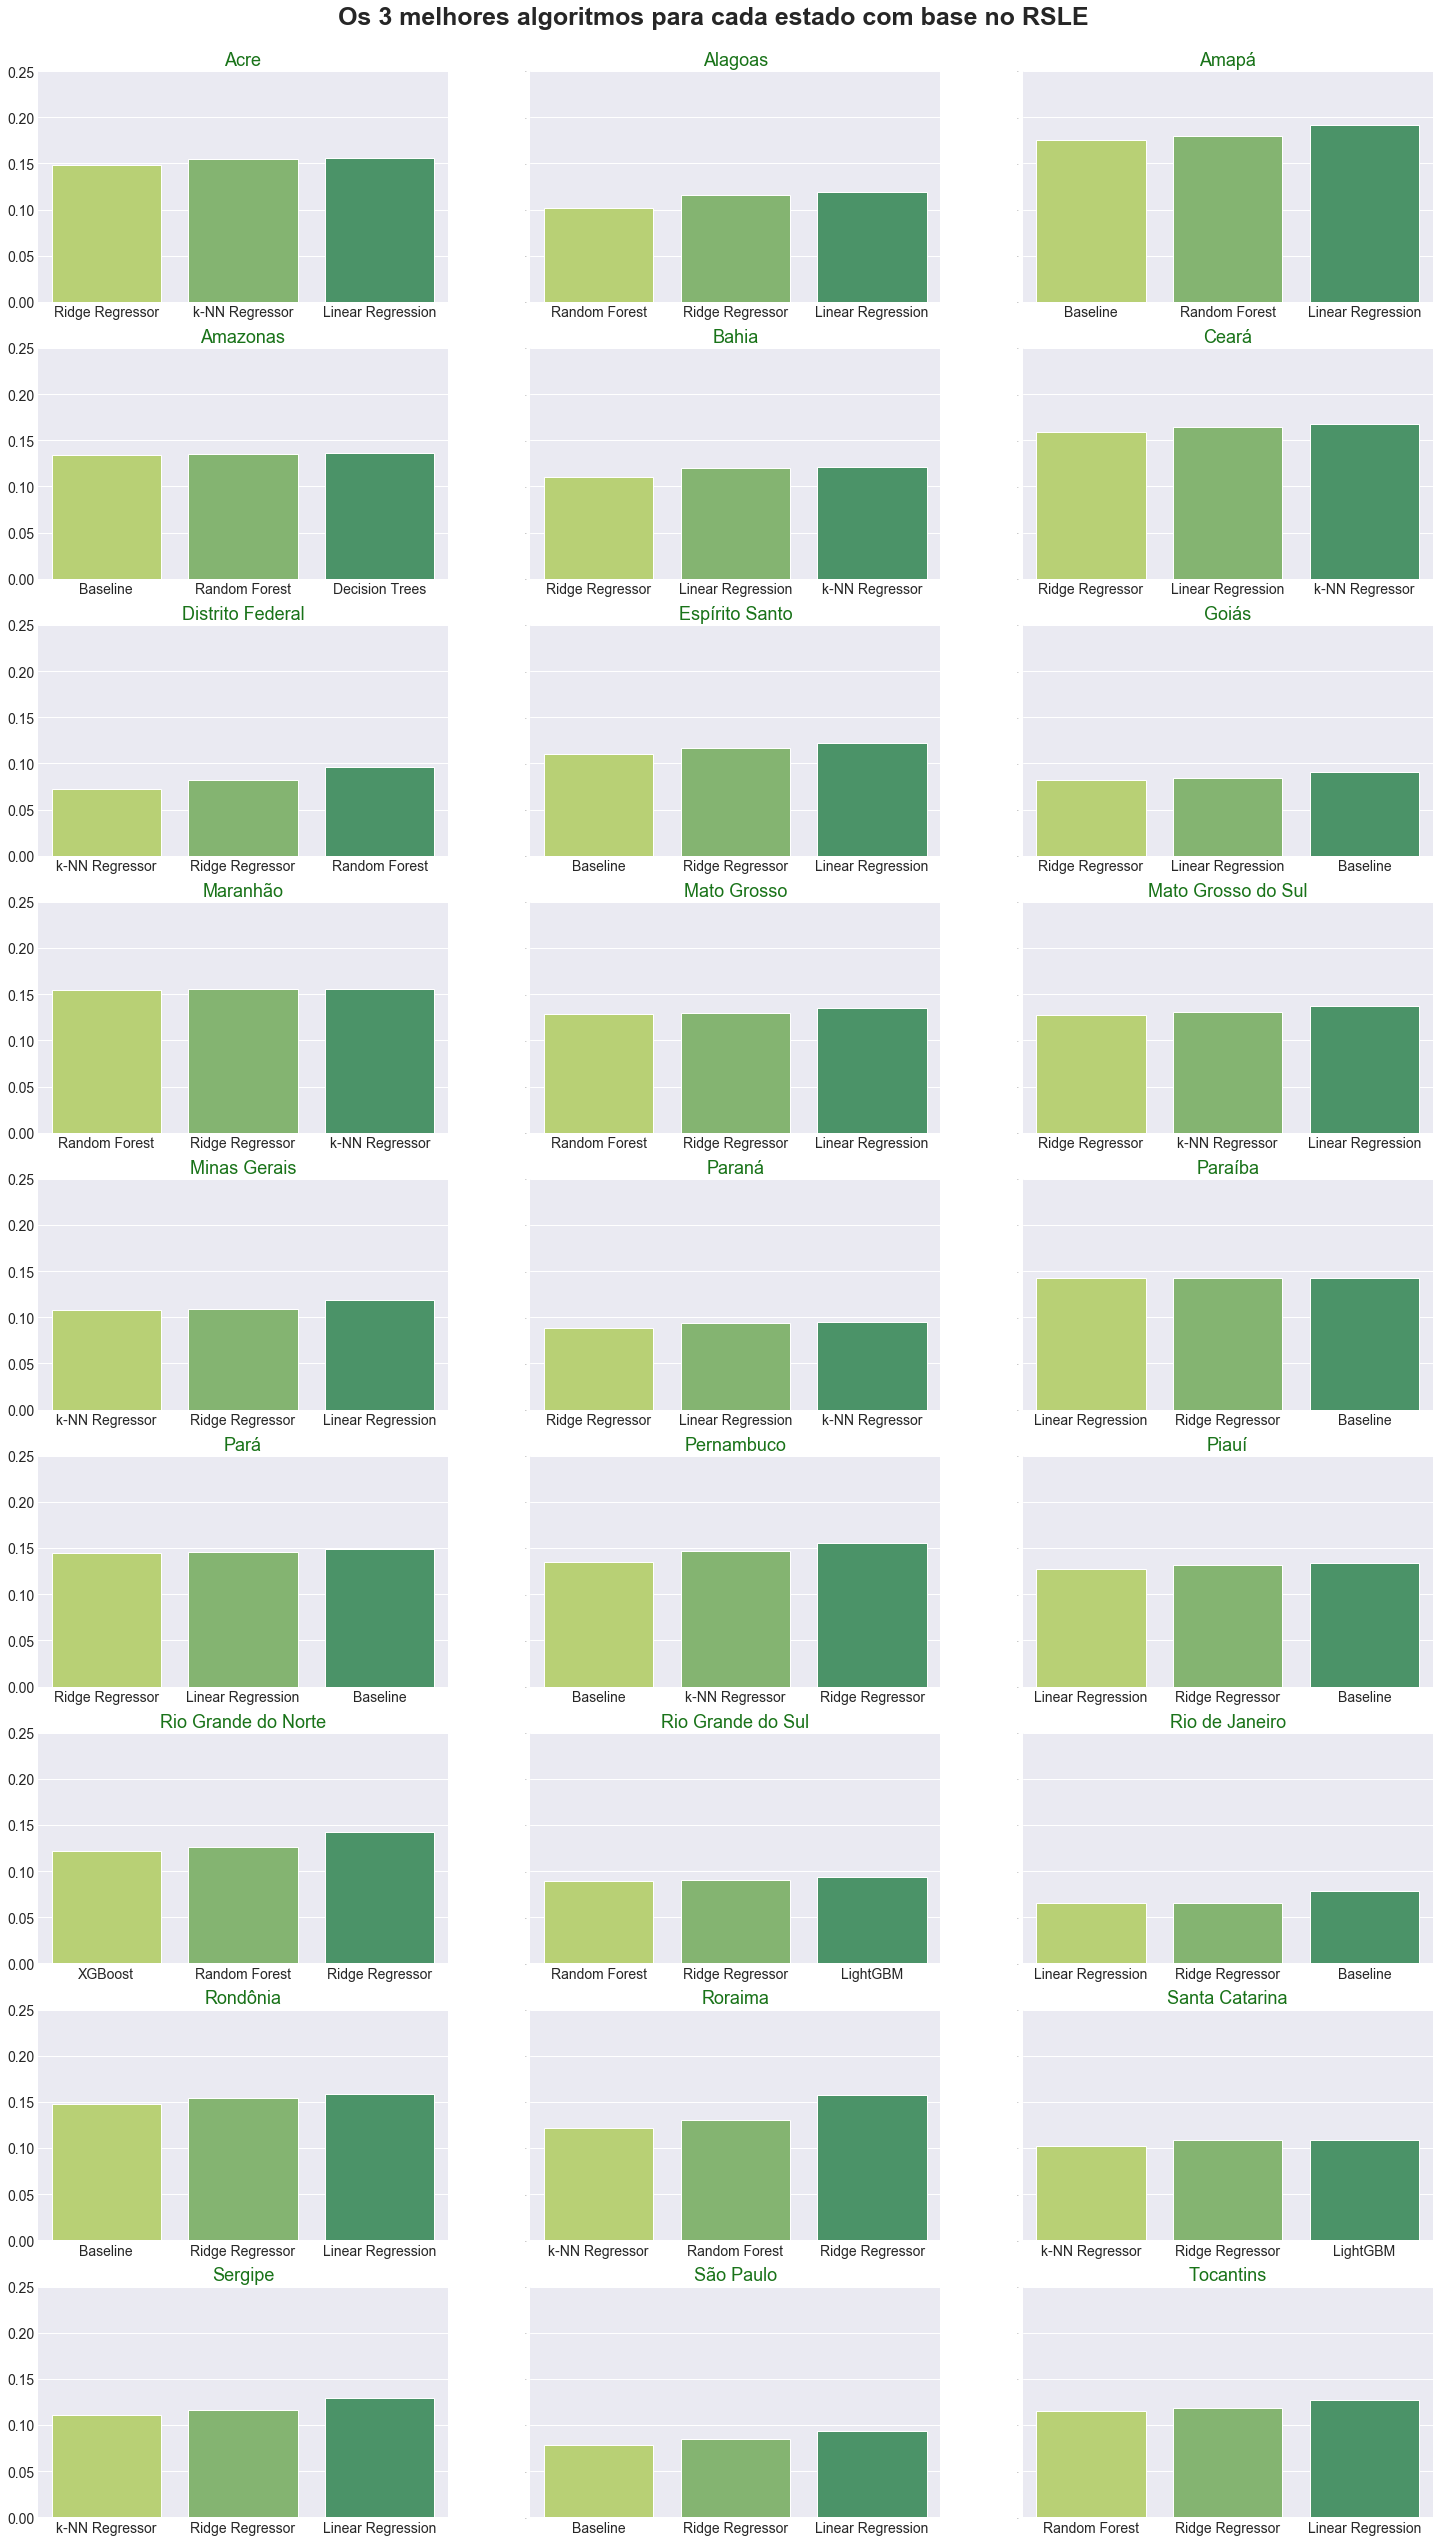

In [119]:
BASE, RF, KNN, LR, XGB, CART, LGBM, RID = [],[],[],[],[],[],[],[]
best_alg = 3
fig , ax = plt.subplots(nrows=9,ncols=3,figsize=(25,45))
fig.suptitle('Os {} melhores algoritmos para cada estado com base no RSLE'.format(best_alg),weight='bold',fontsize=25,y=.9)

estados = ['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará','Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
           'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Paraná','Paraíba', 'Pará', 'Pernambuco', 'Piauí', 'Rio Grande do Norte',
           'Rio Grande do Sul', 'Rio de Janeiro', 'Rondônia', 'Roraima','Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins']

l = 0
c = 0
for est in range(0,len(estados)):
    
    if est%3 == 0 and est!=0:
        c=0
        l=l+1
                                        
    a=ms2.transpose().sort_values(by='{}'.format(estados[est]),ascending=True).head(best_alg).loc[:,['{}'.format(estados[est])]]
    sns.barplot(x=a.index,y=a.iloc[:,0],ax=ax[l,c],palette='summer_r')
    ax[l,c].set_title('{}'.format(estados[est]),fontsize=18,color='darkgreen',alpha=.9)
    ax[l,c].set_ylabel('')
    ax[l,c].set_ylim(0,0.25)
    ax[l,c].set_yticks([0.00,0.05,0.10,0.15,0.20,0.25])
    ax[l,c].tick_params(axis='x',labelsize=14)
    
    if a.index[0] == 'Baseline': BASE.append(estados[est])
    elif a.index[0] == 'Random Forest': RF.append(estados[est])
    elif a.index[0] == 'k-NN Regressor': KNN.append(estados[est])        
    elif a.index[0] == 'Linear Regression': LR.append(estados[est])        
    elif a.index[0] == 'XGBoost': XGB.append(estados[est])
    elif a.index[0] == 'Decision Trees': CART.append(estados[est])        
    elif a.index[0] == 'LightGBM': LGBM.append(estados[est])
    elif a.index[0] == 'Ridge Regressor': RID.append(estados[est])       
        
    if c==0:
        ax[l,c].tick_params(axis='y',labelsize=14)
    else:
        ax[l,c].tick_params(axis='y',labelsize=0)
  
    c=c+1
    
print("Lista de estados com os melhores algoritmos:\n\nBaseline: {}\nRandom Forest: {}\nk-NN Regressor: {}\nLinear Regression: {}\nXGBoost: {}\nDecision Trees:{}\nLightGBM: {}\nRidge Regressor:{}\n".format(BASE,RF,KNN,LR,XGB,CART,LGBM,RID))

plt.show()

## Com base nos resultados obtidos, podemos escolher o melhor algoritmo para cada estado com finalidade de ter a melhor previsão pra cada um. Entretanto, algumas diferenças da métrica entre os melhores algoritmos não são tão significativas a ponto de melhorar consideravelmente a previsão. Logo, escolher um algoritmo base com finalidade de prever todos os estados e em sequência analisar onde ele não é mais efetivo, e assim compará-lo com os outros e decidir se a escolha de algum outro algoritmo ocasionará em uma melhora significativa.
## Portanto, a partir todas as análises feitas até o momento o meu algoritmo base que vai realizar o forecast para todos os estados será o Ridge Regressor. Assim sendo, realizaremos um treino & validação e análise das métricas para ele de forma específica. Escolheremos também mais dois algoritmos para forecast que serão a Linear Regression e o XGBoost Regressor, com finalidade de visualizar os resultados dos mesmos.

# 

## Ridge Regressor

In [120]:
models=[Ridge(random_state=0,alpha=0.03,normalize=True,fit_intercept=True)]

name_mod=['RID']

feat_mod = [['Cases_Last_Day', 'UF_CAT_TO', 'UF_CAT_SE', 'UF_CAT_AL', 'UF_CAT_RO', 'UF_CAT_GO', 'UF_CAT_MS', 'UF_CAT_PI', 'UF_CAT_AC', 'UF_CAT_PR']]

#Criando dataframe para análise da performance do modelo
analytics=pd.DataFrame(columns=['date','Day','target','predict','MAPE','RMSE','RMSLE'])

for num in range(0,len(models)):
    
    error=[]
    error2=[]
    analytics=pd.DataFrame(columns=['date','Day','target','predict_{}'.format(name_mod[num]),'MAPE_{}'.format(name_mod[num]),'RMSE_{}'.format(name_mod[num]),'RMSLE_{}'.format(name_mod[num])])
    
    for i in range(mn,mx+1):
        if date_state[date_state['Day']==i].shape[0] !=0:

            train=date_state[date_state['Day']<i]
            test=date_state[date_state['Day']==i]

            sel=feat_mod[num]
            X_train=train.loc[:,sel].values
            y_train=train['cases'].values
            X_test=test.loc[:,sel].values
            y_test=test['cases'].values

            model=models[num]
            model.fit(X_train,y_train)

            y_pred=model.predict(X_test)

            y_state=test['state'].values
            aux=MAPE_STATE(y_pred,y_test,y_state)
            aux=aux.set_index(aux.state).drop(columns='state')
            if(i==mn):
                m=aux
            else:
                m=m.merge(aux,how='outer',on='state')
                
            e = MAPE(y_pred,y_test)
            error.append(e)
            e2 = RMSLE(y_pred,y_test)
            error2.append(e2)              

            #Guardando predicts, targets e outras informações para análise do desempenho do modelo
            att=pd.DataFrame({'date':test.date.max(),'Day':test.Day.max(),'target':y_test.mean(),'predict_{}'.format(name_mod[num]):y_pred.mean(),
                              'MAPE_{}'.format(name_mod[num]):MAPE(y_pred,y_test),'RMSLE_{}'.format(name_mod[num]):RMSLE(y_pred,y_test),'RMSE_{}'.format(name_mod[num]):RMSE(y_pred,y_test)},index=[0])

            #Atualizando dataframe de análise
            analytics=pd.concat([analytics,att]).reset_index(drop=True,level=0)        

    #Imprimir mensagem para cada algorimo mostrando os scores
    msg=print("\n{}\nMédia do Erro MAPE: {:.4f}%\nMédia do Erro RMSLE: {:.4f}".format(name_mod[num],np.mean(error)*100,np.mean(error2)))
    
    #Salvando o modelo
    joblib.dump(model,'model_{}.pkl'.format(name_mod[num]))
    
    if name_mod[num] == 'RID':
        er_lr=pd.DataFrame(error,columns=['{}_MAPE'.format(name_mod[num])]); er2_lr=pd.DataFrame(error2,columns=['{}_RMSLE'.format(name_mod[num])]);
        m_lr=pd.DataFrame(m.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_MAPE'.format(name_mod[num])]); #ms=pd.concat([ms,m_lr],axis=1);
        m2_lr=pd.DataFrame(m2.iloc[:,list(range(2,3*(mx+1-mn),3))].transpose().mean(),columns=['{}_RSLE'.format(name_mod[num])]); #ms2=pd.concat([ms2,m2_lr],axis=1);
        an_lr=analytics; #ANALYTICS=ANALYTICS.merge(an_lr.iloc[:,[1,3,4,5,6]],how='left',on='Day');
        msg;


RID
Média do Erro MAPE: 14.2978%
Média do Erro RMSLE: 0.1747


## Load Model

In [121]:
#Carregando e visualizando os parâmetros do modelo
model=joblib.load('model_RID.pkl')
print(model,'\n\n',model.coef_)

Ridge(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=0, solver='auto', tol=0.001) 

 [ 1.04606569 -9.61355925 -9.54731134 -9.17904793 -9.12759813 -7.53771802
 -9.08982765 -9.31095753 -9.09178942 -4.21454238]


## Análise da Performance de Treino e Validação

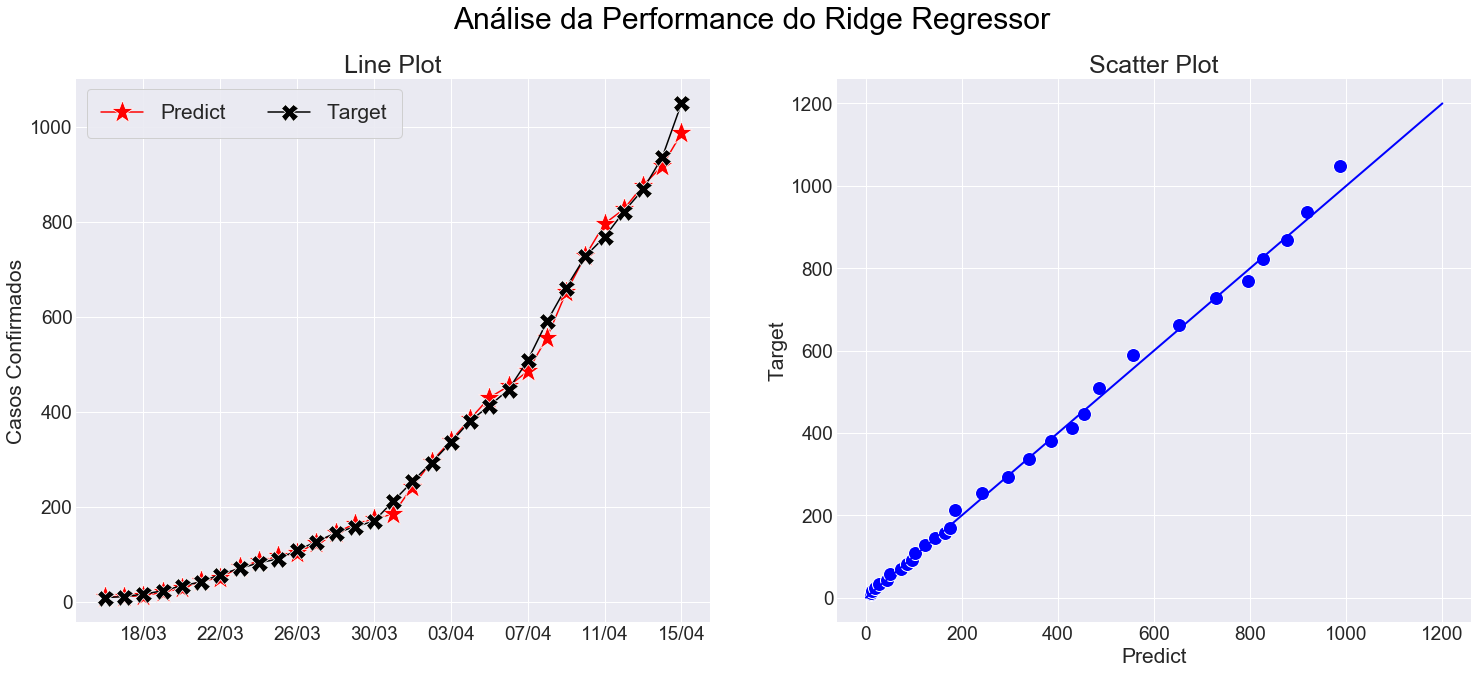

In [123]:
fig , ax = plt.subplots(ncols=2,nrows=1,figsize=(25,10))
fig.suptitle("Análise da Performance do Ridge Regressor",fontsize=30,y=0.98,color="black")

#Definindo tamanho das fontes
sizelabel , sizetick , sizetit = 21 , 19 , 25

#Personalizando o formato da data mostrada nos ticks
dateview=[pd.to_datetime(an_rid.date)[x].strftime("%d/%m") for x in range(0,len(an_rid.date))]

sns.set_style("darkgrid")
sns.lineplot(x=an_rid.date,y=an_rid.predict_RID,color="red",marker='*',markersize=24,ax=ax[0],linestyle=':',label='Predict')
sns.lineplot(x=an_rid.date,y=an_rid.target,color="black",marker='X',markersize=17,ax=ax[0],label='Target')
ax[0].set_ylabel('Casos Confirmados',fontsize=sizelabel)
ax[0].set_title('Line Plot',fontsize=sizetit)
ax[0].set_xlabel('',fontsize=sizelabel)
ax[0].tick_params(axis='x',labelsize=sizetick)
ax[0].tick_params(axis='y',labelsize=sizetick)
ax[0].set_xticks(an_rid.date[::-4])
ax[0].set_xticklabels(dateview[::-4])
ax[0].legend(ncol=2,fontsize=21,loc="upper left",frameon=True,framealpha=0.90,borderpad = 0.7)

ax[1].plot(an_rid.predict_RID,an_rid.target,color="blue",marker='o',linestyle='none',markersize=14, markeredgecolor="white", markeredgewidth=1) #line_kws={"color":"black","alpha":0.7,"lw":3}
plt.plot([0, 1200], [0, 1200], color="blue", lw=2, linestyle='solid', label="_not in legend")
ax[1].set_ylabel('Target',fontsize=sizelabel)
ax[1].set_title('Scatter Plot',fontsize=sizetit)
ax[1].set_xlabel('Predict',fontsize=sizelabel)
ax[1].tick_params(axis='x',labelsize=sizetick)
ax[1].tick_params(axis='y',labelsize=sizetick)

plt.show()

## Análise das Métricas
## MAPE


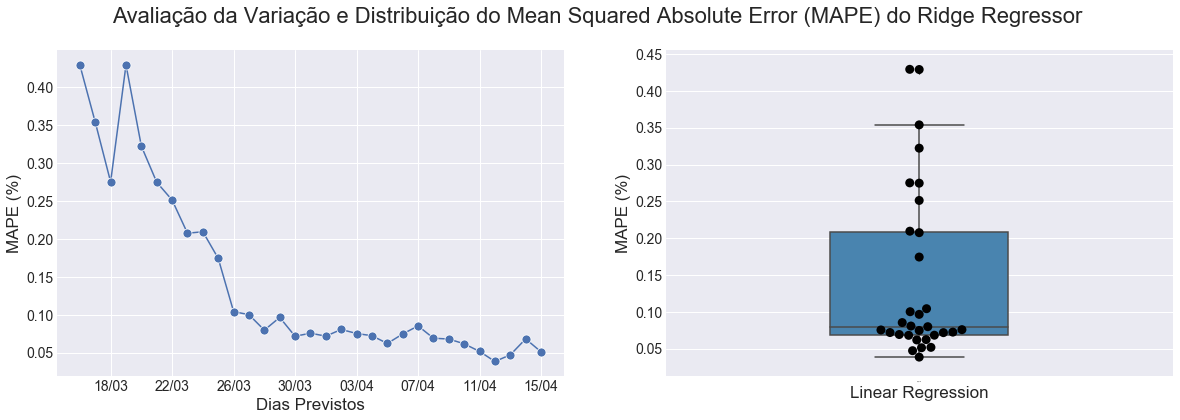

In [124]:
fig , ax = plt.subplots(figsize=(20,6),nrows=1,ncols=2)

sns.set_style("darkgrid")
fig.suptitle("Avaliação da Variação e Distribuição do Mean Squared Absolute Error (MAPE) do Ridge Regressor",fontsize=22)

#Gráfico de Linhas
sns.lineplot(x=an_rid.date,y=an_rid.MAPE_RID,palette=["blue"],marker='o',linestyle='-',markersize=9,ax=ax[0],legend=False)
ax[0].set_ylabel("MAPE (%)",size=17)
ax[0].set_xlabel("Dias Previstos",size=17)
ax[0].tick_params(axis='x',labelsize=14)
ax[0].tick_params(axis='y',labelsize=14)
ax[0].set_xticks(an_rid.date[::-4])
ax[0].set_xticklabels(dateview[::-4])

#Boxplot
sns.boxplot(data=er_rid, palette="Blues_d",orient="v",width=0.35,ax=ax[1])
sns.swarmplot(data=er_rid, palette=["black"],orient="v",color=.20,size=9,ax=ax[1])
ax[1].set_ylabel("MAPE (%)",size=17)
ax[1].set_xlabel("Linear Regression",size=17)
ax[1].tick_params(axis='x',labelsize=0)
ax[1].tick_params(axis='y',labelsize=14)
plt.show()

## RMSLE

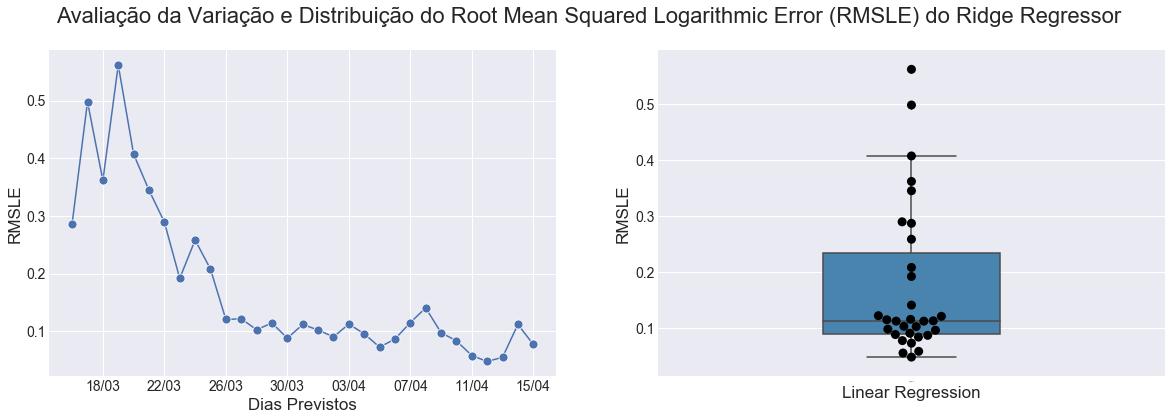

In [125]:
fig , ax = plt.subplots(figsize=(20,6),nrows=1,ncols=2)

sns.set_style("darkgrid")
fig.suptitle("Avaliação da Variação e Distribuição do Root Mean Squared Logarithmic Error (RMSLE) do Ridge Regressor",fontsize=22)

#Gráfico de Linhas
sns.lineplot(x=an_rid.date,y=an_rid.RMSLE_RID,palette=["blue"],marker='o',linestyle='-',markersize=9,ax=ax[0],legend=False)
ax[0].set_ylabel("RMSLE",size=17)
ax[0].set_xlabel("Dias Previstos",size=17)
ax[0].tick_params(axis='x',labelsize=14)
ax[0].tick_params(axis='y',labelsize=14)
ax[0].set_xticks(an_rid.date[::-4])
ax[0].set_xticklabels(dateview[::-4])

#Boxplot
sns.boxplot(data=er2_rid, palette="Blues_d",orient="v",width=0.35,ax=ax[1])
sns.swarmplot(data=er2_rid, palette=["black"],orient="v",color=.20,size=9,ax=ax[1])
ax[1].set_ylabel("RMSLE",size=17)
ax[1].set_xlabel("Linear Regression",size=17)
ax[1].tick_params(axis='x',labelsize=0)
ax[1].tick_params(axis='y',labelsize=14)
plt.show()

## RSLE & MAPE por Estado

In [126]:
pd.concat([m2_rid,m_rid],axis=1).sort_values(by='RID_RSLE',ascending=True).style.background_gradient(cmap='hot_r',vmin=0,vmax=.5)

# 

# Forecasts

In [127]:
#Carregando, limpando e ajustando o dataset utilizado
date_state=pd.read_csv('date_state_covidbr.csv',sep=';')
date_state=date_state.fillna(0)
date_state.date = pd.to_datetime(date_state.date)

date_state.shape

(2079, 87)

## Como seria a previsão da Baseline ?

In [128]:
#Total de casos confirmados no Brasil até o último dia do dataset
base_fore = date_state.groupby(['date','state'])[['cases']].sum().reset_index().groupby('date').sum().reset_index()

att = base_fore.cases.max()
prev = []
dias = 7
for i in range(0,dias):
    if i == 0:
        p = att*1.16
    else:
        p = p*1.16
        
    prev.append(p)
    
print(prev)

[32851.2, 38107.39199999999, 44204.57471999999, 51277.30667519999, 59481.67574323198, 68998.74386214909, 80038.54288009294]


## Ridge Regressor

In [129]:
#Carregando o modelo
model = joblib.load('model_RID.pkl')
model

Ridge(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=0, solver='auto', tol=0.001)

In [130]:
#Selecionando estados para previsão
ufs=['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT',
       'MS', 'MG', 'PR', 'PB', 'PA', 'PE', 'PI', 'RN', 'RS', 'RJ', 'RO',
       'RR', 'SC', 'SE', 'SP', 'TO']

In [131]:
#Total de casos confirmados no Brasil até o último dia do dataset
date_state.groupby('state').last().cases.sum()

28320

In [123]:
#Variáveis do Modelo
#['Cases_Last_Day', 'UF_CAT_TO', 'UF_CAT_SE', 'UF_CAT_AL', 'UF_CAT_RO', 'UF_CAT_GO', 'UF_CAT_MS', 'UF_CAT_PI', 'UF_CAT_AC', 'UF_CAT_PR']

In [135]:
tot_cases=[]
allforecast=date_state.copy()

ufs=['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT','MS', 'MG', 'PR', 'PB', 'PA', 'PE', 'PI', 'RN', 'RS', 'RO','RR', 'SC', 'SE', 'TO', 'RJ', 'SP']
#ufs=['SP']

for i in range(0,len(ufs)):  
    
    #Selecionando as features finais do modelo e as variáveis dia/data para definir a previsão e estado/uf para especificidade
    forecast=date_state[['Day','date','state','UF','cases','Cases_Last_Day', 'UF_CAT_TO', 'UF_CAT_RO', 'UF_CAT_AL', 'UF_CAT_SE',
                         'UF_CAT_AC', 'UF_CAT_MS', 'UF_CAT_PI', 'UF_CAT_GO','UF_CAT_PR']]
    
    #Selecionando dados a partir do primeiro caso confirmado no Brasil
    forecast = forecast[forecast['date']>='2020-02-26'].reset_index(drop=True,level=0)

    #Definindo a UF do estado para previsão
    uf=ufs[i]
    forecast=forecast[forecast['UF']==uf]

    #Definindo dias para previsão
    dias=7

    for i in range(0,dias):

        #Preparando os dados para a previsão
        #'Cases_Last_Day'
        cld=forecast.groupby('state').cases.last()[0]       
        #'UF_CAT_SE'
        ufse = 1 if uf=='SE' else 0   
        #'UF_CAT_AL'
        ufal = 1 if uf=='AL' else 0             
        #'UF_CAT_PI'
        ufpi = 1 if uf=='PI' else 0
        #'UF_CAT_MS'
        ufms = 1 if uf=='MS' else 0
        #'UF_CAT_TO'
        ufto = 1 if uf=='TO' else 0  
        #'UF_CAT_GO'
        ufgo = 1 if uf=='GO' else 0         
        #'UF_CAT_AC'
        ufac = 1 if uf=='AC' else 0 
        #'UF_CAT_RO'
        ufro = 1 if uf=='RO' else 0         
        #'UF_CAT_PR'
        ufpr = 1 if uf=='PR' else 0 
        
        #Previsão para o próximo dia e ajuste no dataset com as informações
        dia=forecast.Day.max()+1
        estado=forecast.state.tail(1).values[0]
        
        prev=model.predict([[cld,ufto,ufse,ufal,ufro,ufgo,ufms,ufpi,ufac,ufpr]])[0]    
        
        att=pd.DataFrame({'Day':dia,'date':pd.date_range(date_state.date.max(), periods=i+2).tolist()[-1],'state':estado,'UF':uf,
                          'cases':prev,'Cases_Last_Day':forecast.cases.tail(1).values[0],
                          'UF_CAT_TO':np.nan,'UF_CAT_RO':np.nan,'UF_CAT_AL':np.nan,'UF_CAT_SE':np.nan,
                          'UF_CAT_AC':np.nan,'UF_CAT_MS':np.nan,'UF_CAT_PI':np.nan,'UF_CAT_GO':np.nan,'UF_CAT_PR':np.nan},index=[0])
        
        forecast=pd.concat([forecast,att]).reset_index(level=0,drop=True)
     
        forecast['UF_CAT_SE'] = 1 if uf=='SE' else 0
        forecast['UF_CAT_PR'] = 1 if uf=='PR' else 0
        forecast['UF_CAT_AL'] = 1 if uf=='AL' else 0
        forecast['UF_CAT_RO'] = 1 if uf=='RO' else 0        
        forecast['UF_CAT_PI'] = 1 if uf=='PI' else 0        
        forecast['UF_CAT_MS'] = 1 if uf=='MS' else 0
        forecast['UF_CAT_TO'] = 1 if uf=='TO' else 0
        forecast['UF_CAT_GO'] = 1 if uf=='GO' else 0
        forecast['UF_CAT_AC'] = 1 if uf=='AC' else 0 
        forecast = forecast.fillna(0)

    tot_cases.append(forecast.cases.tail(1).values[0])
    new=forecast[forecast['Day']>date_state.Day.max()] 
    allforecast=pd.concat([allforecast,new]).reset_index(level=0,drop=True)

print("\nTotal de casos confirmados no Brasil para daqui {} dias : {}\n".format(dias,sum(tot_cases)))
forecast.tail(dias+3)


Total de casos confirmados no Brasil para daqui 7 dias : 40378.507251771254



Day       date      state  UF         cases  Cases_Last_Day  UF_CAT_TO  \
47   75 2020-04-13  São Paulo  SP   8895.000000     8755.000000          0   
48   76 2020-04-14  São Paulo  SP   9371.000000     8895.000000          0   
49   77 2020-04-15  São Paulo  SP  11043.000000     9371.000000          0   
50   78 2020-04-16  São Paulo  SP  11561.739830    11043.000000          0   
51   79 2020-04-17  São Paulo  SP  12104.375769    11561.739830          0   
52   80 2020-04-18  São Paulo  SP  12672.008607    12104.375769          0   
53   81 2020-04-19  São Paulo  SP  13265.789845    12672.008607          0   
54   82 2020-04-20  São Paulo  SP  13886.924026    13265.789845          0   
55   83 2020-04-21  São Paulo  SP  14536.671183    13886.924026          0   
56   84 2020-04-22  São Paulo  SP  15216.349392    14536.671183          0   

    UF_CAT_RO  UF_CAT_AL  UF_CAT_SE  UF_CAT_AC  UF_CAT_MS  UF_CAT_PI  \
47          0          0          0          0          0          0   
48          0          0          0          0          0          0   
49          0          0          0          0          0          0   
50          0          0          0          0          0          0   
51          0          0          0          0          0          0   
52          0          0          0          0          0          0   
53          0          0          0          0          0          0   
54          0          0          0          0          0          0   
55          0          0          0          0          0          0   
56          0          0          0          0          0          0   

    UF_CAT_GO  UF_CAT_PR  
47          0          0  
48          0          0  
49          0          0  
50          0          0  
51          0          0  
52          0          0  
53          0          0  
54          0          0  
55          0          0  
56          0          0

## Previsão do total de casos em São Paulo para os próximos 7 dias

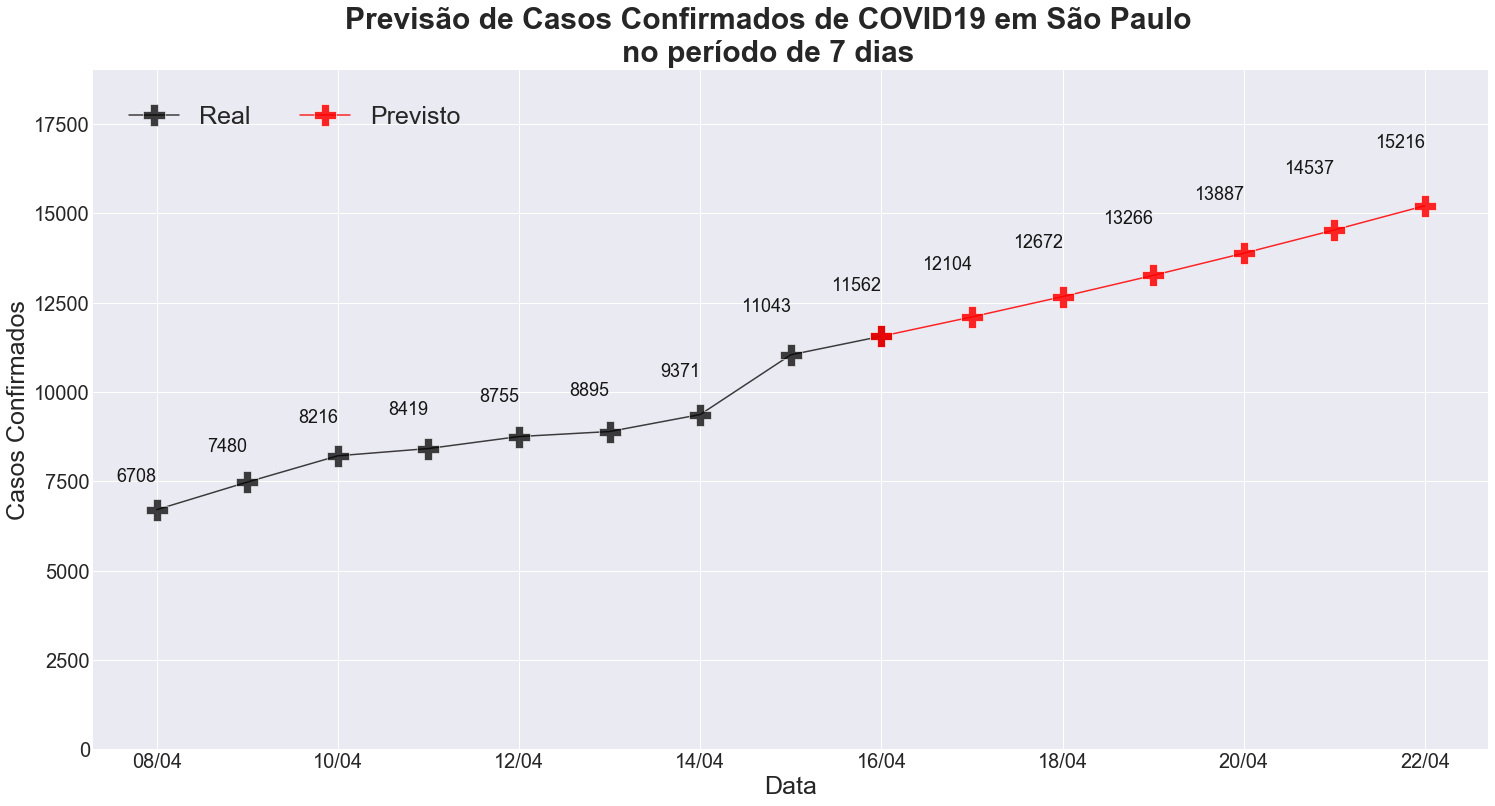

In [136]:
#Visualizando progressão do COVID19 no último estado da lista ufs e do dataframe forecast

#Definindo o período para mostrar no gráfico
ult_dias = 15
fore = forecast[forecast['date']>forecast[forecast['Day']==forecast.Day.max()-ult_dias].date.tail(1).values[0]].reset_index(drop=True)

#Configurando o formato da data que desejo mostrar no gráfico
dateview = [fore.date[x].strftime("%d/%m") for x in range(0,len(fore.date))]

fig , ax = plt.subplots(figsize=(25,12.5))
fig.suptitle("Previsão de Casos Confirmados de COVID19 em {}\nno período de {} dias".format(fore.state[0],dias),fontsize=30,y=0.95,weight='bold')

sns.set_style("darkgrid")
sns.lineplot(x=fore.date[:-dias+1],y=fore.cases[:-dias+1],color="black",marker='P',markersize=22,label="Real",alpha=0.75)
sns.lineplot(x=fore.date[-dias:],y=fore.cases[-dias:],color="red",marker='P',markersize=22,label="Previsto",alpha=0.85)
ax.set_ylim(0,fore.cases.max()*1.25)
ax.set_xlabel('Data',fontsize=25)
ax.set_ylabel('Casos Confirmados',fontsize=25)
ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)
ax.set_xticks(fore.date[::-2])
ax.set_xticklabels(dateview[::-2])
ax.legend(ncol=2,fontsize=25,borderpad=0.925,loc='upper left')
        
#Exibindo valores de todos os dias
for i in range(1,ult_dias+1):
    ax.annotate('{:.0f}'.format(fore.cases.tail(i).values[0]),xy=(fore.date.tail(i).values[0],fore.cases.tail(i).values[0]*1.10),
                size=18,ha='right',va='bottom',color='black',alpha=.9)

plt.show()

## Previsão para o total de casos no Brasil para os próximos 7 dias

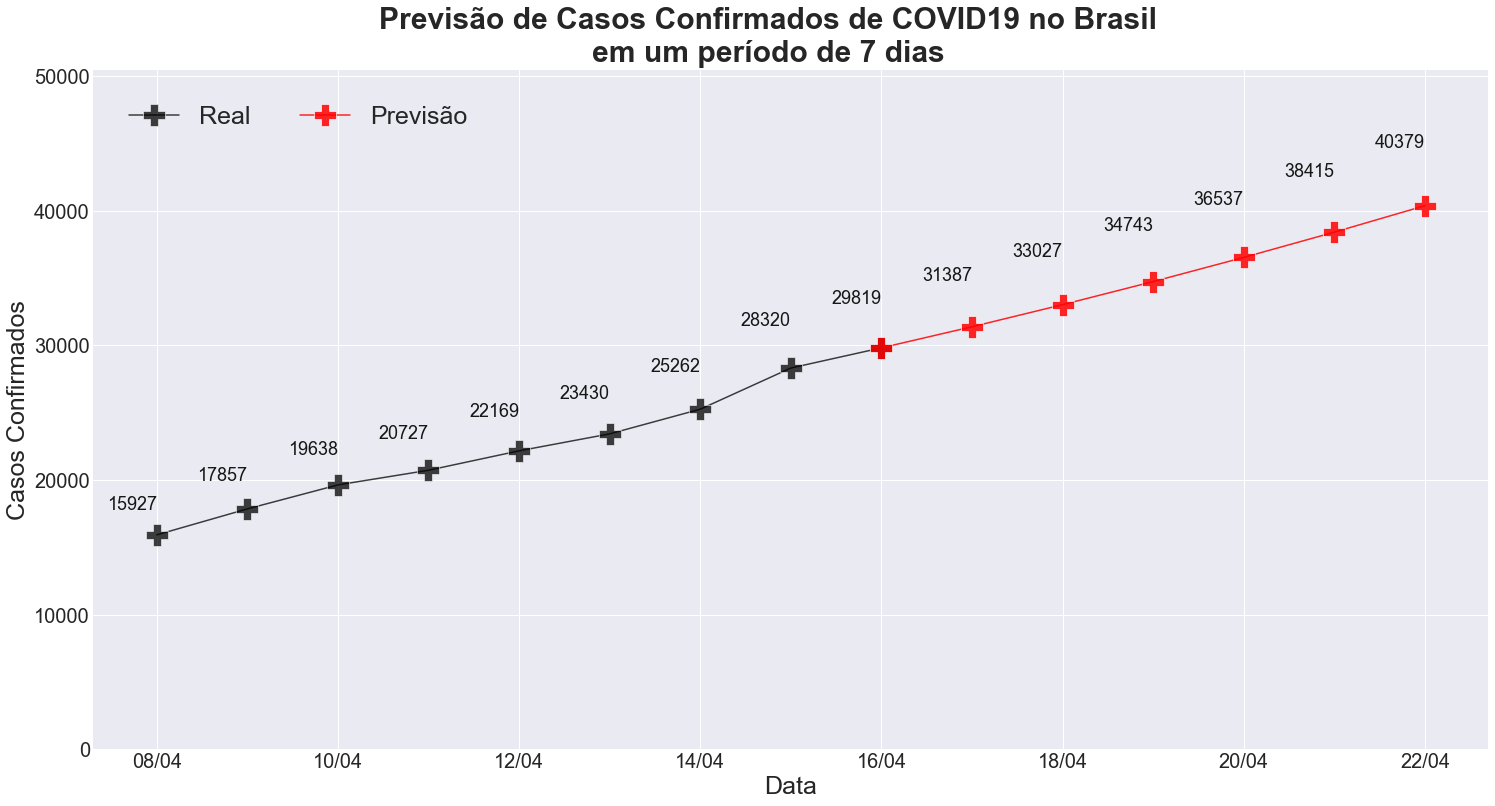

In [137]:
#Soma de casos confirmado no Brasil
br_forecast = allforecast.groupby(['date'])[['cases']].sum().reset_index()

#Definindo o período para mostrar no gráfico
ult_dias = 15
br_forecast = br_forecast[br_forecast['date']>allforecast[allforecast['Day']==allforecast.Day.max()-ult_dias].date.tail(1).values[0]].reset_index(drop=True)

#Configurando o formato da data que desejo mostrar no gráfico
dateview = [br_forecast.date[x].strftime("%d/%m") for x in range(0,len(br_forecast.date))]

fig , ax = plt.subplots(figsize=(25,12.5))
fig.suptitle("Previsão de Casos Confirmados de COVID19 no Brasil\nem um período de {} dias".format(dias),fontsize=30,y=0.95,weight='bold')

sns.set_style("darkgrid")
sns.lineplot(x=br_forecast.date[:-dias+1],y=br_forecast.cases[:-dias+1],color="black",marker='P',markersize=22,label="Real",alpha=0.75)
sns.lineplot(x=br_forecast.date[-dias:],y=br_forecast.cases[-dias:],color="red",marker='P',markersize=22,label="Previsão",alpha=0.85)
ax.set_ylim(0,br_forecast.cases.max()*1.25)
ax.set_xlabel('Data',fontsize=25)
ax.set_ylabel('Casos Confirmados',fontsize=25)
ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)
ax.set_xticks(br_forecast.date[::-2])
ax.set_xticklabels(dateview[::-2])
ax.legend(ncol=2,fontsize=25,borderpad=0.925,loc='upper left')
        
#Exibindo valores de todos os dias
for i in range(1,ult_dias+1):
    ax.annotate('{:.0f}'.format(br_forecast.cases.tail(i).values[0]),xy=(br_forecast.date.tail(i).values[0],br_forecast.cases.tail(i).values[0]*1.10),
                size=18,ha='right',va='bottom',color='black',alpha=.9)

plt.show()

## Previsão do total de casos por estado nos próximos 7 dias

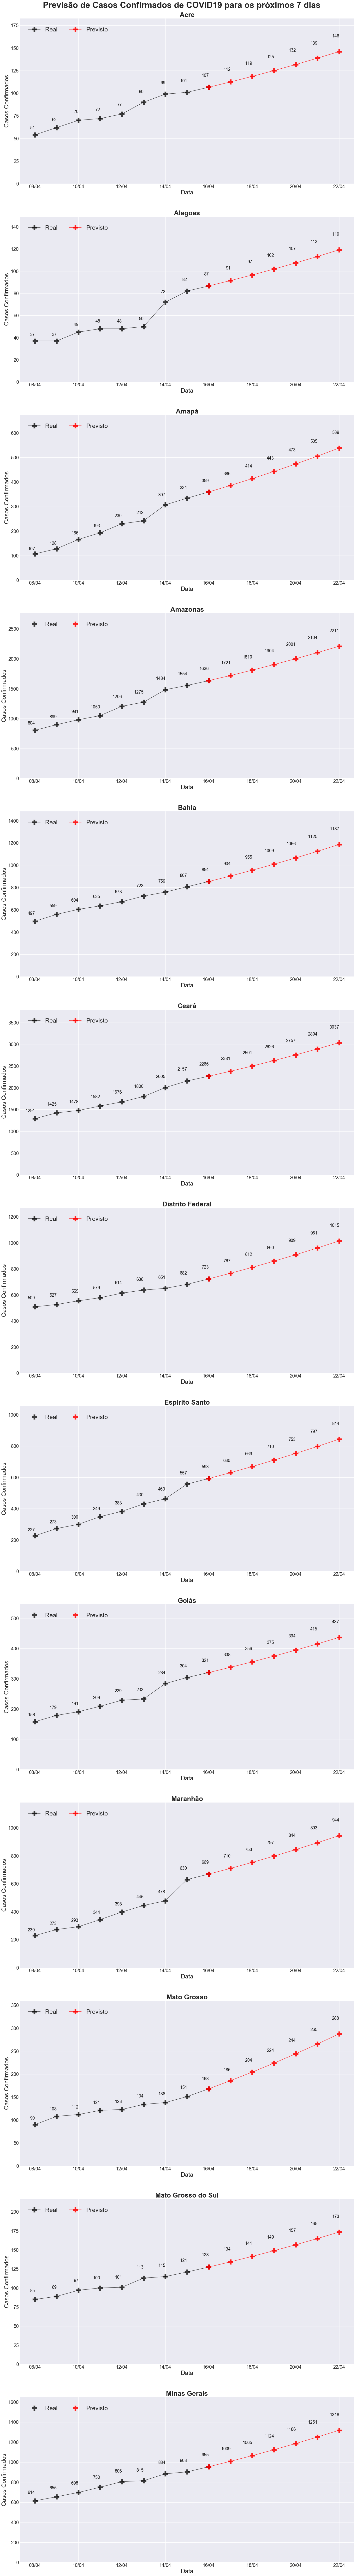

In [138]:
fig , ax = plt.subplots(ncols=1,nrows=13,figsize=(25,195))
fig.suptitle("Previsão de Casos Confirmados de COVID19 para os próximos {} dias".format(dias),fontsize=35,y=0.885,weight='bold')
sns.set_style("darkgrid")

#Selecionando os estados para previsão
estados = ['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará','Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais']
           #, 'Paraná','Paraíba', 'Pará', 'Pernambuco', 'Piauí','Rio Grande do Norte','Rio Grande do Sul',
            #'Rio de Janeiro', 'Rondônia', 'Roraima','Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins']

for est in range(0,len(estados)):
    
    #Definindo o período para mostrar no gráfico
    ult_dias = 15
    fore = allforecast[allforecast['date']>allforecast[allforecast['Day']==allforecast.Day.max()-ult_dias].date.tail(1).values[0]].reset_index(drop=True)
    
    #Selecionando cada estado para forecast
    fore = fore[fore['state']==estados[est]].reset_index(drop=True)

    #Configurando o formato da data que desejo mostrar no gráfico
    dateview = [fore.date[x].strftime("%d/%m") for x in range(0,len(fore.date))]

    sns.lineplot(x=fore.date[:-dias+1],y=fore.cases[:-dias+1],color="black",marker='P',markersize=22,label="Real",alpha=0.75,ax=ax[est])
    sns.lineplot(x=fore.date[-dias:],y=fore.cases[-dias:],color="red",marker='P',markersize=22,label="Previsto",alpha=0.85,ax=ax[est])
    ax[est].set_title("{}".format(estados[est]),fontsize=28,weight='bold')
    ax[est].set_ylim(0,fore.cases.max()*1.25)
    ax[est].set_xlabel('Data',fontsize=25)
    ax[est].set_ylabel('Casos Confirmados',fontsize=25)
    ax[est].tick_params(axis='x',labelsize=20)
    ax[est].tick_params(axis='y',labelsize=20)
    ax[est].set_xticks(fore.date[::-2])
    ax[est].set_xticklabels(dateview[::-2])
    ax[est].legend(ncol=2,fontsize=25,borderpad=0.925,loc='upper left')

    #Exibindo valores de todos os dias
    for i in range(1,ult_dias+1):
        ax[est].annotate('{:.0f}'.format(fore.cases.tail(i).values[0]),xy=(fore.date.tail(i).values[0],fore.cases.tail(i).values[0]*1.10),
                    size=18,ha='right',va='bottom',color='black',alpha=.9)

plt.show()

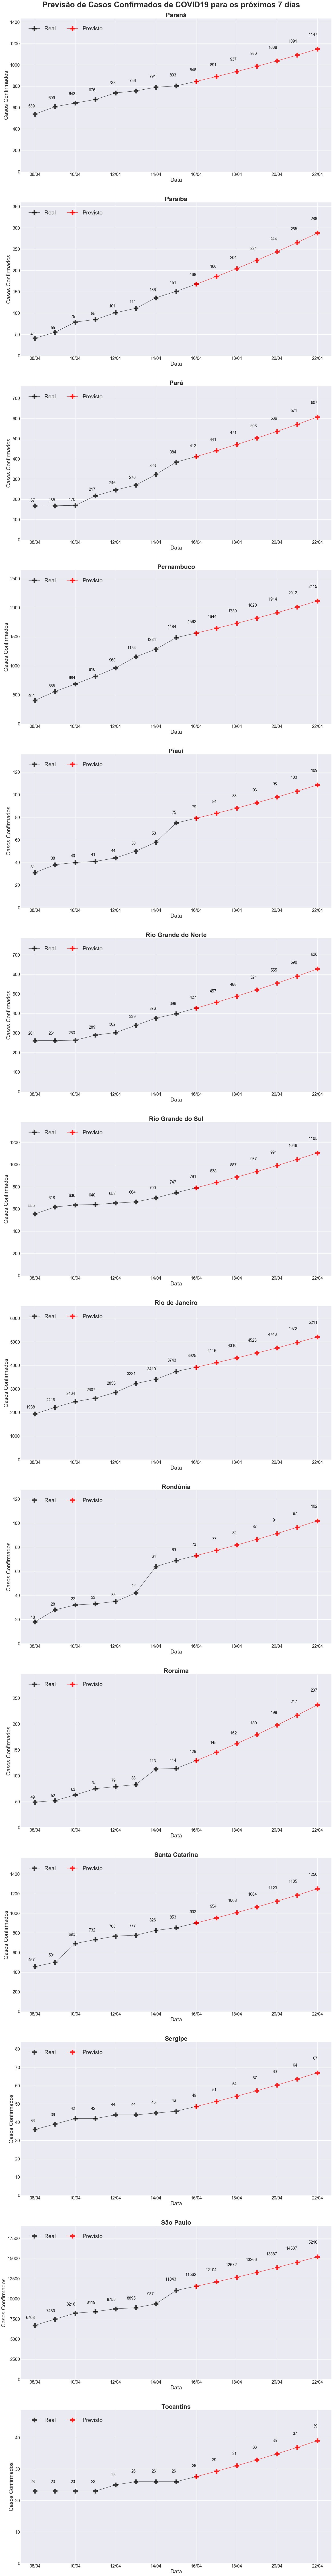

In [139]:
fig , ax = plt.subplots(ncols=1,nrows=14,figsize=(25,210))
fig.suptitle("Previsão de Casos Confirmados de COVID19 para os próximos {} dias".format(dias),fontsize=35,y=0.885,weight='bold')
sns.set_style("darkgrid")

#Selecionando os estados para previsão
estados = ['Paraná','Paraíba', 'Pará', 'Pernambuco', 'Piauí','Rio Grande do Norte','Rio Grande do Sul',
           'Rio de Janeiro','Rondônia','Roraima','Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins']

for est in range(0,len(estados)):
    
    #Definindo o período para mostrar no gráfico
    ult_dias = 15
    fore = allforecast[allforecast['date']>allforecast[allforecast['Day']==allforecast.Day.max()-ult_dias].date.tail(1).values[0]].reset_index(drop=True)
    
    #Selecionando cada estado para forecast
    fore = fore[fore['state']==estados[est]].reset_index(drop=True)

    #Configurando o formato da data que desejo mostrar no gráfico
    dateview = [fore.date[x].strftime("%d/%m") for x in range(0,len(fore.date))]

    sns.lineplot(x=fore.date[:-dias+1],y=fore.cases[:-dias+1],color="black",marker='P',markersize=22,label="Real",alpha=0.75,ax=ax[est])
    sns.lineplot(x=fore.date[-dias:],y=fore.cases[-dias:],color="red",marker='P',markersize=22,label="Previsto",alpha=0.85,ax=ax[est])
    ax[est].set_title("{}".format(estados[est]),fontsize=28,weight='bold')
    ax[est].set_ylim(0,fore.cases.max()*1.25)
    ax[est].set_xlabel('Data',fontsize=25)
    ax[est].set_ylabel('Casos Confirmados',fontsize=25)
    ax[est].tick_params(axis='x',labelsize=20)
    ax[est].tick_params(axis='y',labelsize=20)
    ax[est].set_xticks(fore.date[::-2])
    ax[est].set_xticklabels(dateview[::-2])
    ax[est].legend(ncol=2,fontsize=25,borderpad=0.925,loc='upper left')

    #Exibindo valores de todos os dias
    for i in range(1,ult_dias+1):
        ax[est].annotate('{:.0f}'.format(fore.cases.tail(i).values[0]),xy=(fore.date.tail(i).values[0],fore.cases.tail(i).values[0]*1.10),
                    size=18,ha='right',va='bottom',color='black',alpha=.9)

plt.show()

# 

## Linear Regression

In [140]:
#Carregando e visualizando parâmetros do modelo
model = joblib.load("model_LR.pkl")
print(model,"\n\n",model.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False) 

 [ 1.07768881e+00 -4.80411182e+00 -3.98027850e+00 -3.48001697e+00
 -4.43253636e+00  1.79887897e-03 -6.97680594e+00 -8.68110095e+00
 -7.79014968e+00 -6.70016686e+00 -4.77273385e+00]


In [141]:
#Variáveis do Modelo
#['Cases_Last_Day', 'UF_CAT_TO', 'UF_CAT_SE', 'UF_CAT_AL', 'UF_CAT_GO', 'DIST_CE', 'UF_CAT_RO', 'UF_CAT_AC', 'UF_CAT_RS', 'UF_CAT_MS', 'UF_CAT_PR']

In [142]:
tot_cases=[]
allforecast=date_state.copy()

ufs=['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT','MS', 'MG', 'PR', 'PB', 'PA', 'PE', 'PI', 'RN', 'RS', 'RO','RR', 'SC', 'SE', 'TO', 'RJ', 'SP']
#ufs=['SP']

for i in range(0,len(ufs)):
    

    #Selecionando as features finais do modelo e as variáveis dia/data para definir a previsão e estado/uf para especificidade
    forecast=date_state[['Day','date','state','UF','cases','Cases_Last_Day', 'UF_CAT_AL', 'UF_CAT_TO', 'UF_CAT_SE',
                         'DIST_CE', 'UF_CAT_RO', 'UF_CAT_AC', 'UF_CAT_RS', 'UF_CAT_MS', 'UF_CAT_PR', 'UF_CAT_GO']]
    
    #Selecionando dados a partir do primeiro caso confirmado no Brasil
    forecast = forecast[forecast['date']>='2020-02-26'].reset_index(drop=True,level=0)

    #Definindo a UF do estado para previsão
    uf=ufs[i]
    forecast=forecast[forecast['UF']==uf]

    #Definindo dias para previsão
    dias=7

    for i in range(0,dias):

        #Preparando os dados para a previsão
        #'Cases_Last_Day'
        cld=forecast.groupby('state').cases.last()[0]
        #'DIST_CE'
        distce=forecast.groupby('state').DIST_CE.last()[0]
        #'UF_CAT_SE'
        ufse = 1 if uf=='SE' else 0   
        #'UF_CAT_RS'
        ufrs = 1 if uf=='RS' else 0
        #'UF_CAT_AL'
        ufal = 1 if uf=='AL' else 0      
        #'UF_CAT_TO'
        ufto = 1 if uf=='TO' else 0
        #'UF_CAT_GO'
        ufgo = 1 if uf=='GO' else 0          
        #'UF_CAT_AC'
        ufac = 1 if uf=='AC' else 0 
        #'UF_CAT_RO'
        ufro = 1 if uf=='RO' else 0         
        #'UF_CAT_PR'
        ufpr = 1 if uf=='PR' else 0       
        #'UF_CAT_MS'
        ufms = 1 if uf=='MS' else 0  
        
        #Previsão para o próximo dia e ajuste no dataset com as informações
        dia=forecast.Day.max()+1
        estado=forecast.state.tail(1).values[0]
        prev=model.predict([[cld,ufto,ufse,ufal,ufgo,distce,ufro,ufac,ufrs,ufms,ufpr]])[0]     
        
        att=pd.DataFrame({'Day':dia,'date':pd.date_range(date_state.date.max(), periods=i+2).tolist()[-1],'state':estado,'UF':uf,
                          'cases':prev,'Cases_Last_Day':forecast.cases.tail(1).values[0],
                          'DIST_CE':np.nan,
                          'UF_CAT_TO':np.nan,'UF_CAT_SE':np.nan,'UF_CAT_RO':np.nan,'UF_CAT_RS':np.nan,'UF_CAT_GO':np.nan,
                          'UF_CAT_PR':np.nan,'UF_CAT_AC':np.nan,'UF_CAT_AL':np.nan,'UF_CAT_MS':np.nan},index=[0])
        
        forecast=pd.concat([forecast,att]).reset_index(level=0,drop=True)

        forecast['DIST_CE'] = forecast.groupby('state').DIST_CE.last()[0]      
        forecast['UF_CAT_SE'] = 1 if uf=='SE' else 0
        forecast['UF_CAT_MS'] = 1 if uf=='MS' else 0 
        forecast['UF_CAT_AL'] = 1 if uf=='AL' else 0
        forecast['UF_CAT_PR'] = 1 if uf=='PR' else 0
        forecast['UF_CAT_MS'] = 1 if uf=='MS' else 0        
        forecast['UF_CAT_RO'] = 1 if uf=='RO' else 0        
        forecast['UF_CAT_TO'] = 1 if uf=='TO' else 0
        forecast['UF_CAT_GO'] = 1 if uf=='GO' else 0
        forecast['UF_CAT_AC'] = 1 if uf=='AC' else 0
        forecast = forecast.fillna(0)

    tot_cases.append(forecast.cases.tail(1).values[0])
    new=forecast[forecast['Day']>date_state.Day.max()]
    allforecast=pd.concat([allforecast,new]).reset_index(level=0,drop=True)

print("\nTotal de casos confirmados no Brasil para daqui {} dias : {}\n".format(dias,sum(tot_cases)))
forecast.tail(dias+3)


Total de casos confirmados no Brasil para daqui 7 dias : 48694.22099237713



Day       date      state  UF         cases  Cases_Last_Day  UF_CAT_AL  \
47   75 2020-04-13  São Paulo  SP   8895.000000     8755.000000          0   
48   76 2020-04-14  São Paulo  SP   9371.000000     8895.000000          0   
49   77 2020-04-15  São Paulo  SP  11043.000000     9371.000000          0   
50   78 2020-04-16  São Paulo  SP  11907.555779    11043.000000          0   
51   79 2020-04-17  São Paulo  SP  12839.277864    11907.555779          0   
52   80 2020-04-18  São Paulo  SP  13843.384327    12839.277864          0   
53   81 2020-04-19  São Paulo  SP  14925.498622    13843.384327          0   
54   82 2020-04-20  São Paulo  SP  16091.681086    14925.498622          0   
55   83 2020-04-21  São Paulo  SP  17348.462874    16091.681086          0   
56   84 2020-04-22  São Paulo  SP  18702.882540    17348.462874          0   

    UF_CAT_TO  UF_CAT_SE      DIST_CE  UF_CAT_RO  UF_CAT_AC  UF_CAT_RS  \
47          0          0  2148.752432          0          0        0.0   
48          0          0  2148.752432          0          0        0.0   
49          0          0  2148.752432          0          0        0.0   
50          0          0  2148.752432          0          0        0.0   
51          0          0  2148.752432          0          0        0.0   
52          0          0  2148.752432          0          0        0.0   
53          0          0  2148.752432          0          0        0.0   
54          0          0  2148.752432          0          0        0.0   
55          0          0  2148.752432          0          0        0.0   
56          0          0  2148.752432          0          0        0.0   

    UF_CAT_MS  UF_CAT_PR  UF_CAT_GO  
47          0          0          0  
48          0          0          0  
49          0          0          0  
50          0          0          0  
51          0          0          0  
52          0          0          0  
53          0          0          0  
54          0          0          0  
55          0          0          0  
56          0          0          0

## Previsão do número de casos no Brasil para os próximos 7 dias

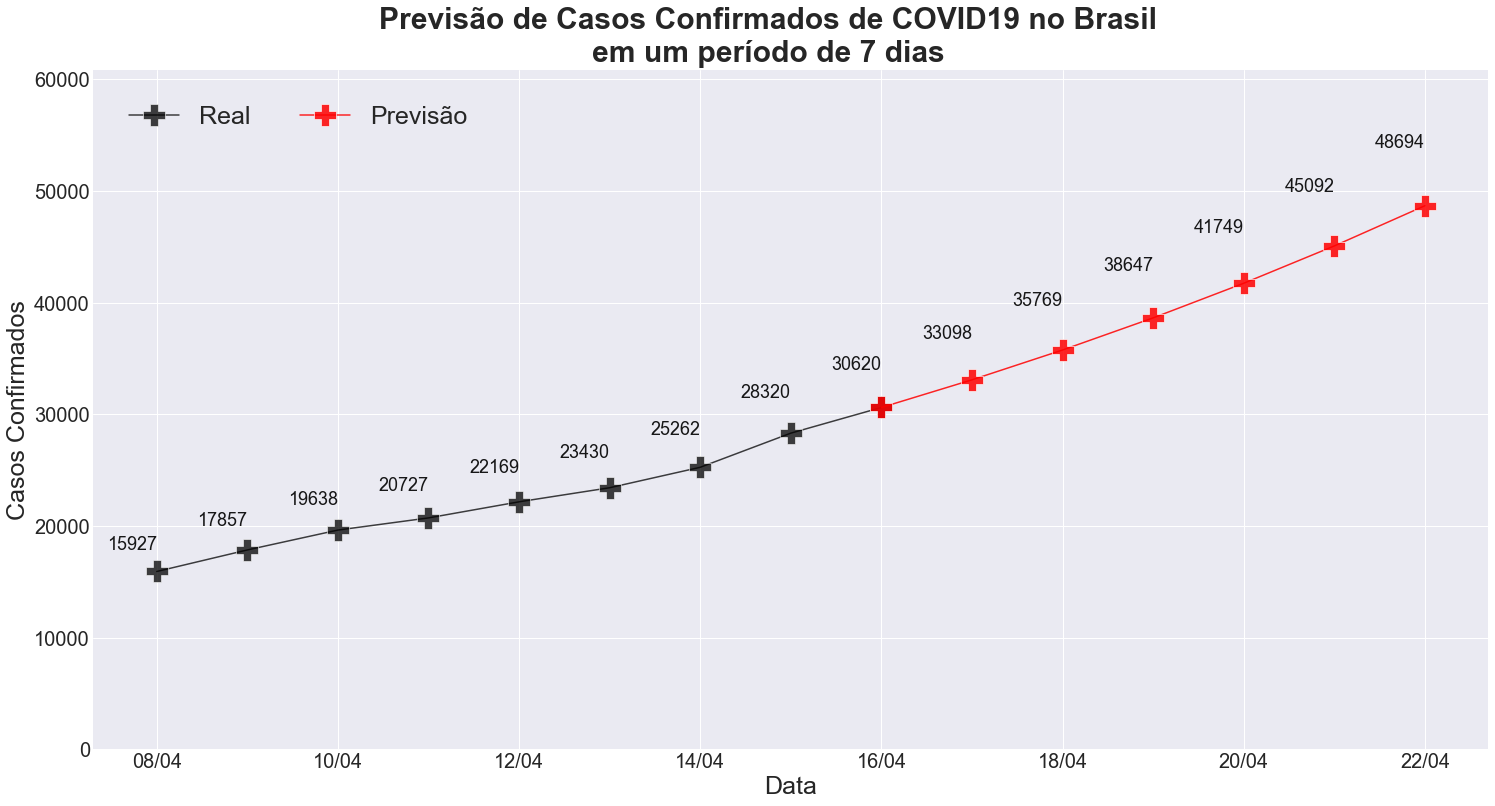

In [143]:
#Soma de casos confirmado no Brasil
br_forecast = allforecast.groupby(['date'])[['cases']].sum().reset_index()

#Definindo o período para mostrar no gráfico
ult_dias = 15
br_forecast = br_forecast[br_forecast['date']>allforecast[allforecast['Day']==allforecast.Day.max()-ult_dias].date.tail(1).values[0]].reset_index(drop=True)

#Configurando o formato da data que desejo mostrar no gráfico
dateview = [br_forecast.date[x].strftime("%d/%m") for x in range(0,len(br_forecast.date))]

fig , ax = plt.subplots(figsize=(25,12.5))
fig.suptitle("Previsão de Casos Confirmados de COVID19 no Brasil\nem um período de {} dias".format(dias),fontsize=30,y=0.95,weight='bold')

sns.set_style("darkgrid")
sns.lineplot(x=br_forecast.date[:-dias+1],y=br_forecast.cases[:-dias+1],color="black",marker='P',markersize=22,label="Real",alpha=0.75)
sns.lineplot(x=br_forecast.date[-dias:],y=br_forecast.cases[-dias:],color="red",marker='P',markersize=22,label="Previsão",alpha=0.85)
ax.set_ylim(0,br_forecast.cases.max()*1.25)
ax.set_xlabel('Data',fontsize=25)
ax.set_ylabel('Casos Confirmados',fontsize=25)
ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)
ax.set_xticks(br_forecast.date[::-2])
ax.set_xticklabels(dateview[::-2])
ax.legend(ncol=2,fontsize=25,borderpad=0.925,loc='upper left')
        
#Exibindo valores de todos os dias
for i in range(1,ult_dias+1):
    ax.annotate('{:.0f}'.format(br_forecast.cases.tail(i).values[0]),xy=(br_forecast.date.tail(i).values[0],br_forecast.cases.tail(i).values[0]*1.10),
                size=18,ha='right',va='bottom',color='black',alpha=.9)

plt.show()

# 

## XGBoost Regressor

In [144]:
model = joblib.load("model_XGB.pkl")
model

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=75, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

Feature: 0, Score: 0.89289
Feature: 1, Score: 0.10570
Feature: 2, Score: 0.00036
Feature: 3, Score: 0.00057
Feature: 4, Score: 0.00024
Feature: 5, Score: 0.00019
Feature: 6, Score: 0.00004


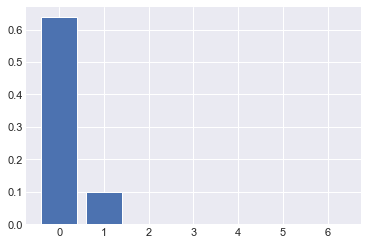

In [147]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], np.log1p(importance))
plt.show()

In [148]:
#Variáveis do modelo
#['Cases_Last_Day', 'Max_Diff_Cases_Last_Days_3', 'Mes', 'Max_Diff_Cases_Last_Days_7', 'UF_CAT_PE', 'UF_CAT_DF', 'UF_CAT_RO']

In [150]:
tot_cases=[]
allforecast=date_state.copy()

ufs=['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT','MS', 'PR', 'PB', 'PA', 'PE', 'PI', 'RN', 'RS', 'RO','RR', 'SC', 'SE', 'TO', 'SP', 'RJ', 'MG']
#ufs=['MG']

for i in range(0,len(ufs)):
    
    #Selecionando as features finais do modelo e as variáveis dia/data para definir a previsão e estado/uf para especificidade
    forecast=date_state[['Day','date','state','UF','cases','Cases_Last_Day', 'Diff_Cases_Last_Day',
                         'Max_Diff_Cases_Last_Days_3', 'Max_Diff_Cases_Last_Days_7', 'Mes', 'UF_CAT_PE', 'UF_CAT_DF', 'UF_CAT_RO']]
    
    #Selecionando dados a partir do primeiro caso confirmado no Brasil
    forecast = forecast[forecast['date']>='2020-02-26'].reset_index(drop=True,level=0)

    #Definindo a UF do estado para previsão
    uf=ufs[i]
    forecast=forecast[forecast['UF']==uf]

    #Definindo dias para previsão
    dias=7

    for i in range(0,dias):

        #Preparando os dados para a previsão
        #'Cases_Last_Day'
        cld=forecast.groupby('state').cases.last()[0]
        #'Mês'
        mes=forecast.groupby('state').date.last()[0].month            
        #'Diff_Cases_Last_Day'
        difcld=forecast.cases.diff().tail(1).values[0]       
        #'Max_Diff_Cases_Last_Days_7'
        mxdifcl7d=forecast.Diff_Cases_Last_Day.rolling(7).max().tail(1).values[0]
        #'Max_Diff_Cases_Last_Days_3'
        mxdifcl3d=forecast.Diff_Cases_Last_Day.rolling(3).max().tail(1).values[0]
        #'UF_CAT_RO'
        ufro = 1 if uf=='RO' else 0         
        #'UF_CAT_DF'
        ufdf = 1 if uf=='DF' else 0       
        #'UF_CAT_PE'
        ufpe = 1 if uf=='PE' else 0 
        
        #Previsão para o próximo dia e ajuste no dataset com as informações
        dia=forecast.Day.max()+1
        estado=forecast.state.tail(1).values[0]
        prev=model.predict(pd.Series([cld,mxdifcl3d,mes,mxdifcl7d,ufpe,ufdf,ufro]))[0] 
        
        att=pd.DataFrame({'Day':dia,'date':pd.date_range(date_state.date.max(), periods=i+2).tolist()[-1],'state':estado,'UF':uf,
                          'cases':prev,'Cases_Last_Day':forecast.cases.tail(1).values[0],
                          'Mes':forecast.groupby('state').date.last()[0].month,
                          'Diff_Cases_Last_Day':np.nan,'Max_Diff_Cases_Last_Days_3':np.nan, 'Max_Diff_Cases_Last_Days_7':np.nan,
                         'UF_CAT_PE':np.nan, 'UF_CAT_DF':np.nan, 'UF_CAT_RO':np.nan},index=[0])

        forecast=pd.concat([forecast,att]).reset_index(level=0,drop=True)

        forecast['Diff_Cases_Last_Day'] = forecast.groupby('state').Cases_Last_Day.diff()
        forecast['Max_Diff_Cases_Last_Days_7'] = forecast.Diff_Cases_Last_Day.rolling(7).max()
        forecast['Max_Diff_Cases_Last_Days_3'] = forecast.Diff_Cases_Last_Day.rolling(3).max()
        forecast['UF_CAT_DF'] = 1 if uf=='DF' else 0        
        forecast['UF_CAT_RO'] = 1 if uf=='RO' else 0        
        forecast['UF_CAT_PE'] = 1 if uf=='PE' else 0
        forecast = forecast.fillna(0)

    tot_cases.append(forecast.cases.tail(1).values[0])
    new=forecast[forecast['Day']>date_state.Day.max()]
    allforecast=pd.concat([allforecast,new]).reset_index(level=0,drop=True)

print("\nTotal de casos confirmados no Brasil para daqui {} dias : {}\n".format(dias,sum(tot_cases)))
forecast.tail(dias+3)


Total de casos confirmados no Brasil para daqui 7 dias : 44488.67185211182



Day       date         state  UF        cases  Cases_Last_Day  \
47   75 2020-04-13  Minas Gerais  MG   815.000000      806.000000   
48   76 2020-04-14  Minas Gerais  MG   884.000000      815.000000   
49   77 2020-04-15  Minas Gerais  MG   903.000000      884.000000   
50   78 2020-04-16  Minas Gerais  MG   957.900024      903.000000   
51   79 2020-04-17  Minas Gerais  MG  1112.577637      957.900024   
52   80 2020-04-18  Minas Gerais  MG  1204.629028     1112.577637   
53   81 2020-04-19  Minas Gerais  MG  1273.974487     1204.629028   
54   82 2020-04-20  Minas Gerais  MG  1480.360596     1273.974487   
55   83 2020-04-21  Minas Gerais  MG  1648.745972     1480.360596   
56   84 2020-04-22  Minas Gerais  MG  2173.746582     1648.745972   

    Diff_Cases_Last_Day  Max_Diff_Cases_Last_Days_3  \
47            56.000000                   56.000000   
48             9.000000                   56.000000   
49            69.000000                   69.000000   
50            19.000000                   69.000000   
51            54.900024                   69.000000   
52           154.677612                  154.677612   
53            92.051392                  154.677612   
54            69.345459                  154.677612   
55           206.386108                  206.386108   
56           168.385376                  206.386108   

    Max_Diff_Cases_Last_Days_7  Mes  UF_CAT_PE  UF_CAT_DF  UF_CAT_RO  
47                   56.000000    4          0          0          0  
48                   56.000000    4          0          0          0  
49                   69.000000    4          0          0          0  
50                   69.000000    4          0          0          0  
51                   69.000000    4          0          0          0  
52                  154.677612    4          0          0          0  
53                  154.677612    4          0          0          0  
54                  154.677612    4          0          0          0  
55                  206.386108    4          0          0          0  
56                  206.386108    4          0          0          0

## Previsão do número de casos no Brasil para os próximos 7 dias

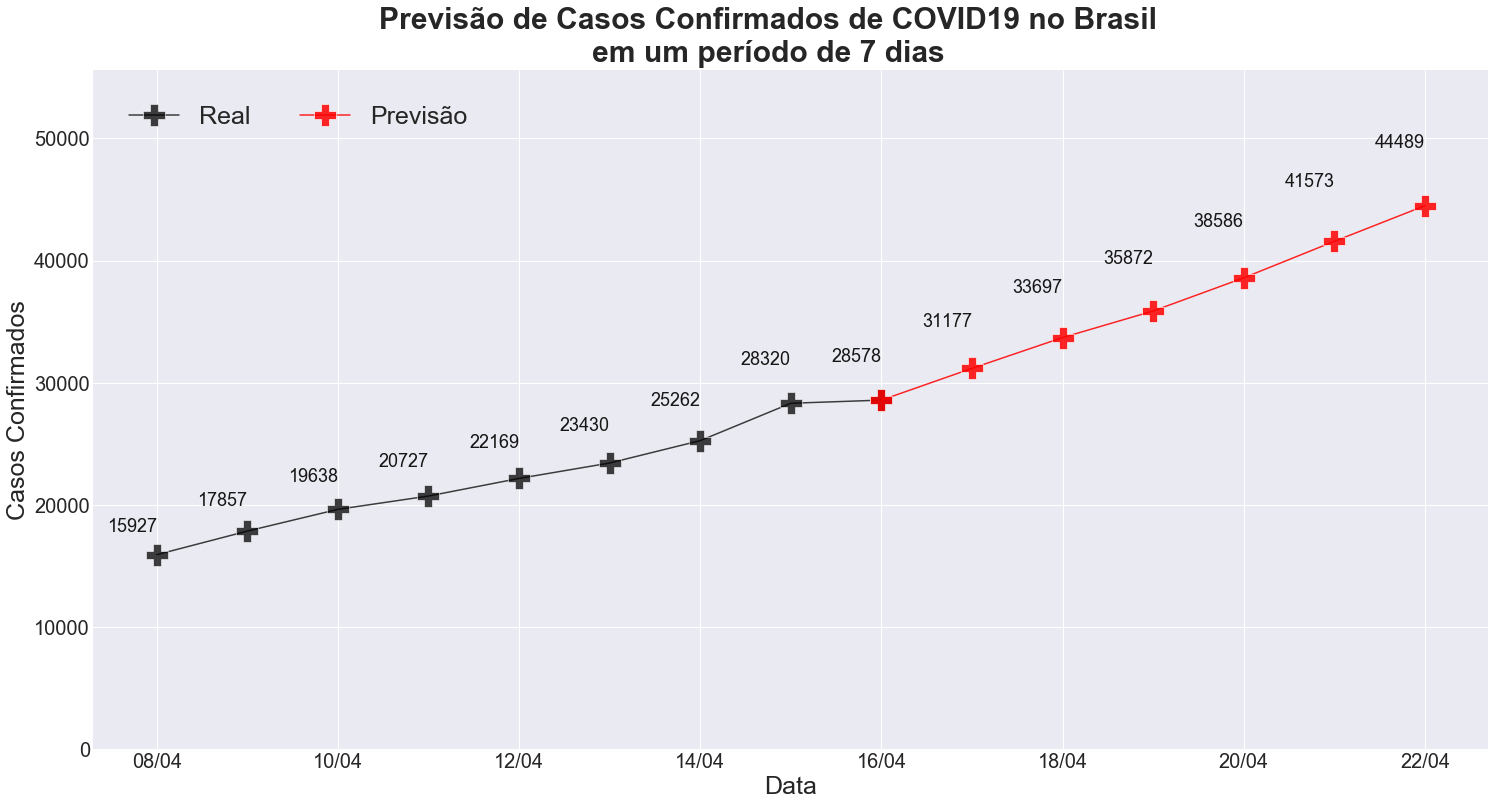

In [151]:
#Soma de casos confirmado no Brasil
br_forecast = allforecast.groupby(['date'])[['cases']].sum().reset_index()

#Definindo o período para mostrar no gráfico
ult_dias = 15
br_forecast = br_forecast[br_forecast['date']>allforecast[allforecast['Day']==allforecast.Day.max()-ult_dias].date.tail(1).values[0]].reset_index(drop=True)

#Configurando o formato da data que desejo mostrar no gráfico
dateview = [br_forecast.date[x].strftime("%d/%m") for x in range(0,len(br_forecast.date))]

fig , ax = plt.subplots(figsize=(25,12.5))
fig.suptitle("Previsão de Casos Confirmados de COVID19 no Brasil\nem um período de {} dias".format(dias),fontsize=30,y=0.95,weight='bold')

sns.set_style("darkgrid")
sns.lineplot(x=br_forecast.date[:-dias+1],y=br_forecast.cases[:-dias+1],color="black",marker='P',markersize=22,label="Real",alpha=0.75)
sns.lineplot(x=br_forecast.date[-dias:],y=br_forecast.cases[-dias:],color="red",marker='P',markersize=22,label="Previsão",alpha=0.85)
ax.set_ylim(0,br_forecast.cases.max()*1.25)
ax.set_xlabel('Data',fontsize=25)
ax.set_ylabel('Casos Confirmados',fontsize=25)
ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)
ax.set_xticks(br_forecast.date[::-2])
ax.set_xticklabels(dateview[::-2])
ax.legend(ncol=2,fontsize=25,borderpad=0.925,loc='upper left')
        
#Exibindo valores de todos os dias
for i in range(1,ult_dias+1):
    ax.annotate('{:.0f}'.format(br_forecast.cases.tail(i).values[0]),xy=(br_forecast.date.tail(i).values[0],br_forecast.cases.tail(i).values[0]*1.10),
                size=18,ha='right',va='bottom',color='black',alpha=.9)

plt.show()

# 

# Forecast para as Cidades Brasileiras
## Realizando a previsão para alguns municípios com base no modelo principal produzido (Ridge Regressor)
### É claro que realizar essa previsão dado as condições não é uma forma correta, uma vez que o modelo foi criado a partir dos dados dos estados e não das cidades. Porém, com finalidade de analisar a possível a eficiência do modelo nessa situação, ilustrar um pouco do que poderia ser feito para prever a progressão do COVID19 nas cidades, além de ter uma forte curiosidade de quais resultados o modelo vai obter obter com essa abordagem.

In [152]:
#Carregando e configurando dataset dos municípios
date_city = pd.read_csv("date_city_covidbr.csv",sep=';')
date_city.date = pd.to_datetime(date_city.date)
date_city.head(1)

date country  UF       city_uf       id  newDeaths  deaths  new_cases  \
0 2020-02-25  Brazil  SP  São Paulo/SP  3550308          0       0          1   

   cases       city  Population_2019  area_city  latitude  longitude  
0      1  São Paulo       12252023.0    1521.11  -23.5329   -46.6395

In [153]:
#Removendo colunas desnecesárias
date_city.drop(columns = ['country','city_uf','id'],inplace=True)
date_city.head(1)

date  UF  newDeaths  deaths  new_cases  cases       city  \
0 2020-02-25  SP          0       0          1      1  São Paulo   

   Population_2019  area_city  latitude  longitude  
0       12252023.0    1521.11  -23.5329   -46.6395

In [154]:
#Variáveis do modelo (Ridge Regressor):
#['Cases_Last_Day', 'UF_CAT_TO', 'UF_CAT_AL', 'UF_CAT_SE', 'UF_CAT_RO', 'UF_CAT_MS', 'UF_CAT_AC', 'REG_CAT_Sul','UF_CAT_PI', 'UF_CAT_GO']

#Criando essas variáveis no dataset
#'Cases_Last_Day'
date_city['Cases_Last_Day'] = date_city.groupby('city').cases.shift()
date_city[date_city['city']=='São Paulo'].head()

date  UF  newDeaths  deaths  new_cases  cases       city  \
0 2020-02-25  SP          0       0          1      1  São Paulo   
1 2020-02-26  SP          0       0          0      1  São Paulo   
2 2020-02-27  SP          0       0          0      1  São Paulo   
3 2020-02-28  SP          0       0          1      2  São Paulo   
4 2020-02-29  SP          0       0          0      2  São Paulo   

   Population_2019  area_city  latitude  longitude  Cases_Last_Day  
0       12252023.0    1521.11  -23.5329   -46.6395             NaN  
1       12252023.0    1521.11  -23.5329   -46.6395             1.0  
2       12252023.0    1521.11  -23.5329   -46.6395             1.0  
3       12252023.0    1521.11  -23.5329   -46.6395             1.0  
4       12252023.0    1521.11  -23.5329   -46.6395             2.0

In [155]:
#Adicionando coluna de região com Web Scraping
#Retirando dados da web
res=requests.get('https://www.estadosecapitaisdobrasil.com/')
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0]

#Criando dataframe
uf_reg = pd.read_html(str(table))
uf_reg=pd.DataFrame(uf_reg)
uf_reg=uf_reg[0][0]
uf_reg.head(2)

#Renomeando e definindo com índice a coluna chave do dataframe
uf_reg=uf_reg.rename(columns={'Estado':'state','Sigla':'UF'})
uf_reg=uf_reg.set_index(uf_reg.UF)
uf_reg.head(1)

#Juntando os datasets
date_city=date_city.merge(uf_reg[['Região']],how="left",on='UF')
date_city.head(3)

date  UF  newDeaths  deaths  new_cases  cases       city  \
0 2020-02-25  SP          0       0          1      1  São Paulo   
1 2020-02-26  SP          0       0          0      1  São Paulo   
2 2020-02-27  SP          0       0          0      1  São Paulo   

   Population_2019  area_city  latitude  longitude  Cases_Last_Day   Região  
0       12252023.0    1521.11  -23.5329   -46.6395             NaN  Sudeste  
1       12252023.0    1521.11  -23.5329   -46.6395             1.0  Sudeste  
2       12252023.0    1521.11  -23.5329   -46.6395             1.0  Sudeste

In [156]:
#Criando as variáveis dummies UF_CAT e REG_CAT

#Criando colunas para transformação
date_city['UF_CAT']=date_city.UF
date_city['REG_CAT']=date_city.Região

#Transformando as variáveis
ohe_uf = OneHotEncoder(cols=['UF_CAT','REG_CAT'],use_cat_names=True,drop_invariant=True)
date_city = ohe_uf.fit_transform(date_city)
date_city

date  UF  newDeaths  deaths  new_cases  cases  \
0     2020-02-25  SP          0       0          1      1   
1     2020-02-26  SP          0       0          0      1   
2     2020-02-27  SP          0       0          0      1   
3     2020-02-28  SP          0       0          1      2   
4     2020-02-29  SP          0       0          0      2   
...          ...  ..        ...     ...        ...    ...   
15580 2020-04-15  MA          0       0          0      1   
15581 2020-04-15  GO          0       0          0      2   
15582 2020-04-15  SC          0       0          0      1   
15583 2020-04-15  SP          0       1          0      1   
15584 2020-04-15  SP          0       0          0      1   

                        city  Population_2019  area_city  latitude  ...  \
0                  São Paulo       12252023.0   1521.110 -23.53290  ...   
1                  São Paulo       12252023.0   1521.110 -23.53290  ...   
2                  São Paulo       12252023.0   1521.110 -23.53290  ...   
3                  São Paulo       12252023.0   1521.110 -23.53290  ...   
4                  São Paulo       12252023.0   1521.110 -23.53290  ...   
...                      ...              ...        ...       ...  ...   
15580                Zé Doca          51714.0   2140.109  -3.27014  ...   
15581  Águas Lindas de Goiás         212440.0    192.392 -15.76170  ...   
15582           Águas Mornas           6469.0    326.660 -27.69630  ...   
15583       Águas de Lindóia          18705.0     60.126 -22.47330  ...   
15584     Águas de São Pedro           3451.0      3.612 -22.59770  ...   

       UF_CAT_MT  UF_CAT_RO UF_CAT_AP  UF_CAT_MA  UF_CAT_RR  REG_CAT_Sudeste  \
0              0          0         0          0          0                1   
1              0          0         0          0          0                1   
2              0          0         0          0          0                1   
3              0          0         0          0          0                1   
4              0          0         0          0          0                1   
...          ...        ...       ...        ...        ...              ...   
15580          0          0         0          1          0                0   
15581          0          0         0          0          0                0   
15582          0          0         0          0          0                0   
15583          0          0         0          0          0                1   
15584          0          0         0          0          0                1   

       REG_CAT_Nordeste  REG_CAT_Centro-Oeste  REG_CAT_Sul  REG_CAT_Norte  
0                     0                     0            0              0  
1                     0                     0            0              0  
2                     0                     0            0              0  
3                     0                     0            0              0  
4                     0                     0            0              0  
...                 ...                   ...          ...            ...  
15580                 1                     0            0              0  
15581                 0                     1            0              0  
15582                 0                     0            1              0  
15583                 0                     0            0              0  
15584                 0                     0            0              0  

[15585 rows x 45 columns]

In [157]:
#Criando contagem de dias após o surto
day = pd.DataFrame(np.arange(1,date_city.date.unique().shape[0]+1),index = date_city.date.value_counts().index.sort_values(),columns=['Day'])
day = day.reset_index()
day = day.rename(columns={'index':'date'})
day = day.set_index(day.date)
day.tail()

#Juntando ao dataset base
date_city = date_city.merge(day[['Day']],how='left',on='date')
date_city

date  UF  newDeaths  deaths  new_cases  cases  \
0     2020-02-25  SP          0       0          1      1   
1     2020-02-26  SP          0       0          0      1   
2     2020-02-27  SP          0       0          0      1   
3     2020-02-28  SP          0       0          1      2   
4     2020-02-29  SP          0       0          0      2   
...          ...  ..        ...     ...        ...    ...   
15580 2020-04-15  MA          0       0          0      1   
15581 2020-04-15  GO          0       0          0      2   
15582 2020-04-15  SC          0       0          0      1   
15583 2020-04-15  SP          0       1          0      1   
15584 2020-04-15  SP          0       0          0      1   

                        city  Population_2019  area_city  latitude  ...  \
0                  São Paulo       12252023.0   1521.110 -23.53290  ...   
1                  São Paulo       12252023.0   1521.110 -23.53290  ...   
2                  São Paulo       12252023.0   1521.110 -23.53290  ...   
3                  São Paulo       12252023.0   1521.110 -23.53290  ...   
4                  São Paulo       12252023.0   1521.110 -23.53290  ...   
...                      ...              ...        ...       ...  ...   
15580                Zé Doca          51714.0   2140.109  -3.27014  ...   
15581  Águas Lindas de Goiás         212440.0    192.392 -15.76170  ...   
15582           Águas Mornas           6469.0    326.660 -27.69630  ...   
15583       Águas de Lindóia          18705.0     60.126 -22.47330  ...   
15584     Águas de São Pedro           3451.0      3.612 -22.59770  ...   

       UF_CAT_RO  UF_CAT_AP UF_CAT_MA  UF_CAT_RR  REG_CAT_Sudeste  \
0              0          0         0          0                1   
1              0          0         0          0                1   
2              0          0         0          0                1   
3              0          0         0          0                1   
4              0          0         0          0                1   
...          ...        ...       ...        ...              ...   
15580          0          0         1          0                0   
15581          0          0         0          0                0   
15582          0          0         0          0                0   
15583          0          0         0          0                1   
15584          0          0         0          0                1   

       REG_CAT_Nordeste  REG_CAT_Centro-Oeste  REG_CAT_Sul  REG_CAT_Norte  Day  
0                     0                     0            0              0    1  
1                     0                     0            0              0    2  
2                     0                     0            0              0    3  
3                     0                     0            0              0    4  
4                     0                     0            0              0    5  
...                 ...                   ...          ...            ...  ...  
15580                 1                     0            0              0   51  
15581                 0                     1            0              0   51  
15582                 0                     0            1              0   51  
15583                 0                     0            0              0   51  
15584                 0                     0            0              0   51  

[15585 rows x 46 columns]

In [159]:
#Visualizando e selecionando as 20 cidades com maior número de casos confirmados
top20cities = date_city.groupby('city').last().sort_values(by='cases',ascending=False)[['cases']].head(20).reset_index().city.tolist()
date_city.groupby('city').last().sort_values(by='cases',ascending=False)[['cases']].head(20).reset_index().style.background_gradient(cmap='hot_r',vmin=100,vmax=10000)

In [160]:
#Carregando o modelo
model = joblib.load('model_RID.pkl')
model
#Variáveis do Modelo
#['Cases_Last_Day', 'UF_CAT_TO', 'UF_CAT_SE', 'UF_CAT_AL', 'UF_CAT_RO', 'UF_CAT_GO', 'UF_CAT_MS', 'UF_CAT_PI', 'UF_CAT_AC', 'UF_CAT_PR']

Ridge(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=0, solver='auto', tol=0.001)

Testes realizados para os últimos 15 dias em cada cidade:

Cidade - São Paulo
Dias após o primeiro caso confirmado : 51
Média do RMSLE - 0.0782

Cidade - Rio de Janeiro
Dias após o primeiro caso confirmado : 41
Média do RMSLE - 0.0611

Cidade - Fortaleza
Dias após o primeiro caso confirmado : 31
Média do RMSLE - 0.0795

Cidade - Manaus
Dias após o primeiro caso confirmado : 34
Média do RMSLE - 0.0994

Cidade - Recife
Dias após o primeiro caso confirmado : 35
Média do RMSLE - 0.1225

Cidade - Brasília
Dias após o primeiro caso confirmado : 40
Média do RMSLE - 0.0279

Cidade - São Luís
Dias após o primeiro caso confirmado : 27
Média do RMSLE - 0.1089

Cidade - Salvador
Dias após o primeiro caso confirmado : 34
Média do RMSLE - 0.0359

Cidade - Belo Horizonte
Dias após o primeiro caso confirmado : 31
Média do RMSLE - 0.0394

Cidade - Porto Alegre
Dias após o primeiro caso confirmado : 36
Média do RMSLE - 0.0630

Cidade - Curitiba
Dias após o primeiro caso confirmado : 35
Média do RMSLE - 

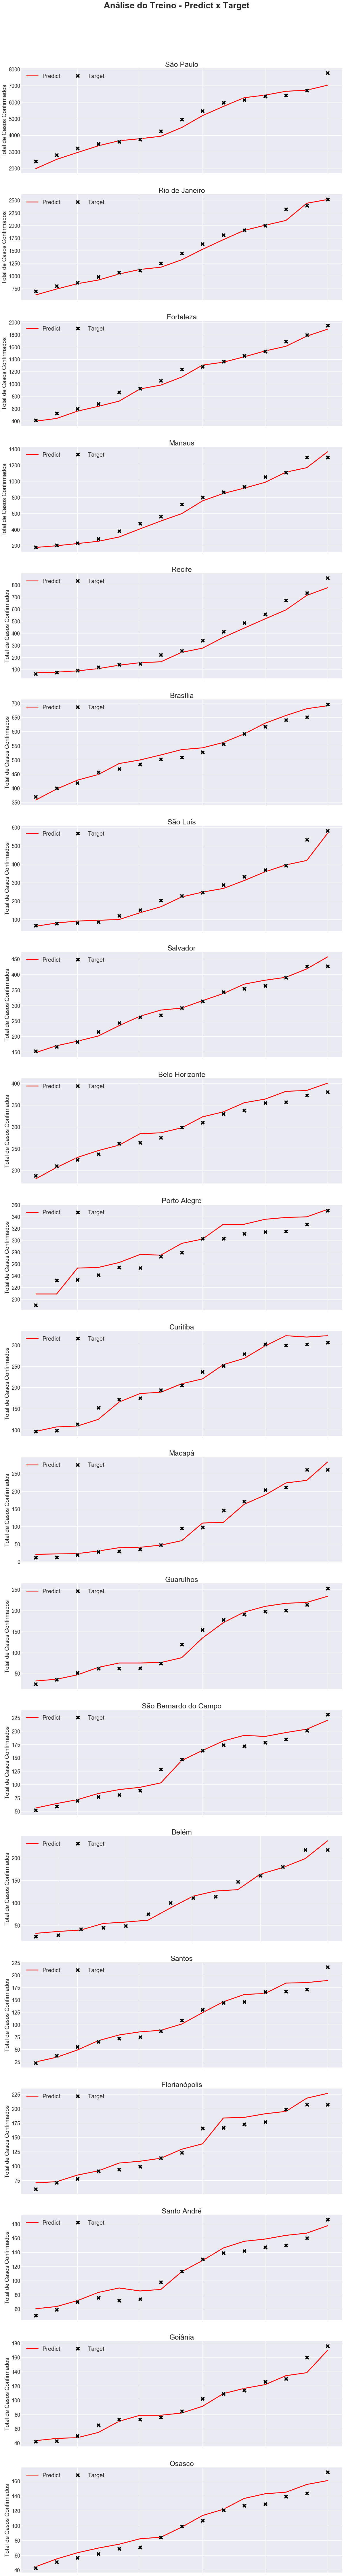

In [161]:
fig , ax = plt.subplots(20,1,figsize=(20,20*8))
fig.suptitle('Análise do Treino - Predict x Target',fontsize = 30, weight = 'bold',y = 0.90)
sns.set_style('darkgrid')
cont = 0

#Definindo os número de dias para teste do modelo
dias=15
mx=date_city.Day.max()
mn=mx+1-dias
print('Testes realizados para os últimos {} dias em cada cidade:'.format(mx+1-mn))

#Selecionando a cidade para previsão
cities = top20cities

for city in range(0,len(cities)):
    print('\nCidade - {}'.format(cities[city]))

    #Selecionando subset com as informações da cidade
    proj = date_city[date_city['city']==cities[city]].reset_index()

    #Lista com valores preditos
    prev = []
    #Lista com as targets
    targ = proj.cases.tail(dias).values.tolist()

    #Nota: É importante ressaltar que cidades que tem poucos casos,
    #menos que o número de dias que deseja se realizar o teste, o código não vai funcionar
    print('Dias após o primeiro caso confirmado : {}'.format(proj.shape[0]))
    if (proj.shape[0]<dias+1):
        print('A cidade possui o número de dias inválido para o teste de {} dias.\nPortanto, modifique o número de dias de teste para {}.'.format(dias,proj.shape[0]-1))
        break;

    for i in range(mn,mx+1):

        proj1 = proj[proj['Day']<i].reset_index()

        p = model.predict([[proj1.cases.tail(1).values[0],
                            proj1.UF_CAT_TO.tail(1).values[0],
                            proj1.UF_CAT_SE.tail(1).values[0],
                            proj1.UF_CAT_AL.tail(1).values[0],
                            proj1.UF_CAT_RO.tail(1).values[0],
                            proj1.UF_CAT_GO.tail(1).values[0],
                            proj1.UF_CAT_MS.tail(1).values[0],
                            proj1.UF_CAT_PI.tail(1).values[0], 
                            proj1.UF_CAT_AC.tail(1).values[0],
                            proj1.UF_CAT_PR.tail(1).values[0]]])[0]
        prev.append(p)

    #Nota: Tem dias que a target não muda, pois não houve atualização nas informações.
    #Assim, há pares de valores de prev e targ iguais.
    #Logo devem ser excluídos esses dias na hora de calcular a métrica de erro.
    cityfore = pd.DataFrame({'prev':prev,'targ':targ}).drop_duplicates()
    
    days=np.arange(1,cityfore.shape[0]+1)
    sns.lineplot(x=days,y=cityfore.prev,ax=ax[cont],color='red',label='Predict',linewidth=3)
    sns.lineplot(x=days,y=cityfore.targ,marker='X',ax=ax[cont],color='black',label='Target',linewidth=0,markersize=15)
    ax[cont].set_title("{}".format(cities[city]),fontsize=25)
    ax[cont].tick_params(axis='x',labelsize=0)
    ax[cont].tick_params(axis='y',labelsize=18)
    ax[cont].set_ylabel('Total de Casos Confirmados',fontsize=20)
    ax[cont].legend(ncol=2,fontsize=20)
    ax[cont].set_xticks(days[::-3])
    
    print('Média do RMSLE - {:.4f}'.format(RMSLE(cityfore.prev,cityfore.targ)))
     
    cont = cont +1

plt.show()

## Analisando os resultados, concluímos que os testes feitos nos últimos 10 dias com o modelo de Ridge foram excelentes, apresentando um RMSLE em mais da metade das cidades abaixo de 0.1 . Vale ressaltar, que esses dados não foram vistos na etapa de treinamento do modelo. Portanto, utilizar esse modelo para previsão do total de casos confirmados nos próximos dias nas cidades é uma alternativa rápida e funcional, desde que essas cidades possuam uma quantidade razoável de dias após a ocorrência do primeiro caso confirmado, além de ter um erro considerado pequeno, principalmente abaixo do RMSLE apresentado pelo Ridge Regressor na fase de treino e validação (0.2138).
## Caso você deseje reproduzir a análise para outros municípios é só carregar a base de dados 'date_city', prosseguir com os passos realizados até aqui e modificar a lista de cidades.

## Previsão para alguns municípios

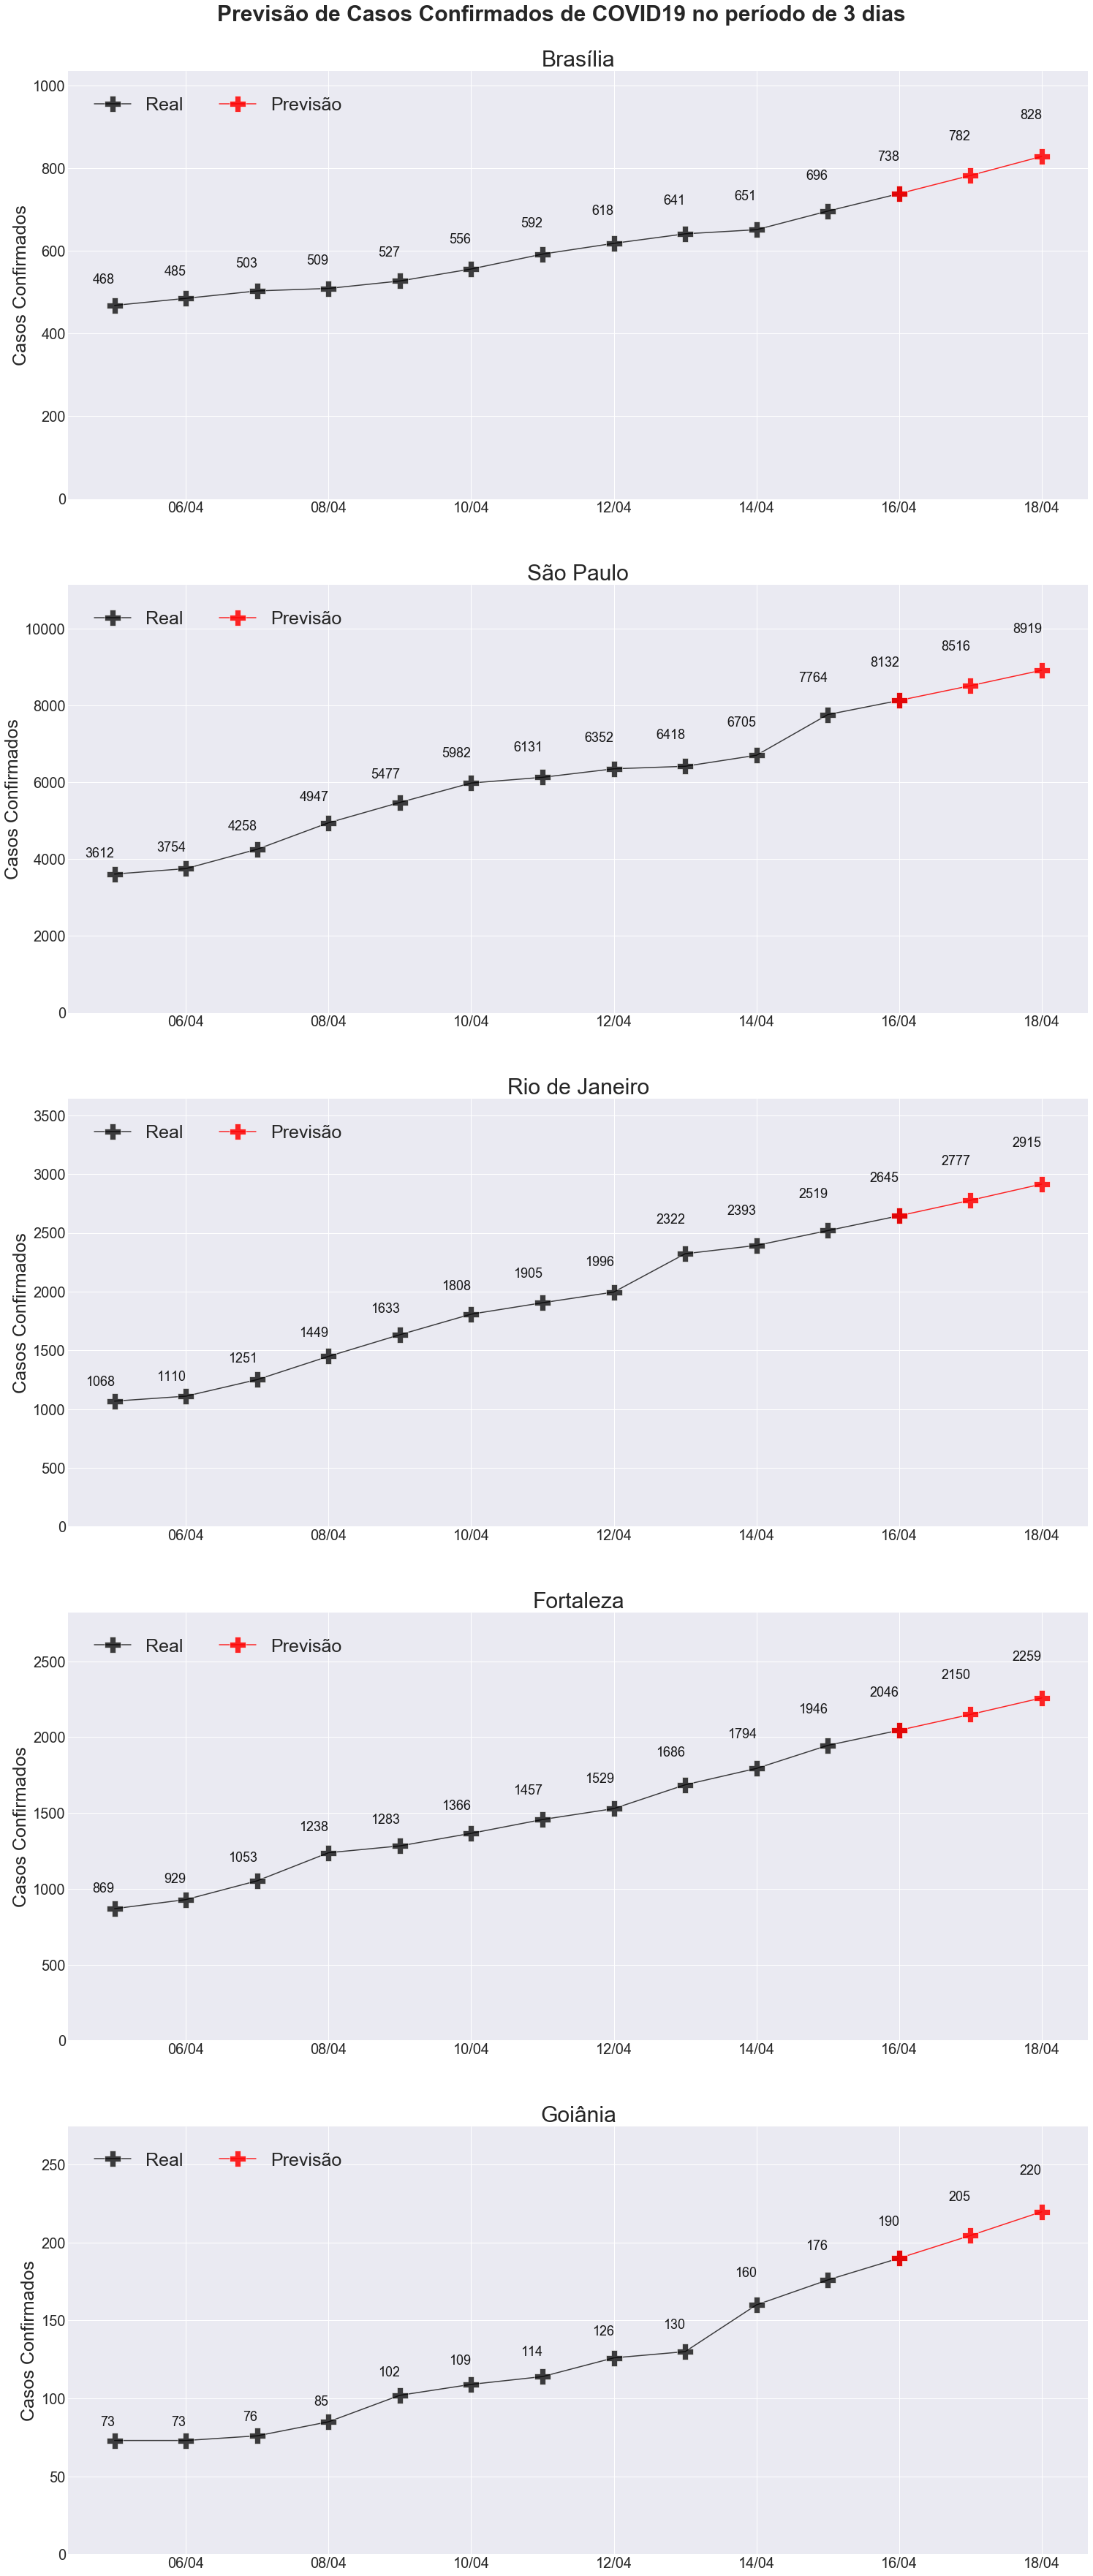

In [162]:
#Criando script básico, porém útil para projetar o número de casos das cidades definidos para os próximas x dias

#Definindo as cidades
cities = ['Brasília','São Paulo','Rio de Janeiro','Fortaleza','Goiânia']
#Definindo o número de dias para forecast
dias = 3

fig , ax = plt.subplots(ncols=1,nrows=len(cities),figsize=(25,12.5*len(cities)))
fig.suptitle("Previsão de Casos Confirmados de COVID19 no período de {} dias".format(dias),fontsize=30,y=0.90,weight='bold')
sns.set_style('darkgrid')
cont=0

for city in range(0,len(cities)):

    proj = date_city[date_city['city']==cities[city]].reset_index(drop=True)
    proj1 = proj.copy()
    
    for i in range(0,dias):

        p = model.predict([[proj1.cases.tail(1).values[0],
                               proj1.UF_CAT_TO.head(1).values[0],
                               proj1.UF_CAT_AL.head(1).values[0],
                               proj1.UF_CAT_SE.head(1).values[0],
                               proj1.UF_CAT_RO.head(1).values[0],
                               proj1.UF_CAT_MS.head(1).values[0],
                               proj1.UF_CAT_AC.head(1).values[0],
                               proj1.REG_CAT_Sul.head(1).values[0],
                               proj1.UF_CAT_PI.head(1).values[0],
                               proj1.UF_CAT_GO.head(1).values[0]]])[0]

        att = pd.DataFrame({'cases':p,'date':pd.date_range(date_city.date.max(),periods=i+2).tolist()[-1]
                            ,'Day':proj1.Day.max()+1,'city':cities[city]},index=[0])
        proj1 = pd.concat([proj1,att]).reset_index(drop=True)


    #Definindo o período para mostrar no gráfico
    ult_dias = 14
    proj1 = proj1[proj1['date']>proj1[proj1['Day']==proj1.Day.max()-ult_dias].date.tail(1).values[0]].reset_index(drop=True)

    #Configurando o formato da data que desejo mostrar no gráfico
    dateview = [proj1.date[x].strftime("%d/%m") for x in range(0,len(proj1.date))]
    dateview

    sns.set_style("darkgrid")
    sns.lineplot(x=proj1.date[:-dias+1],y=proj1.cases[:-dias+1],color="black",marker='P',markersize=22,label="Real",alpha=0.75,ax=ax[cont])
    sns.lineplot(x=proj1.date[-dias:],y=proj1.cases[-dias:],color="red",marker='P',markersize=22,label="Previsão",alpha=0.85,ax=ax[cont])
    ax[cont].set_ylim(0,proj1.cases.max()*1.25)
    ax[cont].set_title('{}'.format(cities[city]),fontsize=30)
    ax[cont].set_xlabel('',fontsize=25)
    ax[cont].set_ylabel('Casos Confirmados',fontsize=25)
    ax[cont].tick_params(axis='x',labelsize=20)
    ax[cont].tick_params(axis='y',labelsize=20)
    ax[cont].set_xticks(proj1.date[::-2])
    ax[cont].set_xticklabels(dateview[::-2])
    ax[cont].legend(ncol=2,fontsize=25,borderpad=0.925,loc='upper left')

    for i in range(1,ult_dias+1):
        ax[cont].annotate('{:.0f}'.format(proj1.cases.tail(i).values[0]),xy=(proj1.date.tail(i).values[0],proj1.cases.tail(i).values[0]*1.10),
                    size=18,ha='right',va='bottom',color='black',alpha=.9)
        
    cont = cont+1
    
plt.show()

# 

# Considerações Finais do Projeto

## Utilidade do projeto :
### - As previsões podem ajudar na tomada de decisão dos orgãos da saúde em busca de uma quantidade x de leitos e testes para o COVID19, adequação das medidas de isolamento social por região e entre outras demandas que surgirem com a pandemia. Especificando essas previsões também para os municípios essas medidas se tornariam ainda mais efetivas.
### - O script pode ser usado sem dificuldades para o usuário que desejar continuar com o projeto, atualizando os dados, fazendo modificações e melhorando os resultados.
### - O código pode ser facilmente modificado para prever também o número de mortes.
### - Muitos conceitos e visualizações podem ser utilizados como referência para outros problemas de Time Series e Machine Learning.

## 

## Upgrades que podem ser feitos com mais tempo :

## Melhorar a Precisão da Previsão
### - Adicionar novas variáveis significativas.
### - Testar outros algoritmos e modelos.
### - Mudar a target para a quantidade de novos casos em vez da soma acumulada de casos.

## Melhorar o Projeto
### - Explorar ainda mais a base de dados com informações dos municípios modelando e realizando previsões formais para eles.

## Melhorar o Produto Final
### - Entregar as visualizações das previsões dos próximos x dias em um site, onde os usuários possam interagir.